## **Análise exploratória**

### **Preparando o dataset**

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#df = pd.read_excel('/home/rafael/git/advanced_visualization/primeiros_testes/variaveis_totais.xlsx')
df = pd.read_excel('variaveis_totais.xlsx')

In [3]:
df = df[['country','country_code','indicator','year','value']]

In [4]:
# Exemplo
df.head()

,country,country_code,indicator,year,value
0,Albania,ALB,gdp_growth,1960,NaN
1,Albania,ALB,gdp_growth,1961,NaN
2,Albania,ALB,gdp_growth,1962,NaN
3,Albania,ALB,gdp_growth,1963,NaN
4,Albania,ALB,gdp_growth,1964,NaN


In [5]:
len(df)

9424

In [6]:
# Criando dataframes para cada variável
df_gdp_growth = df.query('indicator == "gdp_growth"').copy().reset_index(drop=True)
df_gdp_p_cap = df.query('indicator == "gdp_per_capita"').copy().reset_index(drop=True)
df_inflation = df.query('indicator == "inflation"').copy().reset_index(drop=True)
df_life_exp = df.query('indicator == "life_expectancy"').copy().reset_index(drop=True)

Demonstrando as informações como Média, STD, quartiles etc por Indicador que iremos analisar no projeto.

In [7]:
print('GDP GROWTH')
print(f'na values {df_gdp_growth.value.isna().sum()}.000000')
print(df_gdp_growth.value.describe())
print(f'% na values: {round(df_gdp_growth.value.isna().sum()/df_gdp_growth.value.count(),2)}')

GDP GROWTH
na values 587.000000
count    1769.000000
mean        2.933646
std         4.723836
min       -28.000000
25%         1.180000
50%         3.040000
75%         5.110000
max        88.960000
Name: value, dtype: float64
% na values: 0.33


In [8]:
print('GDP GROWTH')
print(f'na values   {df_gdp_p_cap.value.isna().sum()}.000000')
print(df_gdp_p_cap.value.describe())
print(f'% na values: {round(df_gdp_p_cap.value.isna().sum()/df_gdp_p_cap.value.count(),2)}')

GDP GROWTH
na values   647.000000
count      1709.000000
mean      18224.359626
std       20641.197726
min         200.850000
25%        3372.870000
50%       10720.330000
75%       25545.240000
max      133590.150000
Name: value, dtype: float64
% na values: 0.38


In [9]:
print('GDP GROWTH')
print(f'na values {df_inflation.value.isna().sum()}.000000')
print(df_inflation.value.describe())
print(f'% na values: {round(df_inflation.value.isna().sum()/df_inflation.value.count(),2)}')

GDP GROWTH
na values 602.000000
count    1754.000000
mean       22.206517
std       160.534567
min        -4.480000
25%         1.812500
50%         3.390000
75%         7.690000
max      4734.910000
Name: value, dtype: float64
% na values: 0.34


In [10]:
print('GDP GROWTH')
print(f'na values  {df_life_exp.value.isna().sum()}.000000')
print(df_life_exp.value.describe())
print(f'% na values: {round(df_life_exp.value.isna().sum()/df_life_exp.value.count(),2)}')

GDP GROWTH
na values  76.000000
count    2280.000000
mean       73.554873
std         4.763656
min        51.520000
25%        70.207500
50%        73.170000
75%        76.980000
max        83.900000
Name: value, dtype: float64
% na values: 0.03


### **1. Evoluções conjuntas**

In [11]:
df

,country,country_code,indicator,year,value
0,Albania,ALB,gdp_growth,1960,NaN
1,Albania,ALB,gdp_growth,1961,NaN
2,Albania,ALB,gdp_growth,1962,NaN
3,Albania,ALB,gdp_growth,1963,NaN
4,Albania,ALB,gdp_growth,1964,NaN
...,...,...,...,...,...
9419,United Kingdom,GBR,life_expectancy,2017,81.26
9420,United Kingdom,GBR,life_expectancy,2018,81.26
9421,United Kingdom,GBR,life_expectancy,2019,81.20
9422,United Kingdom,GBR,life_expectancy,2020,80.90


In [12]:
# Criando tabela dinâmica para AGRUPAR POR ANO
tab_din_all_y = pd.pivot_table(df, values='value', index='year', columns='indicator', aggfunc='mean')

In [13]:
# Exemplo
tab_din_all_y.head()

indicator,gdp_growth,gdp_per_capita,inflation,life_expectancy
year,,,,
1960,NaN,1192.493333,1.826842,67.954324
1961,6.188571,1274.900667,2.122632,68.318108
1962,4.593571,1368.221333,3.857895,68.223243
1963,5.662857,1487.438667,4.117368,68.448649
1964,6.658571,1660.348667,4.762105,69.060811


In [14]:
tab_din_all_y.isna().sum()

indicator
gdp_growth         1
gdp_per_capita     0
inflation          0
life_expectancy    1
dtype: int64

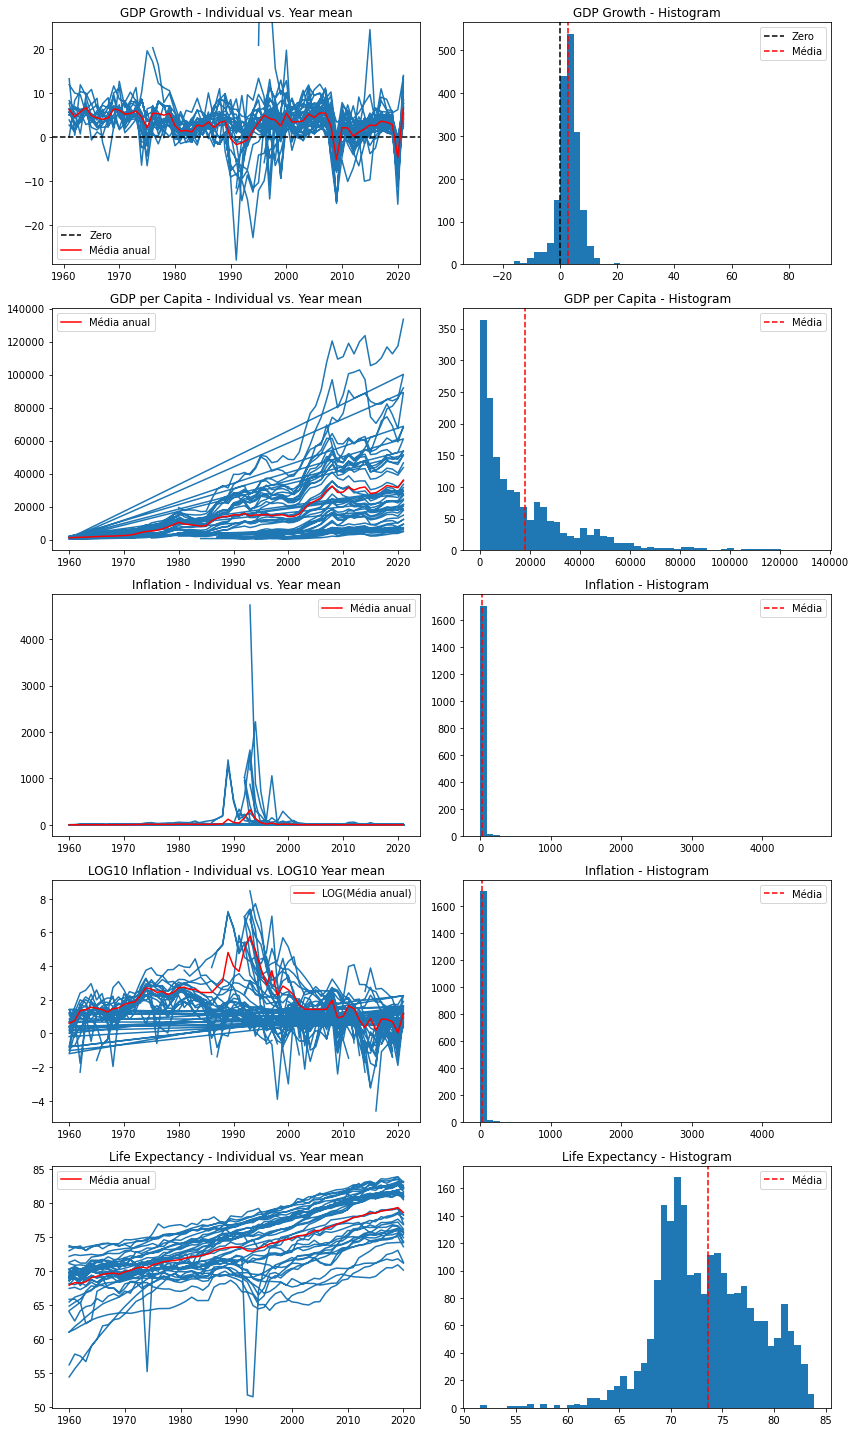

In [15]:
f,((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8),(ax9,ax10)) = plt.subplots(5,2, figsize=(12,20), tight_layout=True)

ax1.set_title('GDP Growth - Individual vs. Year mean')
ax1.plot(df_gdp_growth.year, df_gdp_growth.value)
ax1.axhline(0, color='k', linestyle='--', label='Zero')
ax1.plot(tab_din_all_y.index, tab_din_all_y.gdp_growth, 'r', label='Média anual')
ax1.set_ylim([-29,26])
ax1.legend()

ax2.set_title('GDP Growth - Histogram')
ax2.hist(df_gdp_growth.value, bins=50)
ax2.axvline(0, color='k', linestyle='--', label='Zero')
ax2.axvline(df_gdp_growth.value.mean(), color='r', linestyle='--', label='Média')
ax2.legend()

ax3.set_title('GDP per Capita - Individual vs. Year mean')
ax3.plot(df_gdp_p_cap.year, df_gdp_p_cap.value)
ax3.plot(tab_din_all_y.index, tab_din_all_y.gdp_per_capita, 'r', label='Média anual')
ax3.legend()

ax4.set_title('GDP per Capita - Histogram')
ax4.hist(df_gdp_p_cap.value, bins=50)
ax4.axvline(df_gdp_p_cap.value.mean(), color='r', linestyle='--', label='Média')
ax4.legend()

ax5.set_title('Inflation - Individual vs. Year mean')
ax5.plot(df_inflation.year, df_inflation.value)
ax5.plot(tab_din_all_y.index, tab_din_all_y.inflation, 'r', label='Média anual')
ax5.legend()

ax6.set_title('Inflation - Histogram')
ax6.hist(df_inflation.value, bins=50)
ax6.axvline(df_inflation.value.mean(), color='r', linestyle='--', label='Média')
ax6.legend()

ax7.set_title('LOG10 Inflation - Individual vs. LOG10 Year mean')
ax7.plot(df_inflation.year, np.log(df_inflation.value))
ax7.plot(tab_din_all_y.index, np.log(tab_din_all_y.inflation), 'r', label='LOG(Média anual)')
ax7.legend()

ax8.set_title('Inflation - Histogram')
ax8.hist(df_inflation.value, bins=50)
ax8.axvline(df_inflation.value.mean(), color='r', linestyle='--', label='Média')
ax8.legend()

ax9.set_title('Life Expectancy - Individual vs. Year mean')
ax9.plot(df_life_exp.year, df_life_exp.value)
ax9.plot(tab_din_all_y.index, tab_din_all_y.life_expectancy, 'r', label='Média anual')
ax9.legend()

ax10.set_title('Life Expectancy - Histogram')
ax10.hist(df_life_exp.value, bins=50)
ax10.axvline(df_life_exp.value.mean(), color='r', linestyle='--', label='Média')
ax10.legend()

plt.show()

In [16]:
# Top 15 inflações (198% a.a. ou mais)
df_inflation.value.sort_values(ascending=False).head(30)

2265    4734.91
158     2221.02
1459    1613.60
405     1500.00
401     1400.00
2013    1281.44
157     1190.23
347     1058.37
1458    1026.83
1272    1020.62
1210     951.70
2266     891.19
1831     874.25
159      709.35
404      625.00
2014     552.08
402      500.00
1460     486.43
1273     410.45
2267     376.75
341      338.45
1832     307.72
163      293.68
1769     255.17
1767     230.62
32       226.01
1768     211.21
2016     209.93
2012     198.75
1833     197.41
Name: value, dtype: float64

In [17]:
# Menores inflações (maiores deflações)
df_inflation.value.sort_values().head(5)

1103   -4.48
489    -2.10
923    -1.74
304    -1.58
1792   -1.54
Name: value, dtype: float64

In [18]:
# Excluindo estes valores e vendo novos gráficos para inflação
df_inflation1 = df_inflation[df_inflation.value < 200.00]
df1 = df[df.value < 200.00]
tab_din_all_y1 = pd.pivot_table(df1, values='value', index='year', columns='indicator', aggfunc='mean')

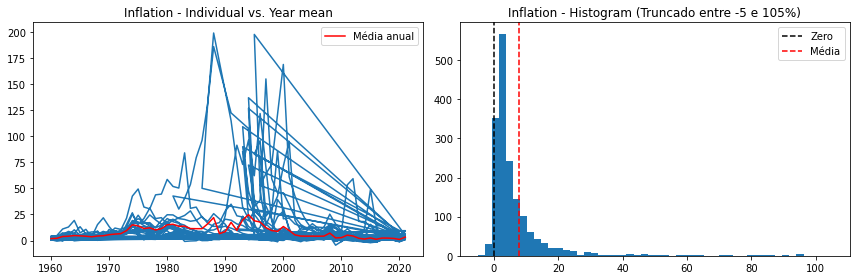

In [19]:
f,((ax1,ax2)) = plt.subplots(1,2, figsize=(12,4), tight_layout=True)

ax1.set_title('Inflation - Individual vs. Year mean')
ax1.plot(df_inflation1.year, df_inflation1.value)
ax1.plot(tab_din_all_y1.index, tab_din_all_y1.inflation, 'r', label='Média anual')
ax1.legend()

ax2.set_title('Inflation - Histogram (Truncado entre -5 e 105%)')
ax2.hist(df_inflation1.value, bins=50, range=[-5,105])
ax2.axvline(0, color='k', linestyle='--', label = 'Zero')
ax2.axvline(df_inflation1.value.mean(), color='r', linestyle='--', label='Média')
ax2.legend()

plt.show()

### **2. Comparando Leste com Oeste**

In [20]:
# Diferetes países
n_countries = len(df.country.unique())

In [21]:
# Criando tabela dinâmica para AGRUPAR POR ANO
tab_din_all_yc = pd.pivot_table(df, values='value', index='year', columns='indicator', aggfunc='count')

[]

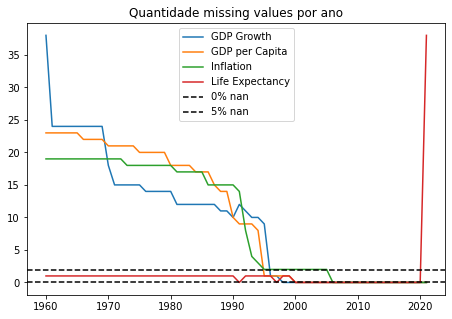

In [22]:
plt.figure(figsize=(7.5,5))

plt.title('Quantidade missing values por ano')
plt.plot(n_countries - tab_din_all_yc.gdp_growth, label='GDP Growth')
plt.plot(n_countries - tab_din_all_yc.gdp_per_capita, label='GDP per Capita')
plt.plot(n_countries - tab_din_all_yc.inflation, label='Inflation')
plt.plot(n_countries - tab_din_all_yc.life_expectancy, label='Life Expectancy')
plt.axhline(0, color='k', linestyle='--', label = '0% nan')
plt.axhline(n_countries*0.05, color='k', linestyle='--', label = '5% nan')
plt.legend()

plt.plot()

In [23]:
# Checando a partir de que ano é possível ter 95%+ dos dados sem missing values
pd.pivot_table(df_gdp_growth, values='value', index='year', columns='indicator', aggfunc='count')[30:40]

indicator,gdp_growth
year,
1990,28
1991,26
1992,27
1993,28
1994,28
1995,29
1996,37
1997,37
1998,38


##### A partir de 1996, é possível analisar todas as variáveis sem problemas de missing values.

### 2.1. Comparando TENDÊNCIA

In [24]:
### Países do leste vs. Países do Oeste
west_c = ['Austria','Belgium','Cyprus','Denmark','Finland','France','Germany','Greece','Iceland','Ireland','Italy','Luxembourg',
          'Malta','Norway','Portugal','Spain','Sweden','Switzerland','The Netherlands','United Kingdom']
east_c = ['Albania','Belarus','Bosnia and Herzegovina','Bulgaria','Croatia','Czechia','Estonia','Hungary','Latvia','Lithuania',
          'Moldova','Montenegro','North Macedonia','Romania','Russian Federation','Slovak Republic','Serbia','Slovenia','Ukraine']

df_west = df[df['country'].isin(west_c)]
df_east = df[df['country'].isin(east_c)]

# Criando tabela dinâmica para AGRUPAR POR ANO
tab_din_west_y = pd.pivot_table(df_west, values='value', index='year', columns='indicator', aggfunc='mean')
tab_din_east_y = pd.pivot_table(df_east, values='value', index='year', columns='indicator', aggfunc='mean')

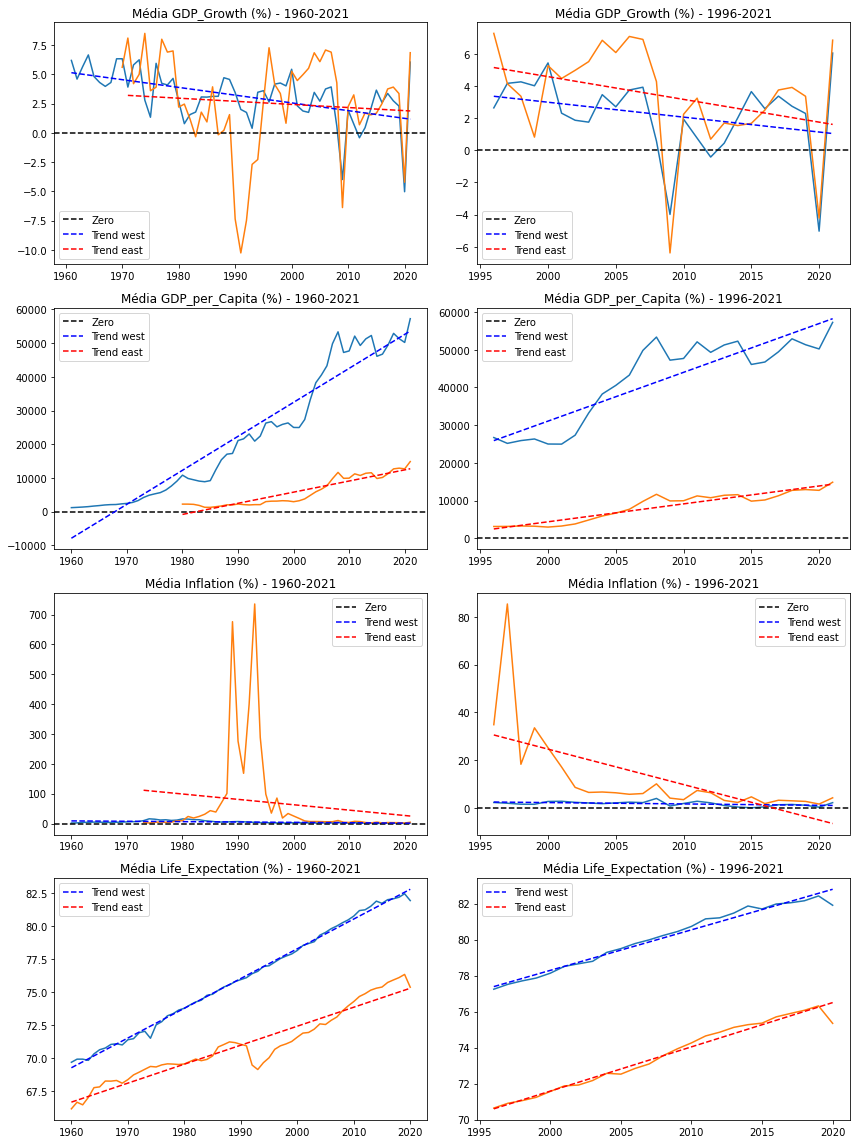

In [25]:
f,((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8)) = plt.subplots(4,2, figsize=(12,16), tight_layout=True)

ax1.set_title('Média GDP_Growth (%) - 1960-2021')
ax1.plot(tab_din_west_y.gdp_growth)
ax1.plot(tab_din_east_y.gdp_growth)
ax1.axhline(0, color='k', linestyle='--', label = 'Zero')
coef_w = np.polyfit(tab_din_west_y.index[1:62], tab_din_west_y.gdp_growth.iloc[1:62], 1)
tend_w = np.poly1d(coef_w)
ax1.plot(tab_din_west_y.index[1:62],tend_w(tab_din_west_y.index[1:62]), '--', color='b', label='Trend west')
coef_e = np.polyfit(tab_din_east_y.index[11:62], tab_din_east_y.gdp_growth.iloc[11:62], 1)
tend_e = np.poly1d(coef_e)
ax1.plot(tab_din_east_y.index[11:62],tend_e(tab_din_east_y.index[11:62]), '--', color='r', label='Trend east')
ax1.legend()

ax2.set_title('Média GDP_Growth (%) - 1996-2021')
ax2.plot(tab_din_west_y.gdp_growth[36:62])
ax2.plot(tab_din_east_y.gdp_growth[36:62])
ax2.axhline(0, color='k', linestyle='--', label = 'Zero')
coef_w = np.polyfit(tab_din_west_y.index[36:62], tab_din_west_y.gdp_growth.iloc[36:62], 1)
tend_w = np.poly1d(coef_w)
ax2.plot(tab_din_west_y.index[36:62],tend_w(tab_din_west_y.index[36:62]), '--', color='b', label='Trend west')
coef_e = np.polyfit(tab_din_east_y.index[36:62], tab_din_east_y.gdp_growth.iloc[36:62], 1)
tend_e = np.poly1d(coef_e)
ax2.plot(tab_din_east_y.index[36:62],tend_e(tab_din_east_y.index[36:62]), '--', color='r', label='Trend east')
ax2.legend()

ax3.set_title('Média GDP_per_Capita (%) - 1960-2021')
ax3.plot(tab_din_west_y.gdp_per_capita)
ax3.plot(tab_din_east_y.gdp_per_capita)
ax3.axhline(0, color='k', linestyle='--', label = 'Zero')
coef_w = np.polyfit(tab_din_west_y.index[0:62], tab_din_west_y.gdp_per_capita.iloc[0:62], 1)
tend_w = np.poly1d(coef_w)
ax3.plot(tab_din_west_y.index[0:62],tend_w(tab_din_west_y.index[0:62]), '--', color='b', label='Trend west')
coef_e = np.polyfit(tab_din_east_y.index[20:62], tab_din_east_y.gdp_per_capita.iloc[20:62], 1)
tend_e = np.poly1d(coef_e)
ax3.plot(tab_din_east_y.index[20:62],tend_e(tab_din_east_y.index[20:62]), '--', color='r', label='Trend east')
ax3.legend()

ax4.set_title('Média GDP_per_Capita (%) - 1996-2021')
ax4.plot(tab_din_west_y.gdp_per_capita[36:62])
ax4.plot(tab_din_east_y.gdp_per_capita[36:62])
ax4.axhline(0, color='k', linestyle='--', label = 'Zero')
coef_w = np.polyfit(tab_din_west_y.index[36:62], tab_din_west_y.gdp_per_capita.iloc[36:62], 1)
tend_w = np.poly1d(coef_w)
ax4.plot(tab_din_west_y.index[36:62],tend_w(tab_din_west_y.index[36:62]), '--', color='b', label='Trend west')
coef_e = np.polyfit(tab_din_east_y.index[36:62], tab_din_east_y.gdp_per_capita.iloc[36:62], 1)
tend_e = np.poly1d(coef_e)
ax4.plot(tab_din_east_y.index[36:62],tend_e(tab_din_east_y.index[36:62]), '--', color='r', label='Trend east')
ax4.legend()

ax5.set_title('Média Inflation (%) - 1960-2021')
ax5.plot(tab_din_west_y.inflation)
ax5.plot(tab_din_east_y.inflation)
ax5.axhline(0, color='k', linestyle='--', label = 'Zero')
coef_w = np.polyfit(tab_din_west_y.index[0:62], tab_din_west_y.inflation.iloc[0:62], 1)
tend_w = np.poly1d(coef_w)
ax5.plot(tab_din_west_y.index[0:62],tend_w(tab_din_west_y.index[0:62]), '--', color='b', label='Trend west')
coef_e = np.polyfit(tab_din_east_y.index[13:62], tab_din_east_y.inflation.iloc[13:62], 1)
tend_e = np.poly1d(coef_e)
ax5.plot(tab_din_east_y.index[13:62],tend_e(tab_din_east_y.index[13:62]), '--', color='r', label='Trend east')
ax5.legend()

ax6.set_title('Média Inflation (%) - 1996-2021')
ax6.plot(tab_din_west_y.inflation[36:62])
ax6.plot(tab_din_east_y.inflation[36:62])
ax6.axhline(0, color='k', linestyle='--', label = 'Zero')
coef_w = np.polyfit(tab_din_west_y.index[36:62], tab_din_west_y.inflation.iloc[36:62], 1)
tend_w = np.poly1d(coef_w)
ax6.plot(tab_din_west_y.index[36:62],tend_w(tab_din_west_y.index[36:62]), '--', color='b', label='Trend west')
coef_e = np.polyfit(tab_din_east_y.index[36:62], tab_din_east_y.inflation.iloc[36:62], 1)
tend_e = np.poly1d(coef_e)
ax6.plot(tab_din_east_y.index[36:62],tend_e(tab_din_east_y.index[36:62]), '--', color='r', label='Trend east')
ax6.legend()

ax7.set_title('Média Life_Expectation (%) - 1960-2021')
ax7.plot(tab_din_west_y.life_expectancy)
ax7.plot(tab_din_east_y.life_expectancy)
coef_w = np.polyfit(tab_din_west_y.index[0:61], tab_din_west_y.life_expectancy.iloc[0:61], 1)
tend_w = np.poly1d(coef_w)
ax7.plot(tab_din_west_y.index[0:61],tend_w(tab_din_west_y.index[0:61]), '--', color='b', label='Trend west')
coef_e = np.polyfit(tab_din_east_y.index[0:61], tab_din_east_y.life_expectancy.iloc[0:61], 1)
tend_e = np.poly1d(coef_e)
ax7.plot(tab_din_east_y.index[0:61],tend_e(tab_din_east_y.index[0:61]), '--', color='r', label='Trend east')
ax7.legend()

ax8.set_title('Média Life_Expectation (%) - 1996-2021')
ax8.plot(tab_din_west_y.life_expectancy[36:61])
ax8.plot(tab_din_east_y.life_expectancy[36:61])
coef_w = np.polyfit(tab_din_west_y.index[36:61], tab_din_west_y.life_expectancy.iloc[36:61], 1)
tend_w = np.poly1d(coef_w)
ax8.plot(tab_din_west_y.index[36:61],tend_w(tab_din_west_y.index[36:61]), '--', color='b', label='Trend west')
coef_e = np.polyfit(tab_din_east_y.index[36:61], tab_din_east_y.life_expectancy.iloc[36:61], 1)
tend_e = np.poly1d(coef_e)
ax8.plot(tab_din_east_y.index[36:61],tend_e(tab_din_east_y.index[36:61]), '--', color='r', label='Trend east')
ax8.legend()

plt.show()

### 2.2. Melhores e piores TENDÊNCIAS

In [60]:
paises = df_gdp_growth.country.unique()
dicionario_gg = {}
dicionario_gpc = {}
dicionario_i = {}
dicionario_le = {}

# Para cada país, calcular a inclinação da reta
for i in paises:
    df_pais = df[df.country == i]
    df_gdp_growth1 = df_pais.query('indicator == "gdp_growth"').copy().reset_index(drop=True)
    dicionario_gg[i] = round(np.polyfit(df_gdp_growth1.year[38:61], df_gdp_growth1.value[38:61], 1)[0],2)

for i in paises:
    df_pais = df[df.country == i]
    df_gdp_p_cap1 = df_pais.query('indicator == "gdp_per_capita"').copy().reset_index(drop=True)
    dicionario_gpc[i] = round(np.polyfit(df_gdp_p_cap1.year[40:61], df_gdp_p_cap1.value[40:61], 1)[0],2)

for i in paises:
    df_pais = df[df.country == i]
    df_inflation1 = df_pais.query('indicator == "inflation"').copy().reset_index(drop=True)
    dicionario_i[i] = round(np.polyfit(df_inflation1.year[46:61], df_inflation1.value[46:61], 1)[0],2)

for i in paises:
    df_pais = df[df.country == i]
    df_life_exp1 = df_pais.query('indicator == "life_expectancy"').copy().reset_index(drop=True)
    dicionario_le[i] = round(np.polyfit(df_life_exp1.year[40:60], df_life_exp1.value[40:60], 1)[0],2)

In [61]:
# Analisando os países por inclinação da reta
print('  GDP_GROWTH')
dict(sorted(dicionario_gg.items(), key=lambda item: item[1], reverse=True))

  GDP_GROWTH


{'Ireland': 0.02,
 'Moldova': -0.01,
 'Romania': -0.02,
 'Denmark': -0.05,
 'Germany': -0.05,
 'Switzerland': -0.07,
 'Czechia': -0.08,
 'Malta': -0.08,
 'Norway': -0.08,
 'Montenegro': -0.09,
 'Serbia': -0.09,
 'Bulgaria': -0.11,
 'Hungary': -0.11,
 'North Macedonia': -0.11,
 'Slovak Republic': -0.12,
 'Sweden': -0.12,
 'Belgium': -0.13,
 'Slovenia': -0.15,
 'Austria': -0.16,
 'Portugal': -0.16,
 'France': -0.17,
 'Lithuania': -0.17,
 'Croatia': -0.18,
 'Italy': -0.18,
 'Cyprus': -0.19,
 'Estonia': -0.19,
 'Iceland': -0.19,
 'United Kingdom': -0.19,
 'Finland': -0.21,
 'Luxembourg': -0.22,
 'Russian Federation': -0.26,
 'Spain': -0.28,
 'Latvia': -0.29,
 'Ukraine': -0.34,
 'Greece': -0.37,
 'Albania': -0.39,
 'Belarus': -0.39,
 'Bosnia and Herzegovina': -0.43}

##### GDP_GROWTH (desde 1996)
##### Europa Ocidental:
- Melhor: Irlanda
- Pior: Grécia
##### Europa Oriental:
- Melhor: Moldávia
- Pior: Bósnia e Herzegovina

In [62]:
df_ir = df.query('indicator == "gdp_growth" and country == "Ireland"').copy().reset_index(drop=True)
df_gr = df.query('indicator == "gdp_growth" and country == "Greece"').copy().reset_index(drop=True)
df_mo = df.query('indicator == "gdp_growth" and country == "Moldova"').copy().reset_index(drop=True)
df_bh = df.query('indicator == "gdp_growth" and country == "Bosnia and Herzegovina"').copy().reset_index(drop=True)

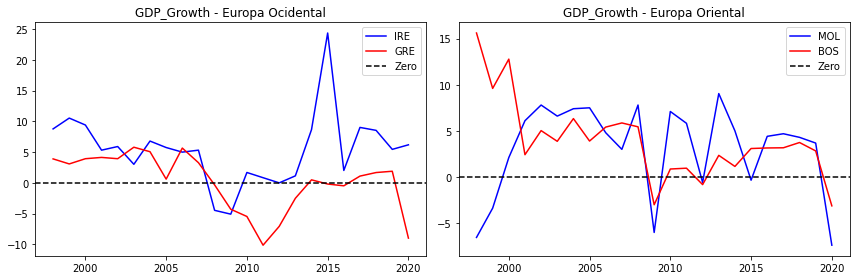

In [63]:
f,((ax1,ax2)) = plt.subplots(1,2, figsize=(12,4), tight_layout=True)

ax1.set_title('GDP_Growth - Europa Ocidental')
ax1.plot(df_ir.year[38:61], df_ir.value[38:61], color='b', label='IRE')
ax1.plot(df_gr.year[38:61], df_gr.value[38:61], color='r', label='GRE')
ax1.axhline(0, color='k', linestyle='--', label = 'Zero')
ax1.legend()

ax2.set_title('GDP_Growth - Europa Oriental')
ax2.plot(df_mo.year[38:61], df_mo.value[38:61], color='b', label='MOL')
ax2.plot(df_bh.year[38:61], df_bh.value[38:61], color='r', label='BOS')
ax2.axhline(0, color='k', linestyle='--', label = 'Zero')
ax2.legend()

plt.show()

In [64]:
# Analisando os países por inclinação da reta
print(' GDP_per_Capita  ')
dict(sorted(dicionario_gpc.items(), key=lambda item: item[1], reverse=True))

 GDP_per_Capita  


{'Luxembourg': 3316.98,
 'Switzerland': 2560.48,
 'Ireland': 2254.55,
 'Norway': 1827.31,
 'Iceland': 1528.93,
 'Denmark': 1326.76,
 'Sweden': 1241.73,
 'Austria': 1180.25,
 'Germany': 1123.23,
 'Finland': 1073.65,
 'Belgium': 1053.69,
 'Malta': 1025.11,
 'Estonia': 948.8,
 'Lithuania': 828.64,
 'Czechia': 784.58,
 'France': 756.35,
 'Latvia': 730.7,
 'Slovenia': 671.56,
 'Slovak Republic': 670.56,
 'Romania': 557.36,
 'United Kingdom': 527.51,
 'Russian Federation': 525.45,
 'Cyprus': 515.63,
 'Spain': 504.43,
 'Hungary': 481.18,
 'Italy': 452.03,
 'Portugal': 450.88,
 'Bulgaria': 412.27,
 'Croatia': 412.22,
 'Montenegro': 341.83,
 'Belarus': 298.8,
 'Serbia': 279.39,
 'Bosnia and Herzegovina': 234.97,
 'North Macedonia': 219.04,
 'Moldova': 211.42,
 'Albania': 200.82,
 'Ukraine': 126.61,
 'Greece': 70.99}

##### GDP_per_Capita (desde 1998)
##### Europa Ocidental:
- Melhor: Luxembourg
- Pior: Grécia
##### Europa Oriental
- Melhor: Estonia
- Pior: Ucrânia

In [65]:
df_lx = df.query('indicator == "gdp_per_capita" and country == "Luxembourg"').copy().reset_index(drop=True)
df_es = df.query('indicator == "gdp_per_capita" and country == "Estonia"').copy().reset_index(drop=True)
df_gr = df.query('indicator == "gdp_per_capita" and country == "Greece"').copy().reset_index(drop=True)
df_uc = df.query('indicator == "gdp_per_capita" and country == "Ukraine"').copy().reset_index(drop=True)

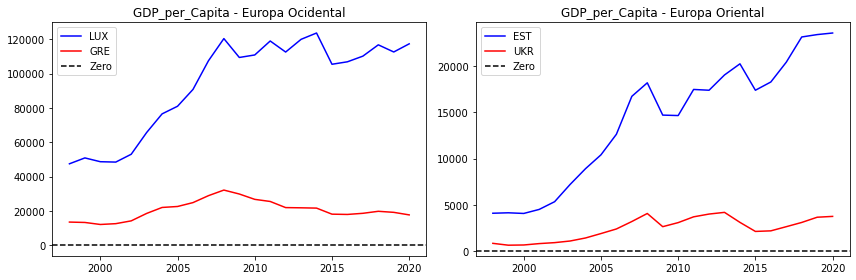

In [66]:
f,((ax1,ax2)) = plt.subplots(1,2, figsize=(12,4), tight_layout=True)

ax1.set_title('GDP_per_Capita - Europa Ocidental')
ax1.plot(df_lx.year[38:61], df_lx.value[38:61], color='b', label='LUX')
ax1.plot(df_gr.year[38:61], df_gr.value[38:61], color='r', label='GRE')
ax1.axhline(0, color='k', linestyle='--', label = 'Zero')
ax1.legend()

ax2.set_title('GDP_per_Capita - Europa Oriental')
ax2.plot(df_es.year[38:61], df_es.value[38:61], color='b', label='EST')
ax2.plot(df_uc.year[38:61], df_uc.value[38:61], color='r', label='UKR')
ax2.axhline(0, color='k', linestyle='--', label = 'Zero')
ax2.legend()

plt.show()

In [67]:
# Analisando os países por inclinação da reta
print('  Inflation')
dict(sorted(dicionario_i.items(), key=lambda item: item[1], reverse=True))

  Inflation


{'Norway': 0.01,
 'Austria': -0.04,
 'Sweden': -0.05,
 'Czechia': -0.07,
 'Germany': -0.07,
 'Belgium': -0.08,
 'France': -0.08,
 'Switzerland': -0.08,
 'United Kingdom': -0.11,
 'Albania': -0.12,
 'Luxembourg': -0.12,
 'Malta': -0.14,
 'Denmark': -0.15,
 'Finland': -0.15,
 'Italy': -0.16,
 'Portugal': -0.16,
 'Ukraine': -0.16,
 'Slovak Republic': -0.17,
 'Ireland': -0.2,
 'Slovenia': -0.21,
 'Spain': -0.21,
 'North Macedonia': -0.24,
 'Cyprus': -0.27,
 'Croatia': -0.28,
 'Hungary': -0.29,
 'Montenegro': -0.33,
 'Greece': -0.34,
 'Lithuania': -0.34,
 'Bosnia and Herzegovina': -0.37,
 'Estonia': -0.37,
 'Romania': -0.37,
 'Moldova': -0.46,
 'Bulgaria': -0.51,
 'Russian Federation': -0.51,
 'Iceland': -0.53,
 'Latvia': -0.58,
 'Serbia': -0.75,
 'Belarus': -0.76}

##### Inflation (desde 2004)
##### Europa Ocidental:
- Melhor: Islândia
- Pior: Noruega
##### Europa Oriental:
- Melhor: Belarus
- Pior: Ucrânia

In [68]:
df_ic = df.query('indicator == "inflation" and country == "Iceland"').copy().reset_index(drop=True)
df_no = df.query('indicator == "inflation" and country == "Norway"').copy().reset_index(drop=True)
df_be = df.query('indicator == "inflation" and country == "Belarus"').copy().reset_index(drop=True)
df_uc = df.query('indicator == "inflation" and country == "Ukraine"').copy().reset_index(drop=True)

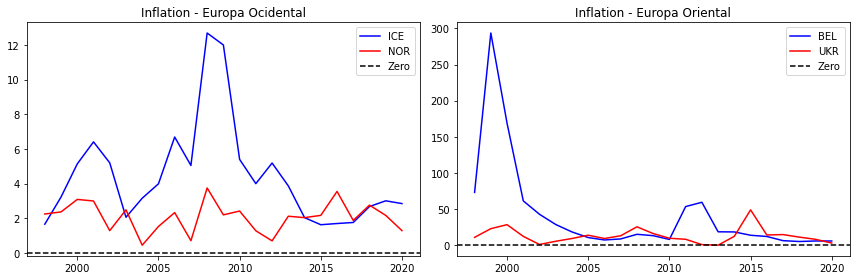

In [69]:
f,((ax1,ax2)) = plt.subplots(1,2, figsize=(12,4), tight_layout=True)

ax1.set_title('Inflation - Europa Ocidental')
ax1.plot(df_ic.year[38:61], df_ic.value[38:61], color='b', label='ICE')
ax1.plot(df_no.year[38:61], df_no.value[38:61], color='r', label='NOR')
ax1.axhline(0, color='k', linestyle='--', label = 'Zero')
ax1.legend()

ax2.set_title('Inflation - Europa Oriental')
ax2.plot(df_be.year[38:61], df_be.value[38:61], color='b', label='BEL')
ax2.plot(df_uc.year[38:61], df_uc.value[38:61], color='r', label='UKR')
ax2.axhline(0, color='k', linestyle='--', label = 'Zero')
ax2.legend()

plt.show()

In [70]:
# Analisando os países por inclinação da reta
print('  Life expectancy')
dict(sorted(dicionario_le.items(), key=lambda item: item[1], reverse=True))

  Life expectancy


{'Estonia': 0.48,
 'Russian Federation': 0.46,
 'Belarus': 0.36,
 'Slovenia': 0.33,
 'Portugal': 0.3,
 'Ireland': 0.29,
 'Luxembourg': 0.29,
 'Romania': 0.28,
 'Denmark': 0.27,
 'Hungary': 0.27,
 'Latvia': 0.27,
 'Spain': 0.27,
 'Cyprus': 0.26,
 'Ukraine': 0.26,
 'Czechia': 0.25,
 'Lithuania': 0.25,
 'Malta': 0.25,
 'Slovak Republic': 0.25,
 'Croatia': 0.24,
 'Finland': 0.24,
 'Norway': 0.23,
 'Serbia': 0.23,
 'Belgium': 0.22,
 'France': 0.22,
 'Switzerland': 0.21,
 'Albania': 0.2,
 'Austria': 0.2,
 'Bulgaria': 0.2,
 'Greece': 0.2,
 'Italy': 0.2,
 'Moldova': 0.2,
 'United Kingdom': 0.2,
 'Montenegro': 0.19,
 'North Macedonia': 0.19,
 'Germany': 0.18,
 'Sweden': 0.17,
 'Iceland': 0.15,
 'Bosnia and Herzegovina': 0.11}

##### Life expectancy (desde 1998)
##### Europa Ocidental:
- Melhor: Portugal
- Pior: Islândia
##### Europa Oriental:
- Melhor: Estônia
- Pior: Bósnia e Herzegovina

In [71]:
df_pt = df.query('indicator == "life_expectancy" and country == "Portugal"').copy().reset_index(drop=True)
df_ic = df.query('indicator == "life_expectancy" and country == "Iceland"').copy().reset_index(drop=True)
df_es = df.query('indicator == "life_expectancy" and country == "Estonia"').copy().reset_index(drop=True)
df_bh = df.query('indicator == "life_expectancy" and country == "Bosnia and Herzegovina"').copy().reset_index(drop=True)

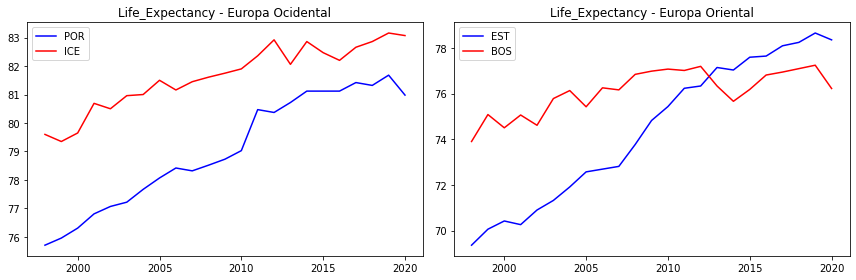

In [72]:
f,((ax1,ax2)) = plt.subplots(1,2, figsize=(12,4), tight_layout=True)

ax1.set_title('Life_Expectancy - Europa Ocidental')
ax1.plot(df_pt.year[38:61], df_pt.value[38:61], color='b', label='POR')
ax1.plot(df_ic.year[38:61], df_ic.value[38:61], color='r', label='ICE')
ax1.legend()

ax2.set_title('Life_Expectancy - Europa Oriental')
ax2.plot(df_es.year[38:61], df_es.value[38:61], color='b', label='EST')
ax2.plot(df_bh.year[38:61], df_bh.value[38:61], color='r', label='BOS')
ax2.legend()

plt.show()

### 2.3. Melhores e piores MÉDIAS

#### **2.3.1. All years**

In [73]:
# Tabela dinâmica para AGREGAR POR PAÍS
tab_din_all = pd.pivot_table(df, values='value', index='country', columns='indicator', aggfunc='mean')

In [74]:
# Observando valores
tab_din_all

indicator,gdp_growth,gdp_per_capita,inflation,life_expectancy
country,,,,
Albania,3.517692,2449.977368,15.340333,71.419016
Austria,2.620164,22715.737258,3.215000,75.405082
Belarus,2.512581,3964.870000,178.953793,70.487377
Belgium,2.568197,21671.527419,3.397419,75.701475
Bosnia and Herzegovina,6.304167,3458.355357,1.406875,70.859836
Bulgaria,1.786098,4313.557857,55.246111,71.906066
Croatia,2.561489,11081.748889,130.316944,72.225082
Cyprus,4.789783,16380.670426,3.365968,73.653115
Czechia,1.906129,13681.492813,4.429000,73.242295


In [75]:
sorted_gg = np.argsort(tab_din_all.gdp_growth)[::-1]
x_sorted_gg = [tab_din_all.index[i] for i in sorted_gg]
y_sorted_gg = [tab_din_all.gdp_growth[i] for i in sorted_gg]

sorted_gpc = np.argsort(tab_din_all.gdp_per_capita)[::-1]
x_sorted_gpc = [tab_din_all.index[i] for i in sorted_gpc]
y_sorted_gpc = [tab_din_all.gdp_per_capita[i] for i in sorted_gpc]

sorted_i = np.argsort(tab_din_all.inflation)[::-1]
x_sorted_i = [tab_din_all.index[i] for i in sorted_i]
y_sorted_i = [tab_din_all.inflation[i] for i in sorted_i]

sorted_li = np.argsort(np.log(tab_din_all.inflation))[::-1]
x_sorted_li = [tab_din_all.index[i] for i in sorted_li]
y_sorted_li = [np.log(tab_din_all.inflation[i]) for i in sorted_li]

sorted_le = np.argsort(tab_din_all.life_expectancy)[::-1]
x_sorted_le = [tab_din_all.index[i] for i in sorted_le]
y_sorted_le = [tab_din_all.life_expectancy[i] for i in sorted_le]

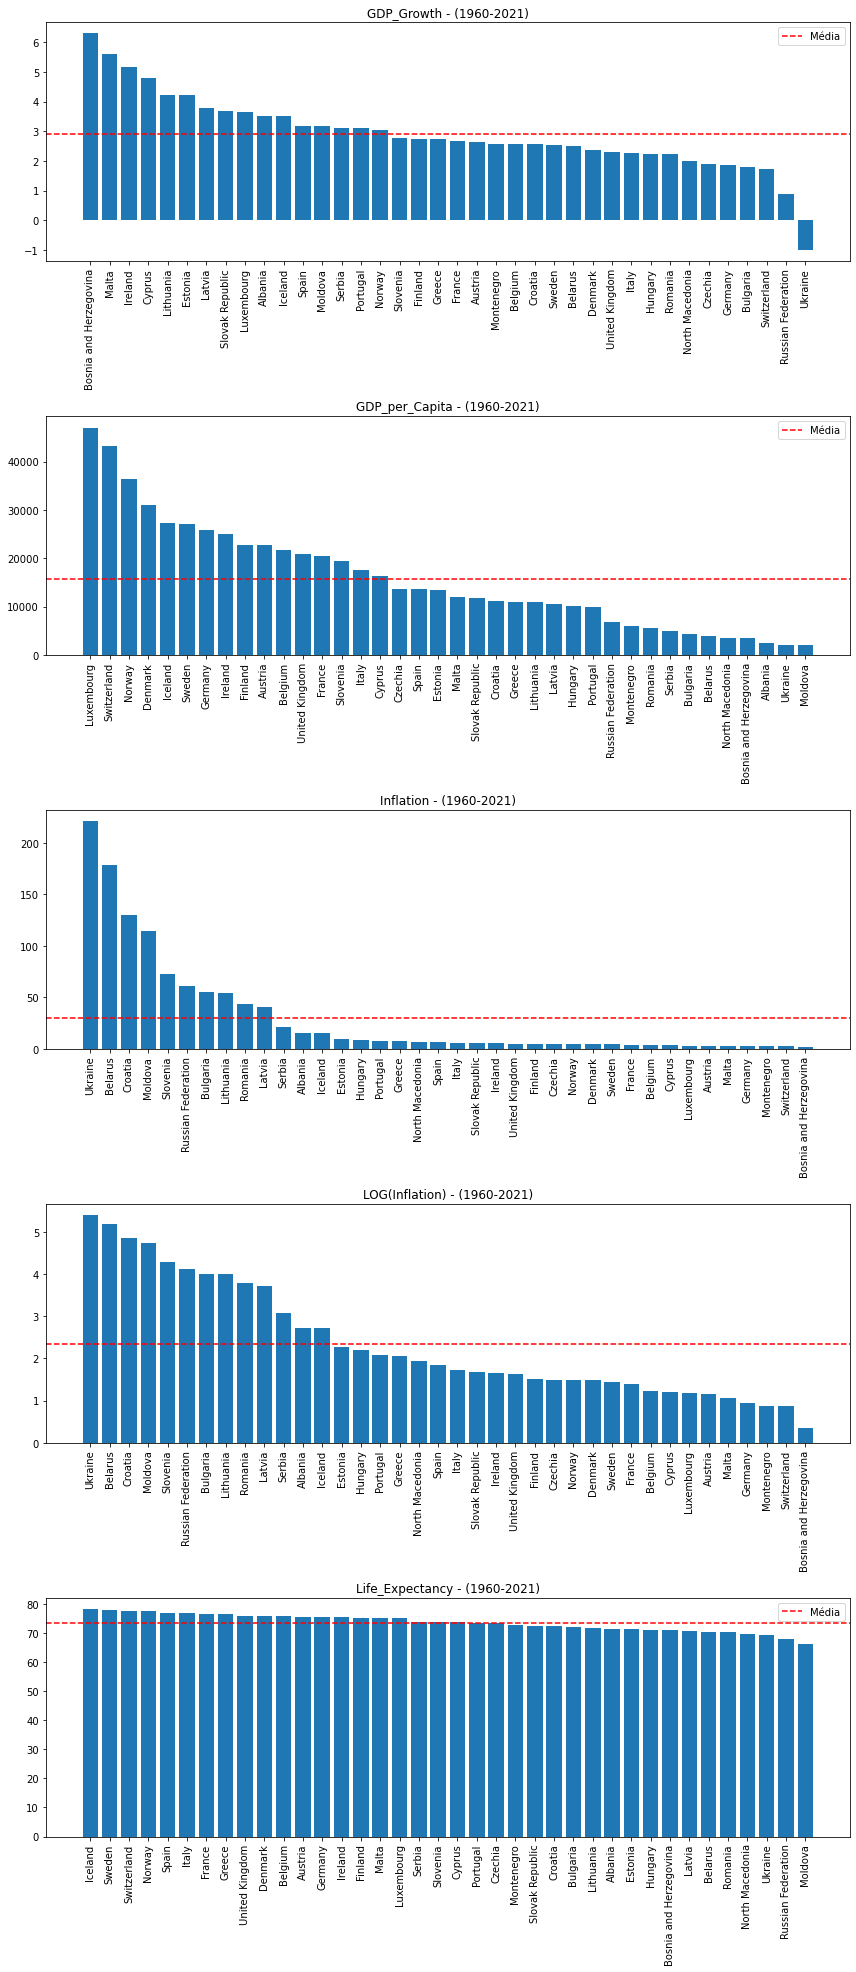

In [76]:
f,((ax1,ax2,ax3,ax4,ax5)) = plt.subplots(5,1, figsize=(12,27.5), tight_layout=True)

ax1.set_title('GDP_Growth - (1960-2021)')
ax1.bar(x_sorted_gg, y_sorted_gg)
ax1.set_xticklabels(x_sorted_gg, rotation=90)
ax1.axhline(tab_din_all.gdp_growth.mean(), color='r', linestyle='--', label = 'Média')
ax1.legend()

ax2.set_title('GDP_per_Capita - (1960-2021)')
ax2.bar(x_sorted_gpc, y_sorted_gpc)
ax2.set_xticklabels(x_sorted_gpc, rotation=90)
ax2.axhline(tab_din_all.gdp_per_capita.mean(), color='r', linestyle='--', label = 'Média')
ax2.legend()

ax3.set_title('Inflation - (1960-2021)')
ax3.bar(x_sorted_i, y_sorted_i)
ax3.set_xticklabels(x_sorted_i, rotation=90)
ax3.axhline(tab_din_all.inflation.mean(), color='r', linestyle='--', label = 'Média')

ax4.set_title('LOG(Inflation) - (1960-2021)')
ax4.bar(x_sorted_li, y_sorted_li)
ax4.set_xticklabels(x_sorted_li, rotation=90)
ax4.axhline(np.log(tab_din_all.inflation).mean(), color='r', linestyle='--', label = 'Média')

ax5.set_title('Life_Expectancy - (1960-2021)')
ax5.bar(x_sorted_le, y_sorted_le)
ax5.set_xticklabels(x_sorted_le, rotation=90)
ax5.axhline(tab_din_all.life_expectancy.mean(), color='r', linestyle='--', label = 'Média')
ax5.legend()

plt.show()

#### **2.3.2. Recentemente (dados dos países, todos os anos)**

##### A informação é mais consistente porque há mais dados, por isso fazemos essa análise adicional

In [77]:
recente = df[df.year >= 1998]
tab_din_recente = pd.pivot_table(recente, values='value', index='country', columns='indicator', aggfunc='mean')

In [78]:
# Observando valores
tab_din_recente

indicator,gdp_growth,gdp_per_capita,inflation,life_expectancy
country,,,,
Albania,4.655417,3521.417917,3.038750,77.333043
Austria,1.570417,42327.540000,1.837500,80.142609
Belarus,4.341250,4751.996250,39.683750,70.922609
Belgium,1.695000,39568.735000,1.857917,79.786087
Bosnia and Herzegovina,4.089583,3932.600417,1.406875,76.106522
Bulgaria,2.880417,6085.500000,4.589583,73.296522
Croatia,1.986250,11822.485000,2.308333,76.005652
Cyprus,2.864167,25463.437917,1.595417,79.191304
Czechia,2.416250,16692.442083,2.690833,77.047826


In [79]:
sorted_gg1 = np.argsort(tab_din_recente.gdp_growth)[::-1]
x_sorted_gg1 = [tab_din_recente.index[i] for i in sorted_gg1]
y_sorted_gg1 = [tab_din_recente.gdp_growth[i] for i in sorted_gg1]

sorted_gpc1 = np.argsort(tab_din_recente.gdp_per_capita)[::-1]
x_sorted_gpc1 = [tab_din_recente.index[i] for i in sorted_gpc1]
y_sorted_gpc1 = [tab_din_recente.gdp_per_capita[i] for i in sorted_gpc1]

sorted_i1 = np.argsort(tab_din_recente.inflation)[::-1]
x_sorted_i1 = [tab_din_recente.index[i] for i in sorted_i1]
y_sorted_i1 = [tab_din_recente.inflation[i] for i in sorted_i1]

sorted_li1 = np.argsort(np.log(tab_din_recente.inflation))[::-1]
x_sorted_li1 = [tab_din_recente.index[i] for i in sorted_li1]
y_sorted_li1 = [np.log(tab_din_recente.inflation[i]) for i in sorted_li1]

sorted_le1 = np.argsort(tab_din_recente.life_expectancy)[::-1]
x_sorted_le1 = [tab_din_recente.index[i] for i in sorted_le1]
y_sorted_le1 = [tab_din_recente.life_expectancy[i] for i in sorted_le1]

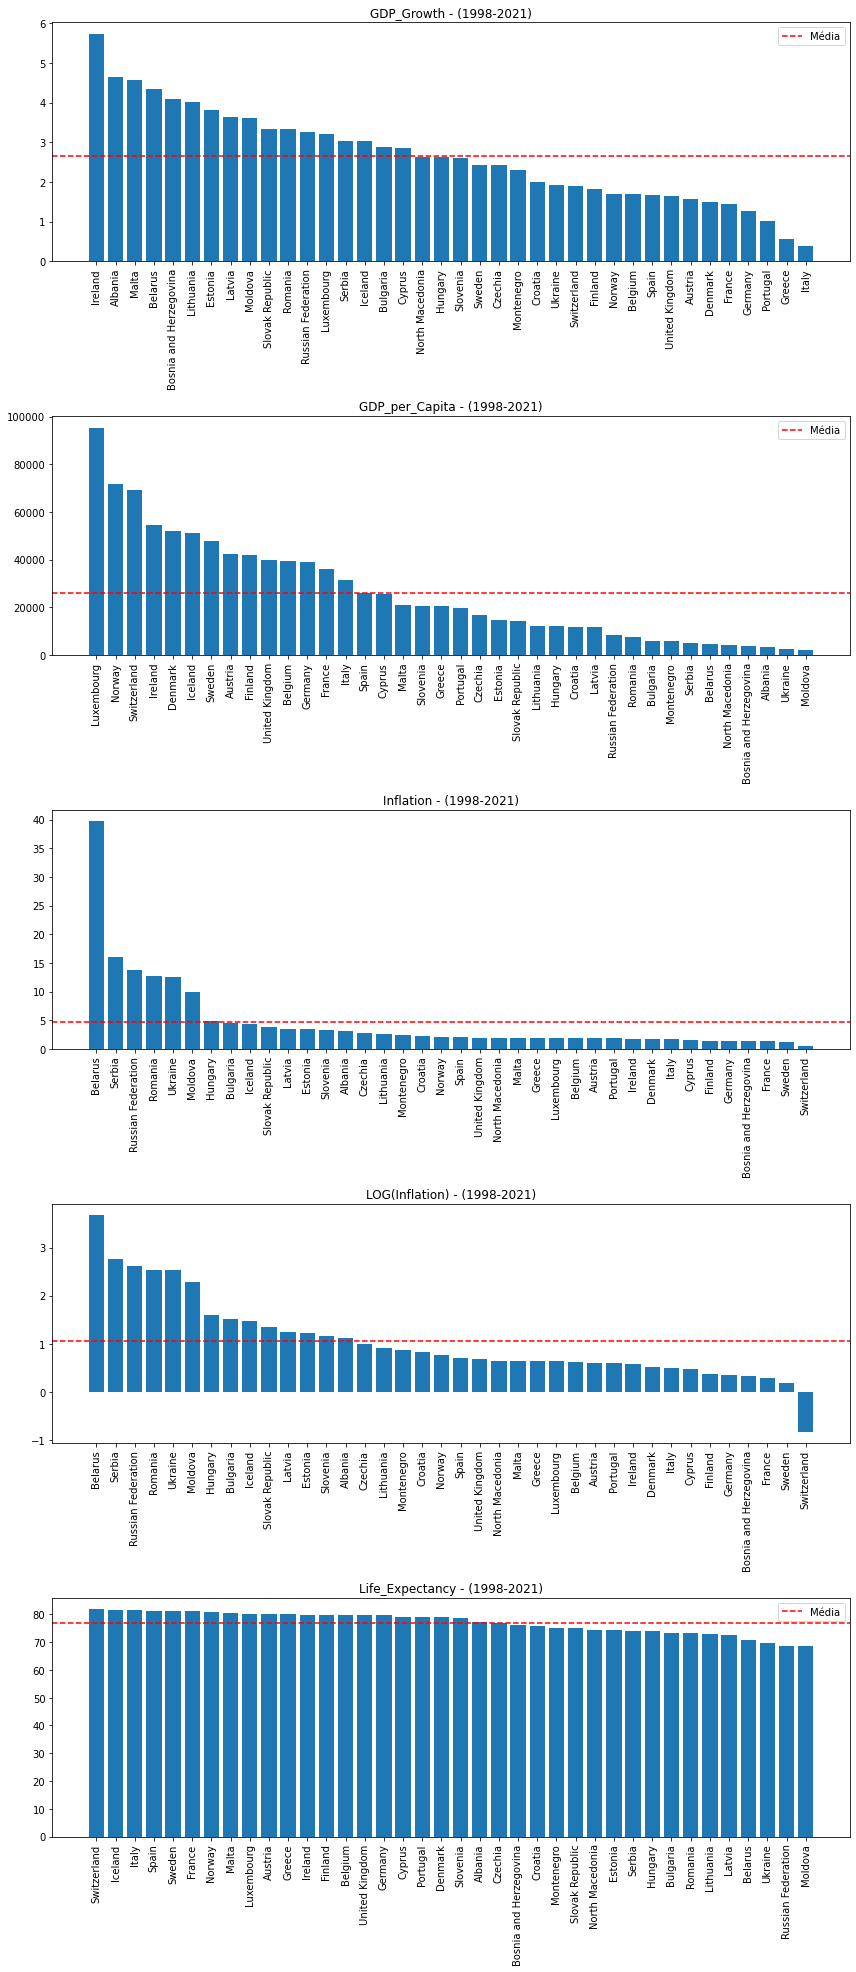

In [80]:
f,((ax1,ax2,ax3,ax4,ax5)) = plt.subplots(5,1, figsize=(12,27.5), tight_layout=True)

ax1.set_title('GDP_Growth - (1998-2021)')
ax1.bar(x_sorted_gg1, y_sorted_gg1)
ax1.set_xticklabels(x_sorted_gg1, rotation=90)
ax1.axhline(tab_din_recente.gdp_growth.mean(), color='r', linestyle='--', label = 'Média')
ax1.legend()

ax2.set_title('GDP_per_Capita - (1998-2021)')
ax2.bar(x_sorted_gpc1, y_sorted_gpc1)
ax2.set_xticklabels(x_sorted_gpc1, rotation=90)
ax2.axhline(tab_din_recente.gdp_per_capita.mean(), color='r', linestyle='--', label = 'Média')
ax2.legend()

ax3.set_title('Inflation - (1998-2021)')
ax3.bar(x_sorted_i1, y_sorted_i1)
ax3.set_xticklabels(x_sorted_i1, rotation=90)
ax3.axhline(tab_din_recente.inflation.mean(), color='r', linestyle='--', label = 'Média')

ax4.set_title('LOG(Inflation) - (1998-2021)')
ax4.bar(x_sorted_li1, y_sorted_li1)
ax4.set_xticklabels(x_sorted_li1, rotation=90)
ax4.axhline(np.log(tab_din_recente.inflation).mean(), color='r', linestyle='--', label = 'Média')

ax5.set_title('Life_Expectancy - (1998-2021)')
ax5.bar(x_sorted_le1, y_sorted_le1)
ax5.set_xticklabels(x_sorted_le1, rotation=90)
ax5.axhline(tab_din_recente.life_expectancy.mean(), color='r', linestyle='--', label = 'Média')
ax5.legend()

plt.show()

### 2.4. Correlações

#### **2.4.1. Todos os países**

In [81]:
# Criando dataframes para diferentes períodos de tempo
anos_60 = df[df.year >= 1960][df[df.year >= 1960].year <=1969]
anos_70 = df[df.year >= 1970][df[df.year >= 1970].year <=1979]
anos_80 = df[df.year >= 1980][df[df.year >= 1980].year <=1989]
anos_90 = df[df.year >= 1990][df[df.year >= 1990].year <=1999]
anos_00 = df[df.year >= 2000][df[df.year >= 2000].year <=2009]
anos_10 = df[df.year >= 2010][df[df.year >= 2010].year <=2019]
anos_20 = df[df.year >= 2020][df[df.year >= 2020].year <=2029]
cold_war = df[df.year >= 1960][df[df.year >= 1960].year <=1989]
pax_amer = df[df.year >= 1990][df[df.year >= 1990].year <=2019]

In [82]:
# Exemplo
anos_60

,country,country_code,indicator,year,value
0,Albania,ALB,gdp_growth,1960,NaN
1,Albania,ALB,gdp_growth,1961,NaN
2,Albania,ALB,gdp_growth,1962,NaN
3,Albania,ALB,gdp_growth,1963,NaN
4,Albania,ALB,gdp_growth,1964,NaN
...,...,...,...,...,...
9367,United Kingdom,GBR,life_expectancy,1965,71.62
9368,United Kingdom,GBR,life_expectancy,1966,71.57
9369,United Kingdom,GBR,life_expectancy,1967,72.12
9370,United Kingdom,GBR,life_expectancy,1968,71.72


Aqui agregamos por país, os indicadores, por meio da média.

In [83]:
# Tabela dinâmica para AGREGAR POR PAÍS
tab_din_all = pd.pivot_table(df, values='value', index='country', columns='indicator', aggfunc='mean')

# Tabela dinâmica por década
tab_din_60 = pd.pivot_table(anos_60, values='value', index='country', columns='indicator', aggfunc='mean')
tab_din_70 = pd.pivot_table(anos_70, values='value', index='country', columns='indicator', aggfunc='mean')
tab_din_80 = pd.pivot_table(anos_80, values='value', index='country', columns='indicator', aggfunc='mean')
tab_din_90 = pd.pivot_table(anos_90, values='value', index='country', columns='indicator', aggfunc='mean')
tab_din_00 = pd.pivot_table(anos_00, values='value', index='country', columns='indicator', aggfunc='mean')
tab_din_10 = pd.pivot_table(anos_10, values='value', index='country', columns='indicator', aggfunc='mean')
tab_din_20 = pd.pivot_table(anos_20, values='value', index='country', columns='indicator', aggfunc='mean')

# Tabela dinâmica por macroperíodo
tab_din_cold_war = pd.pivot_table(cold_war, values='value', index='country', columns='indicator', aggfunc='mean')
tab_din_pax_amer = pd.pivot_table(pax_amer, values='value', index='country', columns='indicator', aggfunc='mean')

In [84]:
# Exemplo
tab_din_cold_war

indicator,gdp_growth,gdp_per_capita,inflation,life_expectancy
country,,,,
Albania,4.330000,666.463333,NaN,66.224667
Austria,3.524828,6232.468333,4.420667,71.535667
Belarus,NaN,NaN,NaN,70.470000
Belgium,3.438621,6725.119333,4.888000,72.322667
Bosnia and Herzegovina,3.395000,NaN,NaN,67.988333
Bulgaria,3.850000,2275.468000,3.547500,71.030000
Croatia,3.395000,NaN,442.260000,69.391000
Cyprus,8.228571,4089.502667,4.519667,69.138000
Czechia,NaN,NaN,NaN,70.459667


#### **Heatmaps**

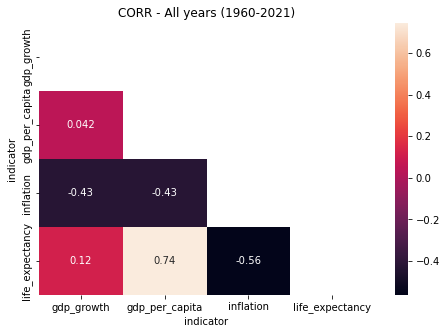

In [85]:
# Correlation map (all data)
plt.figure(figsize=(7.5,5))

plt.title('CORR - All years (1960-2021)')
mask = np.triu(np.ones_like(tab_din_all.corr())) #not to bring mirror results
dataplot = sns.heatmap(tab_din_all.corr(), annot=True, mask=mask) #creating plot

plt.show() 

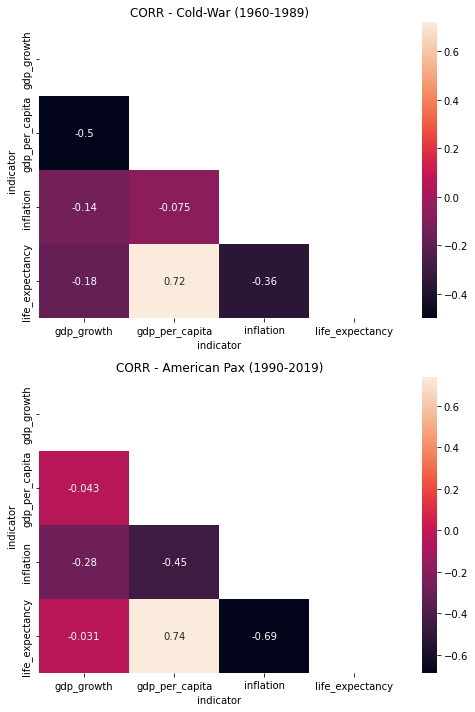

In [109]:
# Correlation map (macroperíodos)
f,(ax1,ax2) = plt.subplots(2,1, sharey=True, figsize=(7,10), tight_layout=True)

ax1.set_title('CORR - Cold-War (1960-1989)')
mask1 = np.triu(np.ones_like(tab_din_cold_war.corr()))
dataplot1 = sns.heatmap(tab_din_cold_war.corr(), annot=True, mask=mask1, ax=ax1)

ax2.set_title('CORR - American Pax (1990-2019)')
mask2 = np.triu(np.ones_like(tab_din_pax_amer.corr()))
dataplot2 = sns.heatmap(tab_din_pax_amer.corr(), annot=True, mask=mask2, ax=ax2)

plt.show()

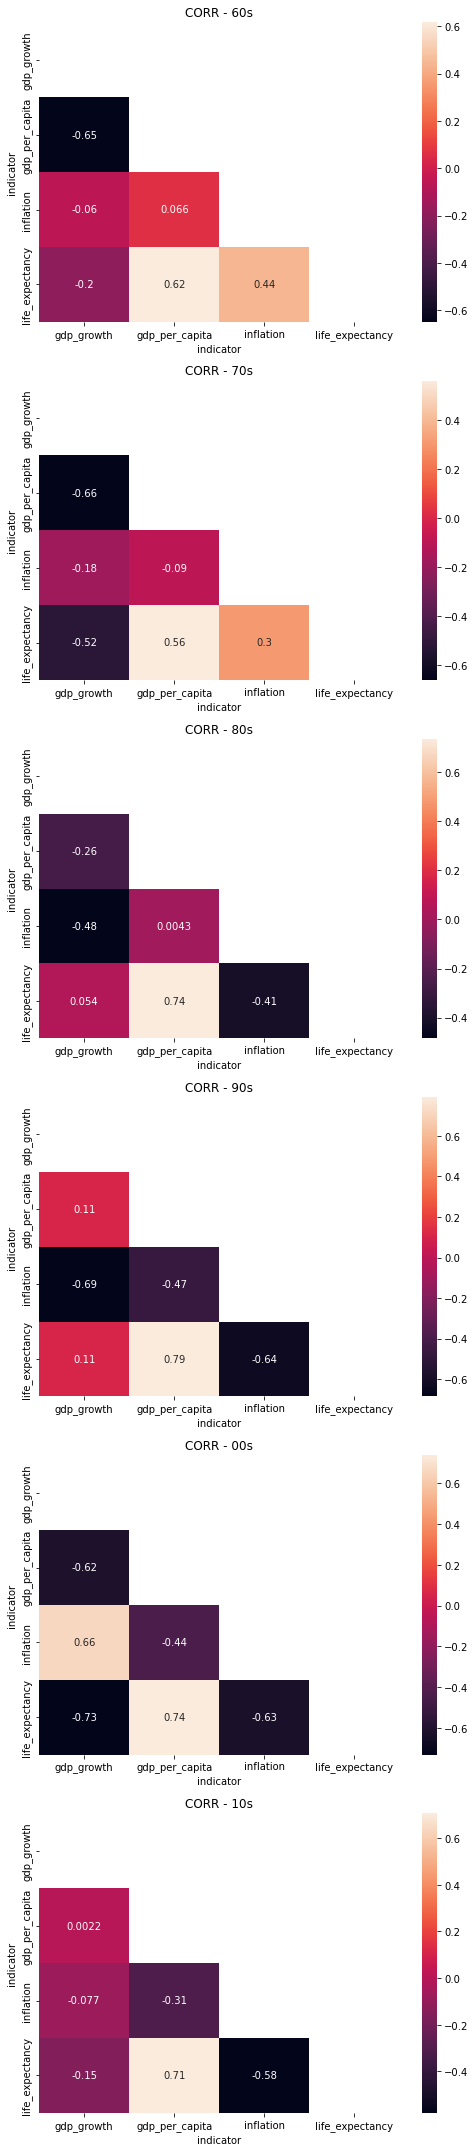

In [112]:
# Correlation map (décadas)
f,(ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(6,1, sharey=True, figsize=(7,30), tight_layout=True)

ax1.set_title('CORR - 60s')
mask1 = np.triu(np.ones_like(tab_din_60.corr()))
dataplot1 = sns.heatmap(tab_din_60.corr(), annot=True, mask=mask1, ax=ax1)

ax2.set_title('CORR - 70s')
mask2 = np.triu(np.ones_like(tab_din_70.corr()))
dataplot2 = sns.heatmap(tab_din_70.corr(), annot=True, mask=mask2, ax=ax2)

ax3.set_title('CORR - 80s')
mask3 = np.triu(np.ones_like(tab_din_80.corr()))
dataplot3 = sns.heatmap(tab_din_80.corr(), annot=True, mask=mask3, ax=ax3)

ax4.set_title('CORR - 90s')
mask4 = np.triu(np.ones_like(tab_din_90.corr()))
dataplot4 = sns.heatmap(tab_din_90.corr(), annot=True, mask=mask4, ax=ax4)

ax5.set_title('CORR - 00s')
mask5 = np.triu(np.ones_like(tab_din_00.corr()))
dataplot5 = sns.heatmap(tab_din_00.corr(), annot=True, mask=mask5, ax=ax5)

ax6.set_title('CORR - 10s')
mask6 = np.triu(np.ones_like(tab_din_10.corr()))
dataplot6 = sns.heatmap(tab_din_10.corr(), annot=True, mask=mask6, ax=ax6)

plt.show()

#### **Evolução das correlações**

In [39]:
# Criando os dataframes
evolucao_td_gg = pd.DataFrame()
evolucao_td_gpc = pd.DataFrame()
evolucao_td_i = pd.DataFrame()
evolucao_td_le = pd.DataFrame()

# Adicionando info por década
evolucao_td_gg = evolucao_td_gg.append(tab_din_60.corr()[0:1], ignore_index=True).append(tab_din_70.corr()[0:1], ignore_index=True).append(tab_din_80.corr()[0:1], ignore_index=True).append(tab_din_90.corr()[0:1], ignore_index=True).append(tab_din_00.corr()[0:1], ignore_index=True).append(tab_din_10.corr()[0:1], ignore_index=True)
evolucao_td_gpc = evolucao_td_gpc.append(tab_din_60.corr()[1:2], ignore_index=True).append(tab_din_70.corr()[1:2], ignore_index=True).append(tab_din_80.corr()[1:2], ignore_index=True).append(tab_din_90.corr()[1:2], ignore_index=True).append(tab_din_00.corr()[1:2], ignore_index=True).append(tab_din_10.corr()[1:2], ignore_index=True)
evolucao_td_i = evolucao_td_i.append(tab_din_60.corr()[2:3], ignore_index=True).append(tab_din_70.corr()[2:3], ignore_index=True).append(tab_din_80.corr()[2:3], ignore_index=True).append(tab_din_90.corr()[2:3], ignore_index=True).append(tab_din_00.corr()[2:3], ignore_index=True).append(tab_din_10.corr()[2:3], ignore_index=True)
evolucao_td_le = evolucao_td_le.append(tab_din_60.corr()[3:4], ignore_index=True).append(tab_din_70.corr()[3:4], ignore_index=True).append(tab_din_80.corr()[3:4], ignore_index=True).append(tab_din_90.corr()[3:4], ignore_index=True).append(tab_din_00.corr()[3:4], ignore_index=True).append(tab_din_10.corr()[3:4], ignore_index=True)

In [40]:
# Exemplo
evolucao_td_gg

indicator,gdp_growth,gdp_per_capita,inflation,life_expectancy
0,1.0,-0.649808,-0.060219,-0.197837
1,1.0,-0.660521,-0.179329,-0.523728
2,1.0,-0.260908,-0.484162,0.053978
3,1.0,0.105986,-0.685088,0.105845
4,1.0,-0.619148,0.660829,-0.730717
5,1.0,0.002206,-0.077289,-0.152154


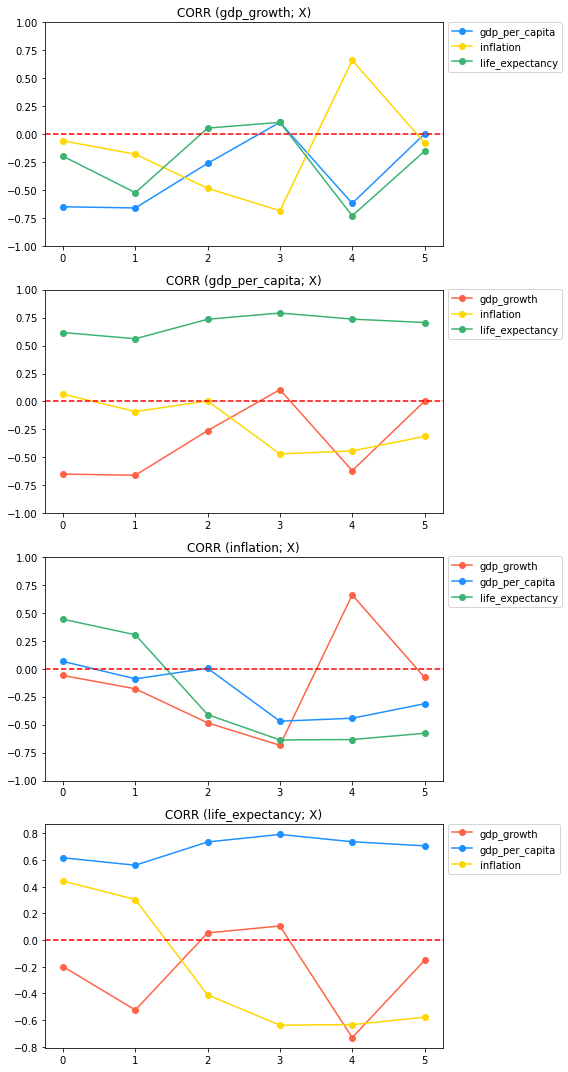

In [41]:
# Evolução da correlação de uma variável com outra X ao longo das décadas
fig,ax = plt.subplots(4,1, figsize=(8,15), tight_layout=True)

# Crescimento do PIB (%)
ax[0].set_title('CORR (gdp_growth; X)')
ax[0].plot(evolucao_td_gg.gdp_per_capita, label='gdp_per_capita', marker='o', color='dodgerblue')
ax[0].plot(evolucao_td_gg.inflation, label='inflation', marker='o', color='gold')
ax[0].plot(evolucao_td_gg.life_expectancy, label='life_expectancy', marker='o', color='mediumseagreen')
ax[0].axhline(0, color='r', linestyle='--')
ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.89))
ax[0].set_ylim([-1,1])

# Renda per capita (US$)
ax[1].set_title('CORR (gdp_per_capita; X)')
ax[1].plot(evolucao_td_gpc.gdp_growth, label='gdp_growth', marker='o', color='tomato')
ax[1].plot(evolucao_td_gpc.inflation, label='inflation', marker='o', color='gold')
ax[1].plot(evolucao_td_gpc.life_expectancy, label='life_expectancy', marker='o', color='mediumseagreen')
ax[1].axhline(0, color='r', linestyle='--')
ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.89))
ax[1].set_ylim([-1,1])

# Taxa de inflação (%)
ax[2].set_title('CORR (inflation; X)')
ax[2].plot(evolucao_td_i.gdp_growth, label='gdp_growth', marker='o', color='tomato')
ax[2].plot(evolucao_td_i.gdp_per_capita, label='gdp_per_capita', marker='o', color='dodgerblue')
ax[2].plot(evolucao_td_i.life_expectancy, label='life_expectancy', marker='o', color='mediumseagreen')
ax[2].axhline(0, color='r', linestyle='--')
ax[2].legend(loc='center left', bbox_to_anchor=(1, 0.89))
ax[2].set_ylim([-1,1])

# Expectativa de vida (anos)
ax[3].set_title('CORR (life_expectancy; X)')
ax[3].plot(evolucao_td_le.gdp_growth, label='gdp_growth', marker='o', color='tomato')
ax[3].plot(evolucao_td_le.gdp_per_capita, label='gdp_per_capita', marker='o', color='dodgerblue')
ax[3].plot(evolucao_td_le.inflation, label='inflation', marker='o', color='gold')
ax[3].axhline(0, color='r', linestyle='--')
ax[3].legend(loc='center left', bbox_to_anchor=(1, 0.89))

plt.show()

#### **2.4.2. Oeste vs. Leste**

In [98]:
# Criando dataframes para diferentes períodos de tempo - OESTE
anos_60_w = df_west[df_west.year >= 1960][df_west[df_west.year >= 1960].year <=1969]
anos_70_w = df_west[df_west.year >= 1970][df_west[df_west.year >= 1970].year <=1979]
anos_80_w = df_west[df_west.year >= 1980][df_west[df_west.year >= 1980].year <=1989]
anos_90_w = df_west[df_west.year >= 1990][df_west[df_west.year >= 1990].year <=1999]
anos_00_w = df_west[df_west.year >= 2000][df_west[df_west.year >= 2000].year <=2009]
anos_10_w = df_west[df_west.year >= 2010][df_west[df_west.year >= 2010].year <=2019]
anos_20_w = df_west[df_west.year >= 2020][df_west[df_west.year >= 2020].year <=2029]
cold_war_w = df_west[df_west.year >= 1960][df_west[df_west.year >= 1960].year <=1989]
pax_amer_w = df_west[df_west.year >= 1990][df_west[df_west.year >= 1990].year <=2019]

In [99]:
# Criando dataframes para diferentes períodos de tempo - LESTE
anos_60_e = df_east[df_east.year >= 1960][df_east[df_east.year >= 1960].year <=1969]
anos_70_e = df_east[df_east.year >= 1970][df_east[df_east.year >= 1970].year <=1979]
anos_80_e = df_east[df_east.year >= 1980][df_east[df_east.year >= 1980].year <=1989]
anos_90_e = df_east[df_east.year >= 1990][df_east[df_east.year >= 1990].year <=1999]
anos_00_e = df_east[df_east.year >= 2000][df_east[df_east.year >= 2000].year <=2009]
anos_10_e = df_east[df_east.year >= 2010][df_east[df_east.year >= 2010].year <=2019]
anos_20_e = df_east[df_east.year >= 2020][df_east[df_east.year >= 2020].year <=2029]
cold_war_e = df_east[df_east.year >= 1960][df_east[df_east.year >= 1960].year <=1989]
pax_amer_e = df_east[df_east.year >= 1990][df_east[df_east.year >= 1990].year <=2019]

In [100]:
# Tabela dinâmica para AGREGAR POR PAÍS DO OESTE
tab_din_all_w = pd.pivot_table(df_west, values='value', index='country', columns='indicator', aggfunc='mean')

# Tabela dinâmica por década
tab_din_60_w = pd.pivot_table(anos_60_w, values='value', index='country', columns='indicator', aggfunc='mean')
tab_din_70_w = pd.pivot_table(anos_70_w, values='value', index='country', columns='indicator', aggfunc='mean')
tab_din_80_w = pd.pivot_table(anos_80_w, values='value', index='country', columns='indicator', aggfunc='mean')
tab_din_90_w = pd.pivot_table(anos_90_w, values='value', index='country', columns='indicator', aggfunc='mean')
tab_din_00_w = pd.pivot_table(anos_00_w, values='value', index='country', columns='indicator', aggfunc='mean')
tab_din_10_w = pd.pivot_table(anos_10_w, values='value', index='country', columns='indicator', aggfunc='mean')
tab_din_20_w = pd.pivot_table(anos_20_w, values='value', index='country', columns='indicator', aggfunc='mean')

# Tabela dinâmica por macroperíodo
tab_din_cold_war_w = pd.pivot_table(cold_war_w, values='value', index='country', columns='indicator', aggfunc='mean')
tab_din_pax_amer_w = pd.pivot_table(pax_amer_w, values='value', index='country', columns='indicator', aggfunc='mean')

In [101]:
# Tabela dinâmica para AGREGAR POR PAÍS DO LESTE
tab_din_all_e = pd.pivot_table(df_east, values='value', index='country', columns='indicator', aggfunc='mean')

# Tabela dinâmica por década
tab_din_60_e = pd.pivot_table(anos_60_e, values='value', index='country', columns='indicator', aggfunc='mean')
tab_din_70_e = pd.pivot_table(anos_70_e, values='value', index='country', columns='indicator', aggfunc='mean')
tab_din_80_e = pd.pivot_table(anos_80_e, values='value', index='country', columns='indicator', aggfunc='mean')
tab_din_90_e = pd.pivot_table(anos_90_e, values='value', index='country', columns='indicator', aggfunc='mean')
tab_din_00_e = pd.pivot_table(anos_00_e, values='value', index='country', columns='indicator', aggfunc='mean')
tab_din_10_e = pd.pivot_table(anos_10_e, values='value', index='country', columns='indicator', aggfunc='mean')
tab_din_20_e = pd.pivot_table(anos_20_e, values='value', index='country', columns='indicator', aggfunc='mean')

# Tabela dinâmica por macroperíodo
tab_din_cold_war_e = pd.pivot_table(cold_war_e, values='value', index='country', columns='indicator', aggfunc='mean')
tab_din_pax_amer_e = pd.pivot_table(pax_amer_e, values='value', index='country', columns='indicator', aggfunc='mean')

#### **Heatmaps**

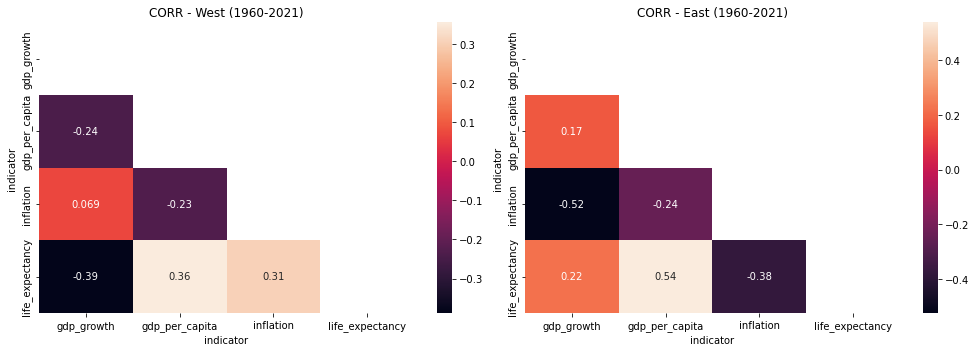

In [107]:
# Correlation map (all data)
fig,(ax1,ax2) = plt.subplots(1,2, figsize=(14,5), tight_layout=True)

ax1.set_title('CORR - West (1960-2021)')
mask1 = np.triu(np.ones_like(tab_din_all_w.corr()))
dataplot1 = sns.heatmap(tab_din_all_w.corr(), annot=True, mask=mask, ax=ax1)

ax2.set_title('CORR - East (1960-2021)')
mask2 = np.triu(np.ones_like(tab_din_all_e.corr()))
dataplot2 = sns.heatmap(tab_din_all_e.corr(), annot=True, mask=mask, ax=ax2)

plt.show() 

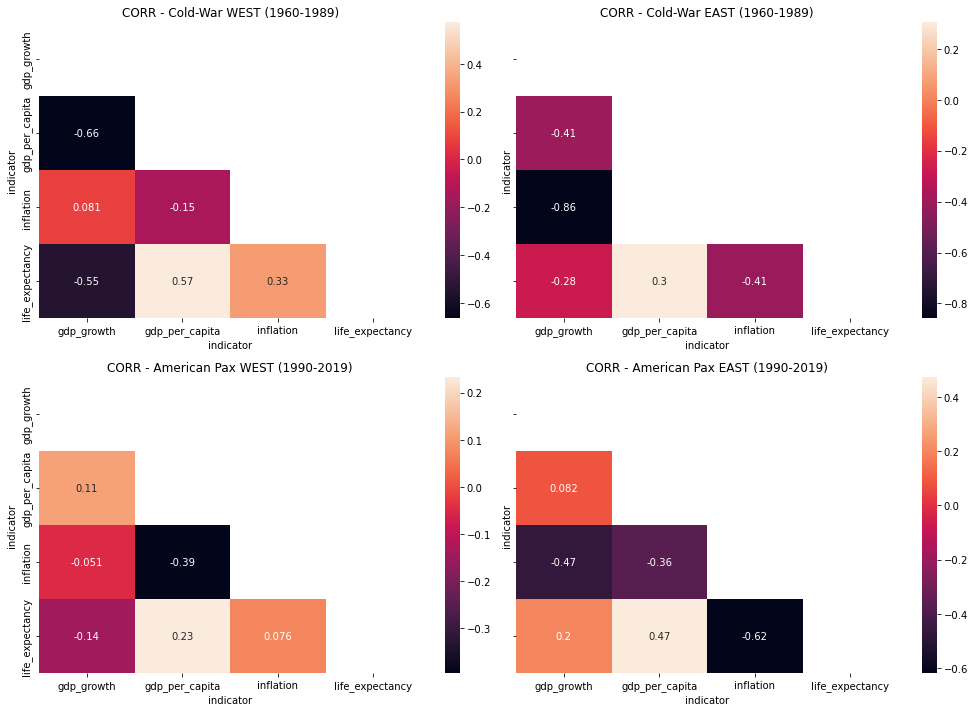

In [117]:
# Correlation map (macroperíodos)
f,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, sharey=True, figsize=(14,10), tight_layout=True)

ax1.set_title('CORR - Cold-War WEST (1960-1989)')
mask1 = np.triu(np.ones_like(tab_din_cold_war_w.corr()))
dataplot1 = sns.heatmap(tab_din_cold_war_w.corr(), annot=True, mask=mask1, ax=ax1)

ax2.set_title('CORR - Cold-War EAST (1960-1989)')
mask2 = np.triu(np.ones_like(tab_din_cold_war_e.corr()))
dataplot2 = sns.heatmap(tab_din_cold_war_e.corr(), annot=True, mask=mask2, ax=ax2)

ax3.set_title('CORR - American Pax WEST (1990-2019)')
mask3 = np.triu(np.ones_like(tab_din_pax_amer_w.corr()))
dataplot3 = sns.heatmap(tab_din_pax_amer_w.corr(), annot=True, mask=mask3, ax=ax3)

ax4.set_title('CORR - American Pax EAST (1990-2019)')
mask4 = np.triu(np.ones_like(tab_din_pax_amer_e.corr()))
dataplot4 = sns.heatmap(tab_din_pax_amer_e.corr(), annot=True, mask=mask4, ax=ax4)

plt.show()

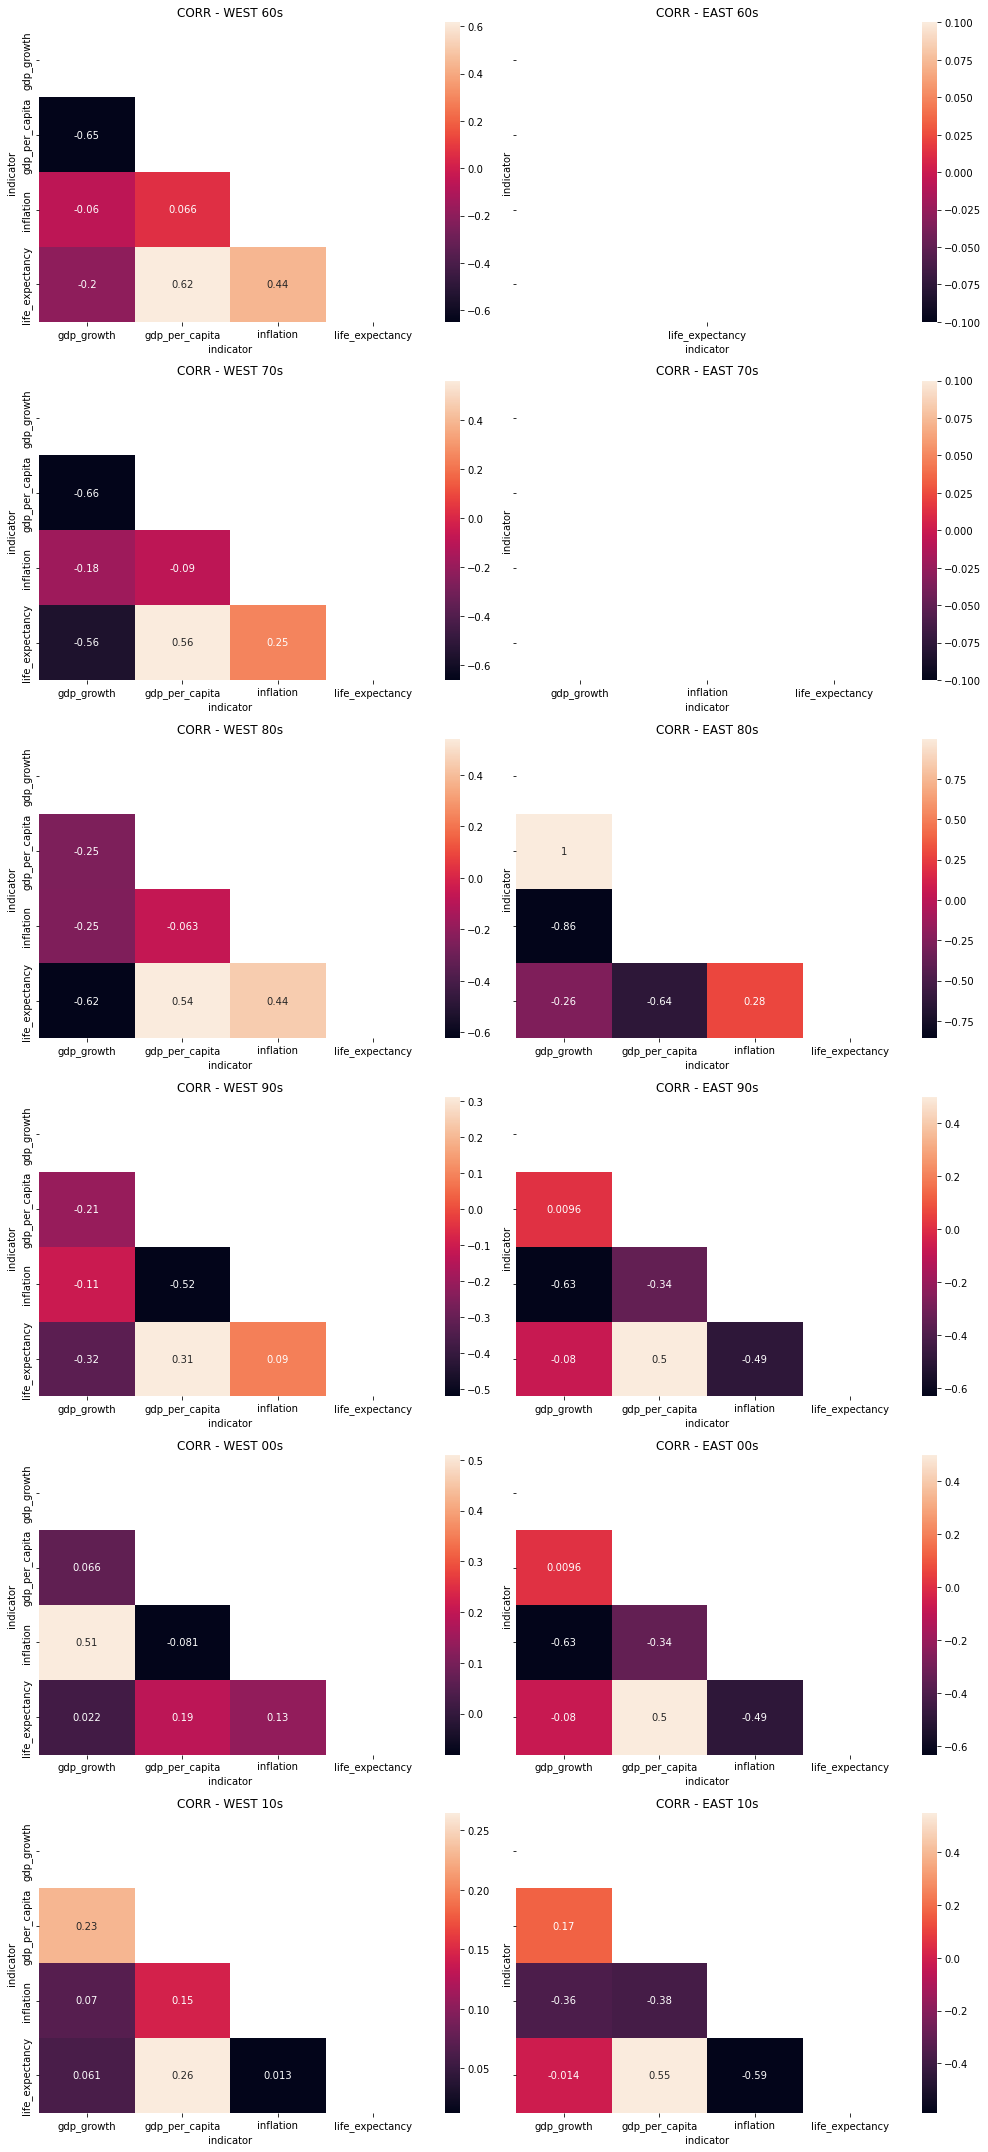

In [123]:
# Correlation map (décadas)
f,((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8),(ax9,ax10),(ax11,ax12)) = plt.subplots(6,2, sharey=True, figsize=(14,30), tight_layout=True)

ax1.set_title('CORR - WEST 60s')
mask1 = np.triu(np.ones_like(tab_din_60_w.corr()))
dataplot1 = sns.heatmap(tab_din_60_w.corr(), annot=True, mask=mask1, ax=ax1)

ax2.set_title('CORR - EAST 60s')
mask2 = np.triu(np.ones_like(tab_din_60_e.corr()))
dataplot2 = sns.heatmap(tab_din_60_e.corr(), annot=True, mask=mask2, ax=ax2)

ax3.set_title('CORR - WEST 70s')
mask3 = np.triu(np.ones_like(tab_din_70_w.corr()))
dataplot3 = sns.heatmap(tab_din_70_w.corr(), annot=True, mask=mask3, ax=ax3)

ax4.set_title('CORR - EAST 70s')
mask4 = np.triu(np.ones_like(tab_din_70_e.corr()))
dataplot4 = sns.heatmap(tab_din_70_e.corr(), annot=True, mask=mask4, ax=ax4)

ax5.set_title('CORR - WEST 80s')
mask5 = np.triu(np.ones_like(tab_din_80_w.corr()))
dataplot5 = sns.heatmap(tab_din_80_w.corr(), annot=True, mask=mask5, ax=ax5)

ax6.set_title('CORR - EAST 80s')
mask6 = np.triu(np.ones_like(tab_din_80_e.corr()))
dataplot6 = sns.heatmap(tab_din_80_e.corr(), annot=True, mask=mask6, ax=ax6)

ax7.set_title('CORR - WEST 90s')
mask7 = np.triu(np.ones_like(tab_din_90_w.corr()))
dataplot7 = sns.heatmap(tab_din_90_w.corr(), annot=True, mask=mask7, ax=ax7)

ax8.set_title('CORR - EAST 90s')
mask8 = np.triu(np.ones_like(tab_din_90_e.corr()))
dataplot8 = sns.heatmap(tab_din_90_e.corr(), annot=True, mask=mask8, ax=ax8)

ax9.set_title('CORR - WEST 00s')
mask9 = np.triu(np.ones_like(tab_din_00_w.corr()))
dataplot9 = sns.heatmap(tab_din_00_w.corr(), annot=True, mask=mask9, ax=ax9)

ax10.set_title('CORR - EAST 00s')
mask10 = np.triu(np.ones_like(tab_din_90_e.corr()))
dataplot10 = sns.heatmap(tab_din_90_e.corr(), annot=True, mask=mask10, ax=ax10)

ax11.set_title('CORR - WEST 10s')
mask11 = np.triu(np.ones_like(tab_din_10_w.corr()))
dataplot11 = sns.heatmap(tab_din_10_w.corr(), annot=True, mask=mask11, ax=ax11)

ax12.set_title('CORR - EAST 10s')
mask12= np.triu(np.ones_like(tab_din_10_e.corr()))
dataplot12 = sns.heatmap(tab_din_10_e.corr(), annot=True, mask=mask12, ax=ax12)

plt.show()

#### **Evolução das correlações**

In [179]:
x = [1960,1970,1980,1990,2000,2010]
x1 = [1970,1980,1990,2000,2010]
x2 = [1980,1990,2000,2010]

In [153]:
# Criando os dataframes OESTE
evolucao_td_gg_w = pd.DataFrame()
evolucao_td_gpc_w = pd.DataFrame()
evolucao_td_i_w = pd.DataFrame()
evolucao_td_le_w = pd.DataFrame()

# Adicionando info por década OESTE
evolucao_td_gg_w = evolucao_td_gg_w.append(tab_din_60_w.corr()[0:1], ignore_index=True).append(tab_din_70_w.corr()[0:1], ignore_index=True).append(tab_din_80_w.corr()[0:1], ignore_index=True).append(tab_din_90_w.corr()[0:1], ignore_index=True).append(tab_din_00_w.corr()[0:1], ignore_index=True).append(tab_din_10_w.corr()[0:1], ignore_index=True).set_index([x])
evolucao_td_gpc_w = evolucao_td_gpc_w.append(tab_din_60_w.corr()[1:2], ignore_index=True).append(tab_din_70_w.corr()[1:2], ignore_index=True).append(tab_din_80_w.corr()[1:2], ignore_index=True).append(tab_din_90_w.corr()[1:2], ignore_index=True).append(tab_din_00_w.corr()[1:2], ignore_index=True).append(tab_din_10_w.corr()[1:2], ignore_index=True).set_index([x])
evolucao_td_i_w = evolucao_td_i_w.append(tab_din_60_w.corr()[2:3], ignore_index=True).append(tab_din_70_w.corr()[2:3], ignore_index=True).append(tab_din_80_w.corr()[2:3], ignore_index=True).append(tab_din_90_w.corr()[2:3], ignore_index=True).append(tab_din_00_w.corr()[2:3], ignore_index=True).append(tab_din_10_w.corr()[2:3], ignore_index=True).set_index([x])
evolucao_td_le_w = evolucao_td_le_w.append(tab_din_60_w.corr()[3:4], ignore_index=True).append(tab_din_70_w.corr()[3:4], ignore_index=True).append(tab_din_80_w.corr()[3:4], ignore_index=True).append(tab_din_90_w.corr()[3:4], ignore_index=True).append(tab_din_00_w.corr()[3:4], ignore_index=True).append(tab_din_10_w.corr()[3:4], ignore_index=True).set_index([x])

In [182]:
# Criando os dataframes LESTE
evolucao_td_gg_e = pd.DataFrame()
evolucao_td_gpc_e = pd.DataFrame()
evolucao_td_i_e = pd.DataFrame()
evolucao_td_le_e = pd.DataFrame()

# Adicionando info por década LESTE
evolucao_td_gg_e = evolucao_td_gg_e.append(tab_din_60_e.corr()[0:1], ignore_index=True).append(tab_din_70_e.corr()[0:1], ignore_index=True).append(tab_din_80_e.corr()[0:1], ignore_index=True).append(tab_din_90_e.corr()[0:1], ignore_index=True).append(tab_din_00_e.corr()[0:1], ignore_index=True).append(tab_din_10_e.corr()[0:1], ignore_index=True).set_index([x])
evolucao_td_gpc_e = evolucao_td_gpc_e.append(tab_din_60_e.corr()[1:2], ignore_index=True).append(tab_din_70_e.corr()[1:2], ignore_index=True).append(tab_din_80_e.corr()[1:2], ignore_index=True).append(tab_din_90_e.corr()[1:2], ignore_index=True).append(tab_din_00_e.corr()[1:2], ignore_index=True).append(tab_din_10_e.corr()[1:2], ignore_index=True).set_index([x1])
evolucao_td_i_e = evolucao_td_i_e.append(tab_din_60_e.corr()[2:3], ignore_index=True).append(tab_din_70_e.corr()[2:3], ignore_index=True).append(tab_din_80_e.corr()[2:3], ignore_index=True).append(tab_din_90_e.corr()[2:3], ignore_index=True).append(tab_din_00_e.corr()[2:3], ignore_index=True).append(tab_din_10_e.corr()[2:3], ignore_index=True).set_index([x1])
evolucao_td_le_e = evolucao_td_le_e.append(tab_din_60_e.corr()[3:4], ignore_index=True).append(tab_din_70_e.corr()[3:4], ignore_index=True).append(tab_din_80_e.corr()[3:4], ignore_index=True).append(tab_din_90_e.corr()[3:4], ignore_index=True).append(tab_din_00_e.corr()[3:4], ignore_index=True).append(tab_din_10_e.corr()[3:4], ignore_index=True).set_index([x2])

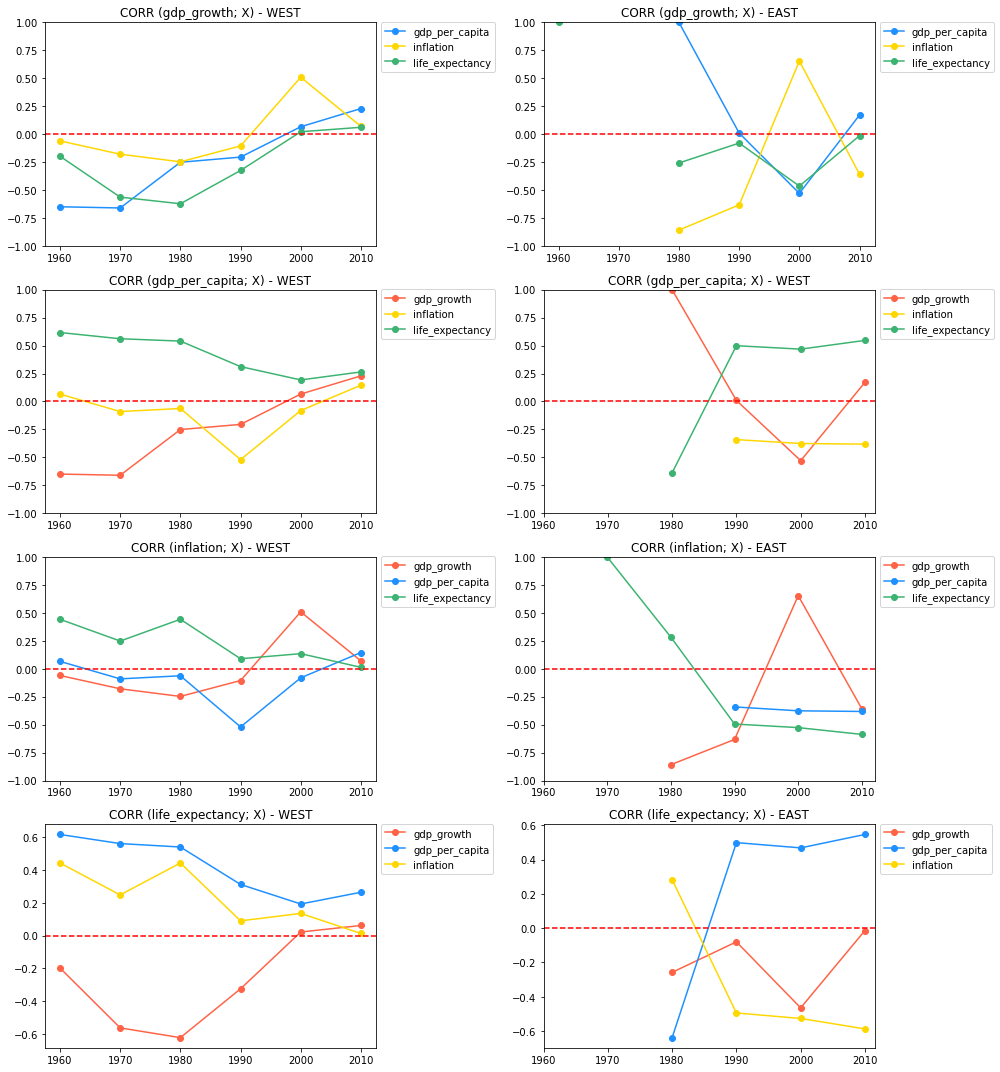

In [187]:
# Evolução da correlação de uma variável com outra X ao longo das décadas
fig,((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8)) = plt.subplots(4,2, figsize=(14,15), tight_layout=True)

# Crescimento do PIB (%)
ax1.set_title('CORR (gdp_growth; X) - WEST')
ax1.plot(evolucao_td_gg_w.gdp_per_capita, label='gdp_per_capita', marker='o', color='dodgerblue')
ax1.plot(evolucao_td_gg_w.inflation, label='inflation', marker='o', color='gold')
ax1.plot(evolucao_td_gg_w.life_expectancy, label='life_expectancy', marker='o', color='mediumseagreen')
ax1.axhline(0, color='r', linestyle='--')
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.89))
ax1.set_ylim([-1,1])
           
# Crescimento do PIB (%)
ax2.set_title('CORR (gdp_growth; X) - EAST')
ax2.plot(evolucao_td_gg_e.gdp_per_capita, label='gdp_per_capita', marker='o', color='dodgerblue')
ax2.plot(evolucao_td_gg_e.inflation, label='inflation', marker='o', color='gold')
ax2.plot(evolucao_td_gg_e.life_expectancy, label='life_expectancy', marker='o', color='mediumseagreen')
ax2.axhline(0, color='r', linestyle='--')
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.89))
ax2.set_ylim([-1,1])

# Renda per capita (US$)
ax3.set_title('CORR (gdp_per_capita; X) - WEST')
ax3.plot(evolucao_td_gpc_w.gdp_growth, label='gdp_growth', marker='o', color='tomato')
ax3.plot(evolucao_td_gpc_w.inflation, label='inflation', marker='o', color='gold')
ax3.plot(evolucao_td_gpc_w.life_expectancy, label='life_expectancy', marker='o', color='mediumseagreen')
ax3.axhline(0, color='r', linestyle='--')
ax3.legend(loc='center left', bbox_to_anchor=(1, 0.89))
ax3.set_ylim([-1,1])

# Renda per capita (US$)
ax4.set_title('CORR (gdp_per_capita; X) - WEST')
ax4.plot(evolucao_td_gpc_e.gdp_growth, label='gdp_growth', marker='o', color='tomato')
ax4.plot(evolucao_td_gpc_e.inflation, label='inflation', marker='o', color='gold')
ax4.plot(evolucao_td_gpc_e.life_expectancy, label='life_expectancy', marker='o', color='mediumseagreen')
ax4.axhline(0, color='r', linestyle='--')
ax4.legend(loc='center left', bbox_to_anchor=(1, 0.89))
ax4.set_ylim([-1,1])
ax4.set_xticks(x)

# Taxa de inflação (%)
ax5.set_title('CORR (inflation; X) - WEST')
ax5.plot(evolucao_td_i_w.gdp_growth, label='gdp_growth', marker='o', color='tomato')
ax5.plot(evolucao_td_i_w.gdp_per_capita, label='gdp_per_capita', marker='o', color='dodgerblue')
ax5.plot(evolucao_td_i_w.life_expectancy, label='life_expectancy', marker='o', color='mediumseagreen')
ax5.axhline(0, color='r', linestyle='--')
ax5.legend(loc='center left', bbox_to_anchor=(1, 0.89))
ax5.set_ylim([-1,1])

# Taxa de inflação (%)
ax6.set_title('CORR (inflation; X) - EAST')
ax6.plot(evolucao_td_i_e.gdp_growth, label='gdp_growth', marker='o', color='tomato')
ax6.plot(evolucao_td_i_e.gdp_per_capita, label='gdp_per_capita', marker='o', color='dodgerblue')
ax6.plot(evolucao_td_i_e.life_expectancy, label='life_expectancy', marker='o', color='mediumseagreen')
ax6.axhline(0, color='r', linestyle='--')
ax6.legend(loc='center left', bbox_to_anchor=(1, 0.89))
ax6.set_ylim([-1,1])
ax6.set_xticks(x)

# Expectativa de vida (anos)
ax7.set_title('CORR (life_expectancy; X) - WEST')
ax7.plot(evolucao_td_le_w.gdp_growth, label='gdp_growth', marker='o', color='tomato')
ax7.plot(evolucao_td_le_w.gdp_per_capita, label='gdp_per_capita', marker='o', color='dodgerblue')
ax7.plot(evolucao_td_le_w.inflation, label='inflation', marker='o', color='gold')
ax7.axhline(0, color='r', linestyle='--')
ax7.legend(loc='center left', bbox_to_anchor=(1, 0.89))

# Expectativa de vida (anos)
ax8.set_title('CORR (life_expectancy; X) - EAST')
ax8.plot(evolucao_td_le_e.gdp_growth, label='gdp_growth', marker='o', color='tomato')
ax8.plot(evolucao_td_le_e.gdp_per_capita, label='gdp_per_capita', marker='o', color='dodgerblue')
ax8.plot(evolucao_td_le_e.inflation, label='inflation', marker='o', color='gold')
ax8.axhline(0, color='r', linestyle='--')
ax8.legend(loc='center left', bbox_to_anchor=(1, 0.89))
ax8.set_xticks(x)

plt.show()

### 2.5. Distribuições

#### **2.5.1. Todos os países**

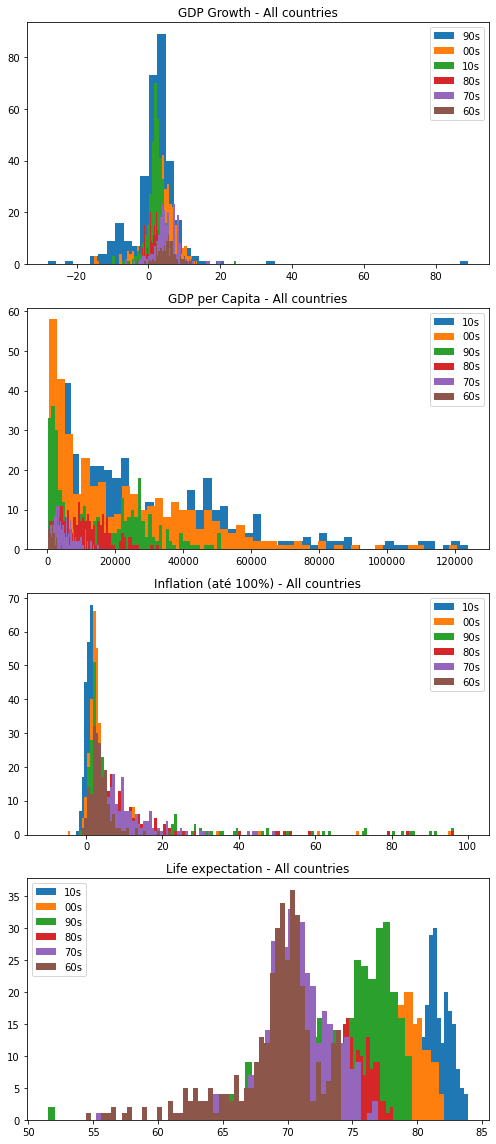

In [226]:
f,((ax1,ax2,ax3,ax4)) = plt.subplots(4,1, figsize=(7,16), tight_layout=True)

ax1.set_title('GDP Growth - All countries')
ax1.hist(anos_90[anos_90.indicator=='gdp_growth'].value, bins=50, label='90s')
ax1.hist(anos_00[anos_00.indicator=='gdp_growth'].value, bins=50, label='00s')
ax1.hist(anos_10[anos_10.indicator=='gdp_growth'].value, bins=50, label='10s')
ax1.hist(anos_80[anos_80.indicator=='gdp_growth'].value, bins=50, label='80s')
ax1.hist(anos_70[anos_70.indicator=='gdp_growth'].value, bins=50, label='70s')
ax1.hist(anos_60[anos_60.indicator=='gdp_growth'].value, bins=50, label='60s')
ax1.legend()

ax2.set_title('GDP per Capita - All countries')
ax2.hist(anos_10[anos_10.indicator=='gdp_per_capita'].value, bins=50, label='10s')
ax2.hist(anos_00[anos_00.indicator=='gdp_per_capita'].value, bins=50, label='00s')
ax2.hist(anos_90[anos_90.indicator=='gdp_per_capita'].value, bins=50, label='90s')
ax2.hist(anos_80[anos_80.indicator=='gdp_per_capita'].value, bins=50, label='80s')
ax2.hist(anos_70[anos_70.indicator=='gdp_per_capita'].value, bins=50, label='70s')
ax2.hist(anos_60[anos_60.indicator=='gdp_per_capita'].value, bins=50, label='60s')
ax2.legend()

ax3.set_title('Inflation (até 100%) - All countries')
ax3.hist(anos_10[anos_10.indicator=='inflation'].value, bins=150, label='10s', range=(-10,100))
ax3.hist(anos_00[anos_00.indicator=='inflation'].value, bins=150, label='00s', range=(-10,100))
ax3.hist(anos_90[anos_90.indicator=='inflation'].value, bins=150, label='90s', range=(-10,100))
ax3.hist(anos_80[anos_80.indicator=='inflation'].value, bins=150, label='80s', range=(-10,100))
ax3.hist(anos_70[anos_70.indicator=='inflation'].value, bins=150, label='70s', range=(-10,100))
ax3.hist(anos_60[anos_60.indicator=='inflation'].value, bins=150, label='60s', range=(-10,100))
ax3.legend()

ax4.set_title('Life expectation - All countries')
ax4.hist(anos_10[anos_10.indicator=='life_expectancy'].value, bins=50, label='10s')
ax4.hist(anos_00[anos_00.indicator=='life_expectancy'].value, bins=50, label='00s')
ax4.hist(anos_90[anos_90.indicator=='life_expectancy'].value, bins=50, label='90s')
ax4.hist(anos_80[anos_80.indicator=='life_expectancy'].value, bins=50, label='80s')
ax4.hist(anos_70[anos_70.indicator=='life_expectancy'].value, bins=50, label='70s')
ax4.hist(anos_60[anos_60.indicator=='life_expectancy'].value, bins=50, label='60s')
ax4.legend()

plt.show()

In [290]:
from scipy.stats import norm

# GDP Growth - All countries
x_60 = np.linspace(-5.47, 13.20, num=len(anos_60_w))
x_70 = np.linspace(min(anos_70_w[anos_70_w.indicator=='gdp_growth'].value), max(anos_70_w[anos_70_w.indicator=='gdp_growth'].value), num=len(anos_70_w))
x_80 = np.linspace(min(anos_80_w[anos_80_w.indicator=='gdp_growth'].value), max(anos_80_w[anos_80_w.indicator=='gdp_growth'].value), num=len(anos_80_w))
x_90 = np.linspace(min(anos_90_w[anos_90_w.indicator=='gdp_growth'].value), max(anos_90_w[anos_90_w.indicator=='gdp_growth'].value), num=len(anos_90_w))
x_00 = np.linspace(min(anos_00_w[anos_00_w.indicator=='gdp_growth'].value), max(anos_00_w[anos_00_w.indicator=='gdp_growth'].value), num=len(anos_00_w))
x_10 = np.linspace(min(anos_10_w[anos_10_w.indicator=='gdp_growth'].value), max(anos_10_w[anos_10_w.indicator=='gdp_growth'].value), num=len(anos_10_w))
y_60 = norm.pdf(x_60_w, anos_60_w[anos_60_w.indicator=='gdp_growth'].value.mean(), anos_60_w[anos_60_w.indicator=='gdp_growth'].value.std())
y_70 = norm.pdf(x_70_w, anos_70_w[anos_70_w.indicator=='gdp_growth'].value.mean(), anos_70_w[anos_70_w.indicator=='gdp_growth'].value.std())
y_80 = norm.pdf(x_80_w, anos_80_w[anos_80_w.indicator=='gdp_growth'].value.mean(), anos_80_w[anos_80_w.indicator=='gdp_growth'].value.std())
y_90 = norm.pdf(x_90_w, anos_90_w[anos_90_w.indicator=='gdp_growth'].value.mean(), anos_90_w[anos_90_w.indicator=='gdp_growth'].value.std())
y_00 = norm.pdf(x_00_w, anos_00_w[anos_00_w.indicator=='gdp_growth'].value.mean(), anos_00_w[anos_00_w.indicator=='gdp_growth'].value.std())
y_10 = norm.pdf(x_10_w, anos_10_w[anos_10_w.indicator=='gdp_growth'].value.mean(), anos_10_w[anos_10_w.indicator=='gdp_growth'].value.std())

# GDP per Capita - All countries
x_60_gcp = np.linspace(min(anos_60_w[anos_60_w.indicator=='gdp_per_capita'].value), max(anos_60_w[anos_60_w.indicator=='gdp_per_capita'].value), num=len(anos_70_w))
x_70_gcp = np.linspace(min(anos_70_w[anos_70_w.indicator=='gdp_per_capita'].value), max(anos_70_w[anos_70_w.indicator=='gdp_per_capita'].value), num=len(anos_70_w))
x_80_gcp = np.linspace(min(anos_80_w[anos_80_w.indicator=='gdp_per_capita'].value), max(anos_80_w[anos_80_w.indicator=='gdp_per_capita'].value), num=len(anos_80_w))
x_90_gcp = np.linspace(min(anos_90_w[anos_90_w.indicator=='gdp_per_capita'].value), max(anos_90_w[anos_90_w.indicator=='gdp_per_capita'].value), num=len(anos_90_w))
x_00_gcp = np.linspace(min(anos_00_w[anos_00_w.indicator=='gdp_per_capita'].value), max(anos_00_w[anos_00_w.indicator=='gdp_per_capita'].value), num=len(anos_00_w))
x_10_gcp = np.linspace(min(anos_10_w[anos_10_w.indicator=='gdp_per_capita'].value), max(anos_10_w[anos_10_w.indicator=='gdp_per_capita'].value), num=len(anos_10_w))
y_60_gcp = norm.pdf(x_60_gcp_w, anos_60_w[anos_60_w.indicator=='gdp_per_capita'].value.mean(), anos_60_w[anos_60_w.indicator=='gdp_per_capita'].value.std())
y_70_gcp = norm.pdf(x_70_gcp_w, anos_70_w[anos_70_w.indicator=='gdp_per_capita'].value.mean(), anos_70_w[anos_70_w.indicator=='gdp_per_capita'].value.std())
y_80_gcp = norm.pdf(x_80_gcp_w, anos_80_w[anos_80_w.indicator=='gdp_per_capita'].value.mean(), anos_80_w[anos_80_w.indicator=='gdp_per_capita'].value.std())
y_90_gcp = norm.pdf(x_90_gcp_w, anos_90_w[anos_90_w.indicator=='gdp_per_capita'].value.mean(), anos_90_w[anos_90_w.indicator=='gdp_per_capita'].value.std())
y_00_gcp = norm.pdf(x_00_gcp_w, anos_00_w[anos_00_w.indicator=='gdp_per_capita'].value.mean(), anos_00_w[anos_00_w.indicator=='gdp_per_capita'].value.std())
y_10_gcp = norm.pdf(x_10_gcp_w, anos_10_w[anos_10_w.indicator=='gdp_per_capita'].value.mean(), anos_10_w[anos_10_w.indicator=='gdp_per_capita'].value.std())

# Inflation - All countries
x_60_i = np.linspace(min(anos_60_w[anos_60_w.indicator=='inflation'].value), max(anos_60_w[anos_60_w.indicator=='inflation'].value), num=len(anos_70_w))
x_70_i = np.linspace(min(anos_70_w[anos_70_w.indicator=='inflation'].value), max(anos_70_w[anos_70_w.indicator=='inflation'].value), num=len(anos_70_w))
x_80_i = np.linspace(min(anos_80_w[anos_80_w.indicator=='inflation'].value), max(anos_80_w[anos_80_w.indicator=='inflation'].value), num=len(anos_80_w))
x_90_i = np.linspace(min(anos_90_w[anos_90_w.indicator=='inflation'].value), max(anos_90_w[anos_90_w.indicator=='inflation'].value), num=len(anos_90_w))
x_00_i = np.linspace(min(anos_00_w[anos_00_w.indicator=='inflation'].value), max(anos_00_w[anos_00_w.indicator=='inflation'].value), num=len(anos_00_w))
x_10_i = np.linspace(min(anos_10_w[anos_10_w.indicator=='inflation'].value), max(anos_10_w[anos_10_w.indicator=='inflation'].value), num=len(anos_10_w))
y_60_i = norm.pdf(x_60_i_w, anos_60_w[anos_60_w.indicator=='inflation'].value.mean(), anos_60_w[anos_60_w.indicator=='inflation'].value.std())
y_70_i = norm.pdf(x_70_i_w, anos_70_w[anos_70_w.indicator=='inflation'].value.mean(), anos_70_w[anos_70_w.indicator=='inflation'].value.std())
y_80_i = norm.pdf(x_80_i_w, anos_80_w[anos_80_w.indicator=='inflation'].value.mean(), anos_80_w[anos_80_w.indicator=='inflation'].value.std())
y_90_i = norm.pdf(x_90_i_w, anos_90_w[anos_90_w.indicator=='inflation'].value.mean(), anos_90_w[anos_90_w.indicator=='inflation'].value.std())
y_00_i = norm.pdf(x_00_i_w, anos_00_w[anos_00_w.indicator=='inflation'].value.mean(), anos_00_w[anos_00_w.indicator=='inflation'].value.std())
y_10_i = norm.pdf(x_10_i_w, anos_10_w[anos_10_w.indicator=='inflation'].value.mean(), anos_10_w[anos_10_w.indicator=='inflation'].value.std())

# Life Expectancy - All countries
x_60_le = np.linspace(min(anos_60_w[anos_60_w.indicator=='life_expectancy'].value), max(anos_60_w[anos_60_w.indicator=='life_expectancy'].value), num=len(anos_70_w))
x_70_le = np.linspace(min(anos_70_w[anos_70_w.indicator=='life_expectancy'].value), max(anos_70_w[anos_70_w.indicator=='life_expectancy'].value), num=len(anos_70_w))
x_80_le = np.linspace(min(anos_80_w[anos_80_w.indicator=='life_expectancy'].value), max(anos_80_w[anos_80_w.indicator=='life_expectancy'].value), num=len(anos_80_w))
x_90_le = np.linspace(min(anos_90_w[anos_90_w.indicator=='life_expectancy'].value), max(anos_90_w[anos_90_w.indicator=='life_expectancy'].value), num=len(anos_90_w))
x_00_le = np.linspace(min(anos_00_w[anos_00_w.indicator=='life_expectancy'].value), max(anos_00_w[anos_00_w.indicator=='life_expectancy'].value), num=len(anos_00_w))
x_10_le = np.linspace(min(anos_10_w[anos_10_w.indicator=='life_expectancy'].value), max(anos_10_w[anos_10_w.indicator=='life_expectancy'].value), num=len(anos_10_w))
y_60_le = norm.pdf(x_60_le_w, anos_60_w[anos_60_w.indicator=='life_expectancy'].value.mean(), anos_60_w[anos_60_w.indicator=='life_expectancy'].value.std())
y_70_le = norm.pdf(x_70_le_w, anos_70_w[anos_70_w.indicator=='life_expectancy'].value.mean(), anos_70_w[anos_70_w.indicator=='life_expectancy'].value.std())
y_80_le = norm.pdf(x_80_le_w, anos_80_w[anos_80_w.indicator=='life_expectancy'].value.mean(), anos_80_w[anos_80_w.indicator=='life_expectancy'].value.std())
y_90_le = norm.pdf(x_90_le_w, anos_90_w[anos_90_w.indicator=='life_expectancy'].value.mean(), anos_90_w[anos_90_w.indicator=='life_expectancy'].value.std())
y_00_le = norm.pdf(x_00_le_w, anos_00_w[anos_00_w.indicator=='life_expectancy'].value.mean(), anos_00_w[anos_00_w.indicator=='life_expectancy'].value.std())
y_10_le = norm.pdf(x_10_le_w, anos_10_w[anos_10_w.indicator=='life_expectancy'].value.mean(), anos_10_w[anos_10_w.indicator=='life_expectancy'].value.std())

In [ ]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(14,8), tight_layout=True)

ax1.set_title('Guassiana GDP Growth - All countries')
ax1.plot(x_60, y_60, color='b', label='60s')
ax1.plot(x_70, y_70, color='c', label='70s')
ax1.plot(x_80, y_80, color='g', label='80s')
ax1.plot(x_90, y_90, color='y', label='90s')
ax1.plot(x_00, y_00, color='orange', label='00s')
ax1.plot(x_10, y_10, color='r', label='10s')
ax1.legend()

ax2.set_title('Guassiana GDP per Capita - All countries')
ax2.plot(x_60_gcp, y_60_gcp, color='b', label='60s')
ax2.plot(x_70_gcp, y_70_gcp, color='c', label='70s')
ax2.plot(x_80_gcp, y_80_gcp, color='g', label='80s')
ax2.plot(x_90_gcp, y_90_gcp, color='y', label='90s')
ax2.plot(x_00_gcp, y_00_gcp, color='orange', label='00s')
ax2.plot(x_10_gcp, y_10_gcp, color='r', label='10s')
ax2.legend()

ax3.set_title('Guassiana Inflation - All countries')
ax3.plot(x_60_i, y_60_i, color='b', label='60s')
ax3.plot(x_70_i, y_70_i, color='c', label='70s')
ax3.plot(x_80_i, y_80_i, color='g', label='80s')
ax3.plot(x_90_i, y_90_i, color='y', label='90s')
ax3.plot(x_00_i, y_00_i, color='orange', label='00s')
ax3.plot(x_10_i, y_10_i, color='r', label='10s')
ax3.legend()

ax4.set_title('Guassiana Inflation - All countries')
ax4.plot(x_60_le, y_60_le, color='b', label='60s')
ax4.plot(x_70_le, y_70_le, color='c', label='70s')
ax4.plot(x_80_le, y_80_le, color='g', label='80s')
ax4.plot(x_90_le, y_90_le, color='y', label='90s')
ax4.plot(x_00_le, y_00_le, color='orange', label='00s')
ax4.plot(x_10_le, y_10_le, color='r', label='10s')
ax4.legend()

plt.show()

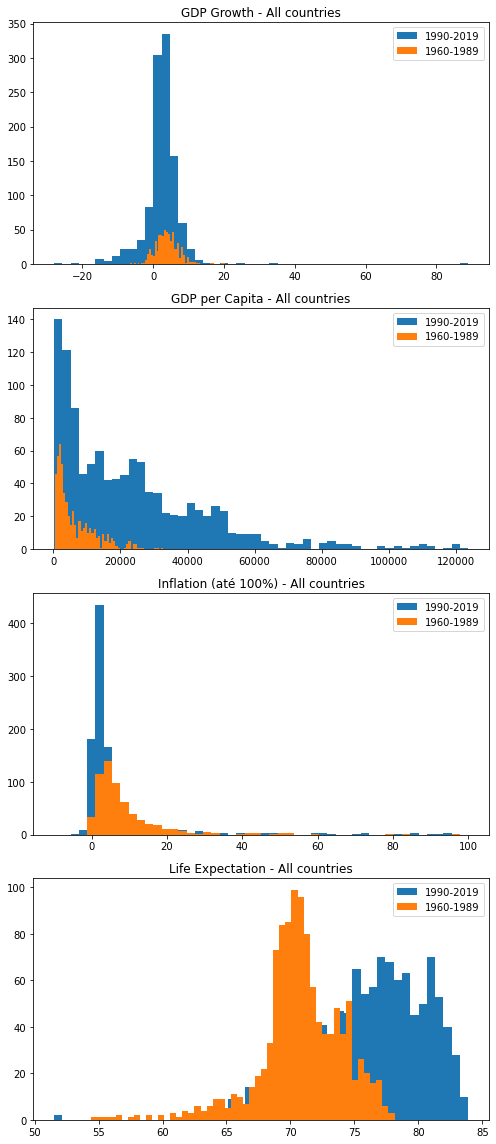

In [229]:
f,(ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(7,16), tight_layout=True)

ax1.set_title('GDP Growth - All countries')
ax1.hist(pax_amer[pax_amer.indicator=='gdp_growth'].value, bins=50, label='1990-2019')
ax1.hist(cold_war[cold_war.indicator=='gdp_growth'].value, bins=50, label='1960-1989')
ax1.legend()

ax2.set_title('GDP per Capita - All countries')
ax2.hist(pax_amer[pax_amer.indicator=='gdp_per_capita'].value, bins=50, label='1990-2019')
ax2.hist(cold_war[cold_war.indicator=='gdp_per_capita'].value, bins=50, label='1960-1989')
ax2.legend()

ax3.set_title('Inflation (até 100%) - All countries')
ax3.hist(pax_amer[pax_amer.indicator=='inflation'].value, bins=50, label='1990-2019', range=(-10,100))
ax3.hist(cold_war[cold_war.indicator=='inflation'].value, bins=50, label='1960-1989', range=(-10,100))
ax3.legend()

ax4.set_title('Life Expectation - All countries')
ax4.hist(pax_amer[pax_amer.indicator=='life_expectancy'].value, bins=50, label='1990-2019')
ax4.hist(cold_war[cold_war.indicator=='life_expectancy'].value, bins=50, label='1960-1989')
ax4.legend()

plt.show()

#### **2.5.2. Oeste vs. Leste**

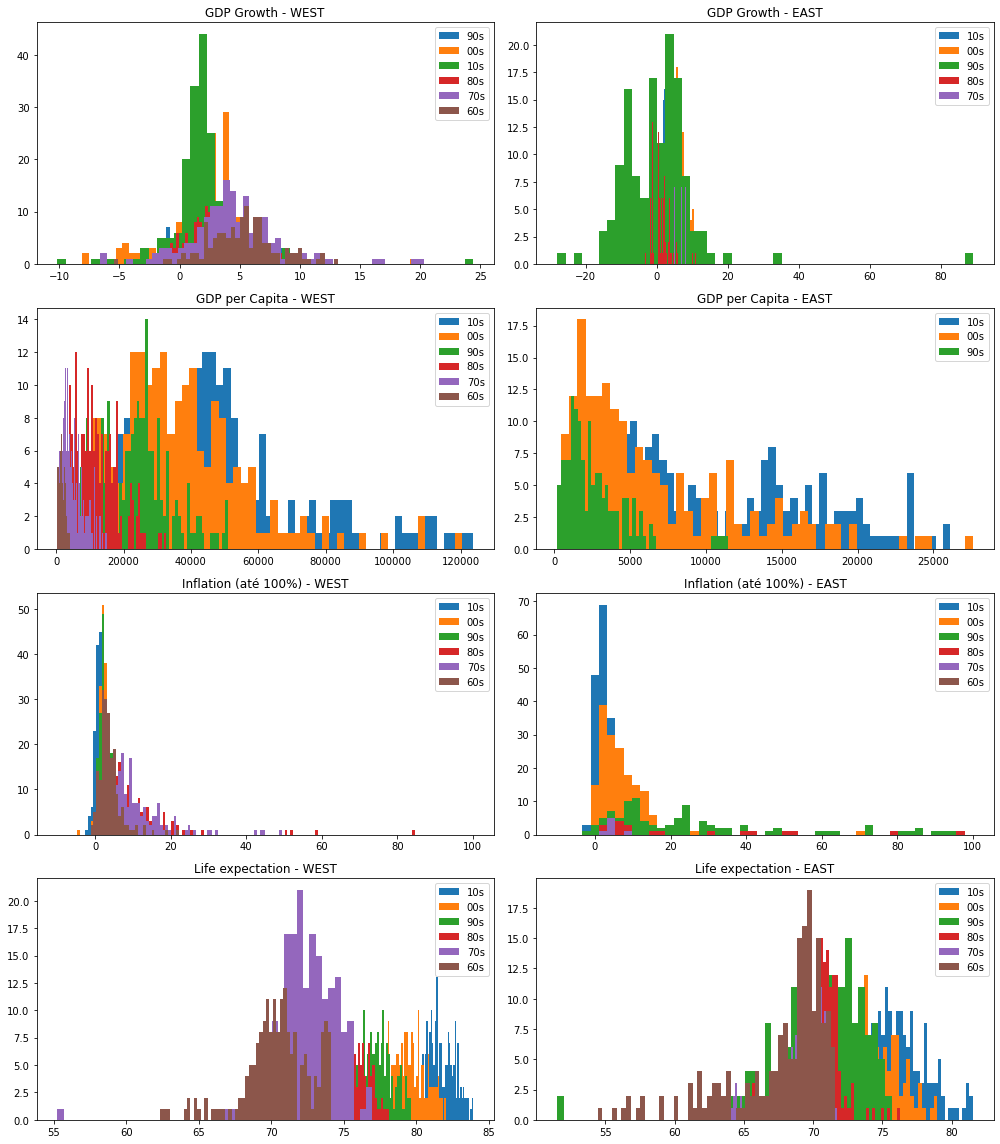

In [236]:
f,((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8)) = plt.subplots(4,2, figsize=(14,16), tight_layout=True)

ax1.set_title('GDP Growth - WEST')
ax1.hist(anos_90_w[anos_90_w.indicator=='gdp_growth'].value, bins=50, label='90s')
ax1.hist(anos_00_w[anos_00_w.indicator=='gdp_growth'].value, bins=50, label='00s')
ax1.hist(anos_10_w[anos_10_w.indicator=='gdp_growth'].value, bins=50, label='10s')
ax1.hist(anos_80_w[anos_80_w.indicator=='gdp_growth'].value, bins=50, label='80s')
ax1.hist(anos_70_w[anos_70_w.indicator=='gdp_growth'].value, bins=50, label='70s')
ax1.hist(anos_60_w[anos_60_w.indicator=='gdp_growth'].value, bins=50, label='60s')
ax1.legend()

ax2.set_title('GDP Growth - EAST')
ax2.hist(anos_10_e[anos_10_e.indicator=='gdp_growth'].value, bins=50, label='10s')
ax2.hist(anos_00_e[anos_00_e.indicator=='gdp_growth'].value, bins=50, label='00s')
ax2.hist(anos_90_e[anos_90_e.indicator=='gdp_growth'].value, bins=50, label='90s')
ax2.hist(anos_80_e[anos_80_e.indicator=='gdp_growth'].value, bins=50, label='80s')
ax2.hist(anos_70_e[anos_70_e.indicator=='gdp_growth'].value, bins=50, label='70s')
#ax2.hist(anos_60_e[anos_60_e.indicator=='gdp_growth'].value, bins=50, label='60s')
ax2.legend()

ax3.set_title('GDP per Capita - WEST')
ax3.hist(anos_10_w[anos_10_w.indicator=='gdp_per_capita'].value, bins=50, label='10s')
ax3.hist(anos_00_w[anos_00_w.indicator=='gdp_per_capita'].value, bins=50, label='00s')
ax3.hist(anos_90_w[anos_90_w.indicator=='gdp_per_capita'].value, bins=50, label='90s')
ax3.hist(anos_80_w[anos_80_w.indicator=='gdp_per_capita'].value, bins=50, label='80s')
ax3.hist(anos_70_w[anos_70_w.indicator=='gdp_per_capita'].value, bins=50, label='70s')
ax3.hist(anos_60_w[anos_60_w.indicator=='gdp_per_capita'].value, bins=50, label='60s')
ax3.legend()

ax4.set_title('GDP per Capita - EAST')
ax4.hist(anos_10_e[anos_10_e.indicator=='gdp_per_capita'].value, bins=50, label='10s')
ax4.hist(anos_00_e[anos_00_e.indicator=='gdp_per_capita'].value, bins=50, label='00s')
ax4.hist(anos_90_e[anos_90_e.indicator=='gdp_per_capita'].value, bins=50, label='90s')
#ax4.hist(anos_80_e[anos_80_e.indicator=='gdp_per_capita'].value, bins=50, label='80s')
#ax4.hist(anos_70_e[anos_70_e.indicator=='gdp_per_capita'].value, bins=50, label='70s')
#ax4.hist(anos_60_e[anos_60_e.indicator=='gdp_per_capita'].value, bins=50, label='60s')
ax4.legend()

ax5.set_title('Inflation (até 100%) - WEST')
ax5.hist(anos_10_w[anos_10_w.indicator=='inflation'].value, bins=150, label='10s', range=(-10,100))
ax5.hist(anos_00_w[anos_00_w.indicator=='inflation'].value, bins=150, label='00s', range=(-10,100))
ax5.hist(anos_90_w[anos_90_w.indicator=='inflation'].value, bins=150, label='90s', range=(-10,100))
ax5.hist(anos_80_w[anos_80_w.indicator=='inflation'].value, bins=150, label='80s', range=(-10,100))
ax5.hist(anos_70_w[anos_70_w.indicator=='inflation'].value, bins=150, label='70s', range=(-10,100))
ax5.hist(anos_60_w[anos_60_w.indicator=='inflation'].value, bins=150, label='60s', range=(-10,100))
ax5.legend()

ax6.set_title('Inflation (até 100%) - EAST')
ax6.hist(anos_10_e[anos_10_e.indicator=='inflation'].value, bins=50, label='10s', range=(-10,100))
ax6.hist(anos_00_e[anos_00_e.indicator=='inflation'].value, bins=50, label='00s', range=(-10,100))
ax6.hist(anos_90_e[anos_90_e.indicator=='inflation'].value, bins=50, label='90s', range=(-10,100))
ax6.hist(anos_80_e[anos_80_e.indicator=='inflation'].value, bins=50, label='80s', range=(-10,100))
ax6.hist(anos_70_e[anos_70_e.indicator=='inflation'].value, bins=50, label='70s', range=(-10,100))
ax6.hist(anos_60_e[anos_60_e.indicator=='inflation'].value, bins=50, label='60s', range=(-10,100))
ax6.legend()

ax7.set_title('Life expectation - WEST')
ax7.hist(anos_10_w[anos_10_w.indicator=='life_expectancy'].value, bins=50, label='10s')
ax7.hist(anos_00_w[anos_00_w.indicator=='life_expectancy'].value, bins=50, label='00s')
ax7.hist(anos_90_w[anos_90_w.indicator=='life_expectancy'].value, bins=50, label='90s')
ax7.hist(anos_80_w[anos_80_w.indicator=='life_expectancy'].value, bins=50, label='80s')
ax7.hist(anos_70_w[anos_70_w.indicator=='life_expectancy'].value, bins=50, label='70s')
ax7.hist(anos_60_w[anos_60_w.indicator=='life_expectancy'].value, bins=50, label='60s')
ax7.legend()

ax8.set_title('Life expectation - EAST')
ax8.hist(anos_10_e[anos_10_e.indicator=='life_expectancy'].value, bins=50, label='10s')
ax8.hist(anos_00_e[anos_00_e.indicator=='life_expectancy'].value, bins=50, label='00s')
ax8.hist(anos_90_e[anos_90_e.indicator=='life_expectancy'].value, bins=50, label='90s')
ax8.hist(anos_80_e[anos_80_e.indicator=='life_expectancy'].value, bins=50, label='80s')
ax8.hist(anos_70_e[anos_70_e.indicator=='life_expectancy'].value, bins=50, label='70s')
ax8.hist(anos_60_e[anos_60_e.indicator=='life_expectancy'].value, bins=50, label='60s')
ax8.legend()

plt.show()

In [285]:
# GDP Growth - WEST
x_60_w = np.linspace(-5.47, 13.20, num=len(anos_60_w))
x_70_w = np.linspace(min(anos_70_w[anos_70_w.indicator=='gdp_growth'].value), max(anos_70_w[anos_70_w.indicator=='gdp_growth'].value), num=len(anos_70_w))
x_80_w = np.linspace(min(anos_80_w[anos_80_w.indicator=='gdp_growth'].value), max(anos_80_w[anos_80_w.indicator=='gdp_growth'].value), num=len(anos_80_w))
x_90_w = np.linspace(min(anos_90_w[anos_90_w.indicator=='gdp_growth'].value), max(anos_90_w[anos_90_w.indicator=='gdp_growth'].value), num=len(anos_90_w))
x_00_w = np.linspace(min(anos_00_w[anos_00_w.indicator=='gdp_growth'].value), max(anos_00_w[anos_00_w.indicator=='gdp_growth'].value), num=len(anos_00_w))
x_10_w = np.linspace(min(anos_10_w[anos_10_w.indicator=='gdp_growth'].value), max(anos_10_w[anos_10_w.indicator=='gdp_growth'].value), num=len(anos_10_w))
y_60_w = norm.pdf(x_60_w, anos_60_w[anos_60_w.indicator=='gdp_growth'].value.mean(), anos_60_w[anos_60_w.indicator=='gdp_growth'].value.std())
y_70_w = norm.pdf(x_70_w, anos_70_w[anos_70_w.indicator=='gdp_growth'].value.mean(), anos_70_w[anos_70_w.indicator=='gdp_growth'].value.std())
y_80_w = norm.pdf(x_80_w, anos_80_w[anos_80_w.indicator=='gdp_growth'].value.mean(), anos_80_w[anos_80_w.indicator=='gdp_growth'].value.std())
y_90_w = norm.pdf(x_90_w, anos_90_w[anos_90_w.indicator=='gdp_growth'].value.mean(), anos_90_w[anos_90_w.indicator=='gdp_growth'].value.std())
y_00_w = norm.pdf(x_00_w, anos_00_w[anos_00_w.indicator=='gdp_growth'].value.mean(), anos_00_w[anos_00_w.indicator=='gdp_growth'].value.std())
y_10_w = norm.pdf(x_10_w, anos_10_w[anos_10_w.indicator=='gdp_growth'].value.mean(), anos_10_w[anos_10_w.indicator=='gdp_growth'].value.std())

# GDP Growth - EAST
x_70_e = np.linspace(min(anos_70_e[anos_70_e.indicator=='gdp_growth'].value), max(anos_70_e[anos_70_e.indicator=='gdp_growth'].value), num=len(anos_70_e))
x_80_e = np.linspace(min(anos_80_e[anos_80_e.indicator=='gdp_growth'].value), max(anos_80_e[anos_80_e.indicator=='gdp_growth'].value), num=len(anos_80_e))
x_90_e = np.linspace(min(anos_90_e[anos_90_e.indicator=='gdp_growth'].value), max(anos_90_e[anos_90_e.indicator=='gdp_growth'].value), num=len(anos_90_e))
x_00_e = np.linspace(min(anos_00_e[anos_00_e.indicator=='gdp_growth'].value), max(anos_00_e[anos_00_e.indicator=='gdp_growth'].value), num=len(anos_00_e))
x_10_e = np.linspace(min(anos_10_e[anos_10_e.indicator=='gdp_growth'].value), max(anos_10_e[anos_10_e.indicator=='gdp_growth'].value), num=len(anos_10_e))
y_70_e = norm.pdf(x_70_e, anos_70_e[anos_70_e.indicator=='gdp_growth'].value.mean(), anos_70_e[anos_70_e.indicator=='gdp_growth'].value.std())
y_80_e = norm.pdf(x_80_e, anos_80_e[anos_80_e.indicator=='gdp_growth'].value.mean(), anos_80_e[anos_80_e.indicator=='gdp_growth'].value.std())
y_90_e = norm.pdf(x_90_e, anos_90_e[anos_90_e.indicator=='gdp_growth'].value.mean(), anos_90_e[anos_90_e.indicator=='gdp_growth'].value.std())
y_00_e = norm.pdf(x_00_e, anos_00_e[anos_00_e.indicator=='gdp_growth'].value.mean(), anos_00_e[anos_00_e.indicator=='gdp_growth'].value.std())
y_10_e = norm.pdf(x_10_e, anos_10_e[anos_10_e.indicator=='gdp_growth'].value.mean(), anos_10_e[anos_10_e.indicator=='gdp_growth'].value.std())

# GDP per Capita - WEST
x_60_gcp_w = np.linspace(min(anos_60_w[anos_60_w.indicator=='gdp_per_capita'].value), max(anos_60_w[anos_60_w.indicator=='gdp_per_capita'].value), num=len(anos_70_w))
x_70_gcp_w = np.linspace(min(anos_70_w[anos_70_w.indicator=='gdp_per_capita'].value), max(anos_70_w[anos_70_w.indicator=='gdp_per_capita'].value), num=len(anos_70_w))
x_80_gcp_w = np.linspace(min(anos_80_w[anos_80_w.indicator=='gdp_per_capita'].value), max(anos_80_w[anos_80_w.indicator=='gdp_per_capita'].value), num=len(anos_80_w))
x_90_gcp_w = np.linspace(min(anos_90_w[anos_90_w.indicator=='gdp_per_capita'].value), max(anos_90_w[anos_90_w.indicator=='gdp_per_capita'].value), num=len(anos_90_w))
x_00_gcp_w = np.linspace(min(anos_00_w[anos_00_w.indicator=='gdp_per_capita'].value), max(anos_00_w[anos_00_w.indicator=='gdp_per_capita'].value), num=len(anos_00_w))
x_10_gcp_w = np.linspace(min(anos_10_w[anos_10_w.indicator=='gdp_per_capita'].value), max(anos_10_w[anos_10_w.indicator=='gdp_per_capita'].value), num=len(anos_10_w))
y_60_gcp_w = norm.pdf(x_60_gcp_w, anos_60_w[anos_60_w.indicator=='gdp_per_capita'].value.mean(), anos_60_w[anos_60_w.indicator=='gdp_per_capita'].value.std())
y_70_gcp_w = norm.pdf(x_70_gcp_w, anos_70_w[anos_70_w.indicator=='gdp_per_capita'].value.mean(), anos_70_w[anos_70_w.indicator=='gdp_per_capita'].value.std())
y_80_gcp_w = norm.pdf(x_80_gcp_w, anos_80_w[anos_80_w.indicator=='gdp_per_capita'].value.mean(), anos_80_w[anos_80_w.indicator=='gdp_per_capita'].value.std())
y_90_gcp_w = norm.pdf(x_90_gcp_w, anos_90_w[anos_90_w.indicator=='gdp_per_capita'].value.mean(), anos_90_w[anos_90_w.indicator=='gdp_per_capita'].value.std())
y_00_gcp_w = norm.pdf(x_00_gcp_w, anos_00_w[anos_00_w.indicator=='gdp_per_capita'].value.mean(), anos_00_w[anos_00_w.indicator=='gdp_per_capita'].value.std())
y_10_gcp_w = norm.pdf(x_10_gcp_w, anos_10_w[anos_10_w.indicator=='gdp_per_capita'].value.mean(), anos_10_w[anos_10_w.indicator=='gdp_per_capita'].value.std())

# GDP per Capita - EAST
x_90_gcp_e = np.linspace(min(anos_90_e[anos_90_e.indicator=='gdp_per_capita'].value), max(anos_90_e[anos_90_e.indicator=='gdp_per_capita'].value), num=len(anos_90_e))
x_00_gcp_e = np.linspace(min(anos_00_e[anos_00_e.indicator=='gdp_per_capita'].value), max(anos_00_e[anos_00_e.indicator=='gdp_per_capita'].value), num=len(anos_00_e))
x_10_gcp_e = np.linspace(min(anos_10_e[anos_10_e.indicator=='gdp_per_capita'].value), max(anos_10_e[anos_10_e.indicator=='gdp_per_capita'].value), num=len(anos_10_e))
y_90_gcp_e = norm.pdf(x_90_gcp_e, anos_90_e[anos_90_e.indicator=='gdp_per_capita'].value.mean(), anos_90_e[anos_90_e.indicator=='gdp_per_capita'].value.std())
y_00_gcp_e = norm.pdf(x_00_gcp_e, anos_00_e[anos_00_e.indicator=='gdp_per_capita'].value.mean(), anos_00_e[anos_00_e.indicator=='gdp_per_capita'].value.std())
y_10_gcp_e = norm.pdf(x_10_gcp_e, anos_10_e[anos_10_e.indicator=='gdp_per_capita'].value.mean(), anos_10_e[anos_10_e.indicator=='gdp_per_capita'].value.std())

# Inflation - WEST
x_60_i_w = np.linspace(min(anos_60_w[anos_60_w.indicator=='inflation'].value), max(anos_60_w[anos_60_w.indicator=='inflation'].value), num=len(anos_70_w))
x_70_i_w = np.linspace(min(anos_70_w[anos_70_w.indicator=='inflation'].value), max(anos_70_w[anos_70_w.indicator=='inflation'].value), num=len(anos_70_w))
x_80_i_w = np.linspace(min(anos_80_w[anos_80_w.indicator=='inflation'].value), max(anos_80_w[anos_80_w.indicator=='inflation'].value), num=len(anos_80_w))
x_90_i_w = np.linspace(min(anos_90_w[anos_90_w.indicator=='inflation'].value), max(anos_90_w[anos_90_w.indicator=='inflation'].value), num=len(anos_90_w))
x_00_i_w = np.linspace(min(anos_00_w[anos_00_w.indicator=='inflation'].value), max(anos_00_w[anos_00_w.indicator=='inflation'].value), num=len(anos_00_w))
x_10_i_w = np.linspace(min(anos_10_w[anos_10_w.indicator=='inflation'].value), max(anos_10_w[anos_10_w.indicator=='inflation'].value), num=len(anos_10_w))
y_60_i_w = norm.pdf(x_60_i_w, anos_60_w[anos_60_w.indicator=='inflation'].value.mean(), anos_60_w[anos_60_w.indicator=='inflation'].value.std())
y_70_i_w = norm.pdf(x_70_i_w, anos_70_w[anos_70_w.indicator=='inflation'].value.mean(), anos_70_w[anos_70_w.indicator=='inflation'].value.std())
y_80_i_w = norm.pdf(x_80_i_w, anos_80_w[anos_80_w.indicator=='inflation'].value.mean(), anos_80_w[anos_80_w.indicator=='inflation'].value.std())
y_90_i_w = norm.pdf(x_90_i_w, anos_90_w[anos_90_w.indicator=='inflation'].value.mean(), anos_90_w[anos_90_w.indicator=='inflation'].value.std())
y_00_i_w = norm.pdf(x_00_i_w, anos_00_w[anos_00_w.indicator=='inflation'].value.mean(), anos_00_w[anos_00_w.indicator=='inflation'].value.std())
y_10_i_w = norm.pdf(x_10_i_w, anos_10_w[anos_10_w.indicator=='inflation'].value.mean(), anos_10_w[anos_10_w.indicator=='inflation'].value.std())

# Inflation - EAST
x_60_i_e = np.linspace(min(anos_60_e[anos_60_e.indicator=='inflation'].value), max(anos_60_e[anos_60_e.indicator=='inflation'].value), num=len(anos_70_e))
x_70_i_e = np.linspace(min(anos_70_e[anos_70_e.indicator=='inflation'].value), max(anos_70_e[anos_70_e.indicator=='inflation'].value), num=len(anos_70_e))
x_80_i_e = np.linspace(min(anos_80_e[anos_80_e.indicator=='inflation'].value), max(anos_80_e[anos_80_e.indicator=='inflation'].value), num=len(anos_80_e))
x_90_i_e = np.linspace(min(anos_90_e[anos_90_e.indicator=='inflation'].value), max(anos_90_e[anos_90_e.indicator=='inflation'].value), num=len(anos_90_e))
x_00_i_e = np.linspace(min(anos_00_e[anos_00_e.indicator=='inflation'].value), max(anos_00_e[anos_00_e.indicator=='inflation'].value), num=len(anos_00_e))
x_10_i_e = np.linspace(min(anos_10_e[anos_10_e.indicator=='inflation'].value), max(anos_10_e[anos_10_e.indicator=='inflation'].value), num=len(anos_10_e))
y_60_i_e = norm.pdf(x_60_i_e, anos_60_e[anos_60_e.indicator=='inflation'].value.mean(), anos_60_e[anos_60_e.indicator=='inflation'].value.std())
y_70_i_e = norm.pdf(x_70_i_e, anos_70_e[anos_70_e.indicator=='inflation'].value.mean(), anos_70_e[anos_70_e.indicator=='inflation'].value.std())
y_80_i_e = norm.pdf(x_80_i_e, anos_80_e[anos_80_e.indicator=='inflation'].value.mean(), anos_80_e[anos_80_e.indicator=='inflation'].value.std())
y_90_i_e = norm.pdf(x_90_i_e, anos_90_e[anos_90_e.indicator=='inflation'].value.mean(), anos_90_e[anos_90_e.indicator=='inflation'].value.std())
y_00_i_e = norm.pdf(x_00_i_e, anos_00_e[anos_00_e.indicator=='inflation'].value.mean(), anos_00_e[anos_00_e.indicator=='inflation'].value.std())
y_10_i_e = norm.pdf(x_10_i_e, anos_10_e[anos_10_e.indicator=='inflation'].value.mean(), anos_10_e[anos_10_e.indicator=='inflation'].value.std())

# Life Expectancy - WEST
x_60_le_w = np.linspace(min(anos_60_w[anos_60_w.indicator=='life_expectancy'].value), max(anos_60_w[anos_60_w.indicator=='life_expectancy'].value), num=len(anos_70_w))
x_70_le_w = np.linspace(min(anos_70_w[anos_70_w.indicator=='life_expectancy'].value), max(anos_70_w[anos_70_w.indicator=='life_expectancy'].value), num=len(anos_70_w))
x_80_le_w = np.linspace(min(anos_80_w[anos_80_w.indicator=='life_expectancy'].value), max(anos_80_w[anos_80_w.indicator=='life_expectancy'].value), num=len(anos_80_w))
x_90_le_w = np.linspace(min(anos_90_w[anos_90_w.indicator=='life_expectancy'].value), max(anos_90_w[anos_90_w.indicator=='life_expectancy'].value), num=len(anos_90_w))
x_00_le_w = np.linspace(min(anos_00_w[anos_00_w.indicator=='life_expectancy'].value), max(anos_00_w[anos_00_w.indicator=='life_expectancy'].value), num=len(anos_00_w))
x_10_le_w = np.linspace(min(anos_10_w[anos_10_w.indicator=='life_expectancy'].value), max(anos_10_w[anos_10_w.indicator=='life_expectancy'].value), num=len(anos_10_w))
y_60_le_w = norm.pdf(x_60_le_w, anos_60_w[anos_60_w.indicator=='life_expectancy'].value.mean(), anos_60_w[anos_60_w.indicator=='life_expectancy'].value.std())
y_70_le_w = norm.pdf(x_70_le_w, anos_70_w[anos_70_w.indicator=='life_expectancy'].value.mean(), anos_70_w[anos_70_w.indicator=='life_expectancy'].value.std())
y_80_le_w = norm.pdf(x_80_le_w, anos_80_w[anos_80_w.indicator=='life_expectancy'].value.mean(), anos_80_w[anos_80_w.indicator=='life_expectancy'].value.std())
y_90_le_w = norm.pdf(x_90_le_w, anos_90_w[anos_90_w.indicator=='life_expectancy'].value.mean(), anos_90_w[anos_90_w.indicator=='life_expectancy'].value.std())
y_00_le_w = norm.pdf(x_00_le_w, anos_00_w[anos_00_w.indicator=='life_expectancy'].value.mean(), anos_00_w[anos_00_w.indicator=='life_expectancy'].value.std())
y_10_le_w = norm.pdf(x_10_le_w, anos_10_w[anos_10_w.indicator=='life_expectancy'].value.mean(), anos_10_w[anos_10_w.indicator=='life_expectancy'].value.std())

# Life Expectancy - EAST
x_60_le_e = np.linspace(min(anos_60_e[anos_60_e.indicator=='life_expectancy'].value), max(anos_60_e[anos_60_e.indicator=='life_expectancy'].value), num=len(anos_70_e))
x_70_le_e = np.linspace(min(anos_70_e[anos_70_e.indicator=='life_expectancy'].value), max(anos_70_e[anos_70_e.indicator=='life_expectancy'].value), num=len(anos_70_e))
x_80_le_e = np.linspace(min(anos_80_e[anos_80_e.indicator=='life_expectancy'].value), max(anos_80_e[anos_80_e.indicator=='life_expectancy'].value), num=len(anos_80_e))
x_90_le_e = np.linspace(min(anos_90_e[anos_90_e.indicator=='life_expectancy'].value), max(anos_90_e[anos_90_e.indicator=='life_expectancy'].value), num=len(anos_90_e))
x_00_le_e = np.linspace(min(anos_00_e[anos_00_e.indicator=='life_expectancy'].value), max(anos_00_e[anos_00_e.indicator=='life_expectancy'].value), num=len(anos_00_e))
x_10_le_e = np.linspace(min(anos_10_e[anos_10_e.indicator=='life_expectancy'].value), max(anos_10_e[anos_10_e.indicator=='life_expectancy'].value), num=len(anos_10_e))
y_60_le_e = norm.pdf(x_60_le_e, anos_60_e[anos_60_e.indicator=='life_expectancy'].value.mean(), anos_60_e[anos_60_e.indicator=='life_expectancy'].value.std())
y_70_le_e = norm.pdf(x_70_le_e, anos_70_e[anos_70_e.indicator=='life_expectancy'].value.mean(), anos_70_e[anos_70_e.indicator=='life_expectancy'].value.std())
y_80_le_e = norm.pdf(x_80_le_e, anos_80_e[anos_80_e.indicator=='life_expectancy'].value.mean(), anos_80_e[anos_80_e.indicator=='life_expectancy'].value.std())
y_90_le_e = norm.pdf(x_90_le_e, anos_90_e[anos_90_e.indicator=='life_expectancy'].value.mean(), anos_90_e[anos_90_e.indicator=='life_expectancy'].value.std())
y_00_le_e = norm.pdf(x_00_le_e, anos_00_e[anos_00_e.indicator=='life_expectancy'].value.mean(), anos_00_e[anos_00_e.indicator=='life_expectancy'].value.std())
y_10_le_e = norm.pdf(x_10_le_e, anos_10_e[anos_10_e.indicator=='life_expectancy'].value.mean(), anos_10_e[anos_10_e.indicator=='life_expectancy'].value.std())

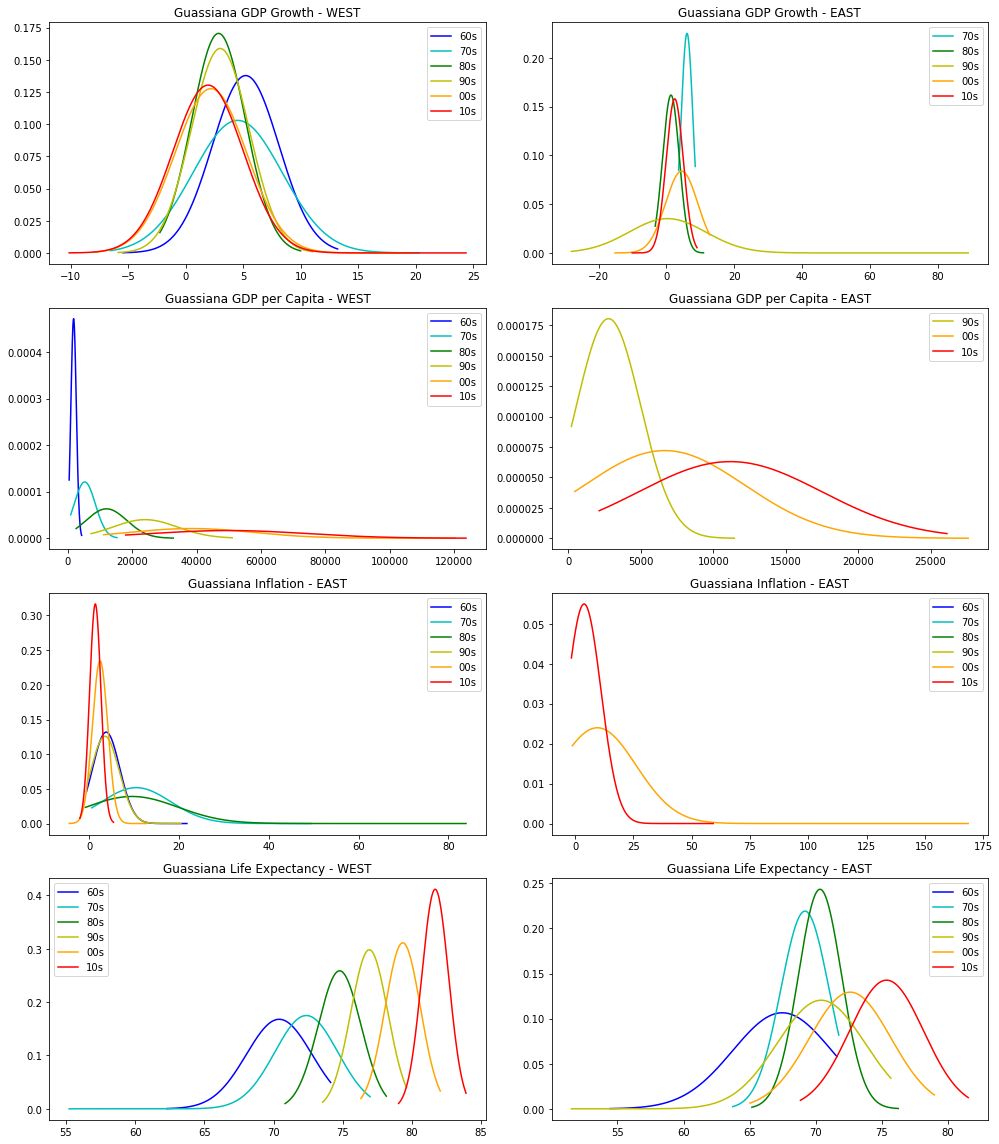

In [289]:
fig,((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8)) = plt.subplots(4,2, figsize=(14,16), tight_layout=True)

ax1.set_title('Guassiana GDP Growth - WEST')
ax1.plot(x_60_w, y_60_w, color='b', label='60s')
ax1.plot(x_70_w, y_70_w, color='c', label='70s')
ax1.plot(x_80_w, y_80_w, color='g', label='80s')
ax1.plot(x_90_w, y_90_w, color='y', label='90s')
ax1.plot(x_00_w, y_00_w, color='orange', label='00s')
ax1.plot(x_10_w, y_10_w, color='r', label='10s')
ax1.legend()

ax2.set_title('Guassiana GDP Growth - EAST')
ax2.plot(x_70_e, y_70_e, color='c', label='70s')
ax2.plot(x_80_e, y_80_e, color='g', label='80s')
ax2.plot(x_90_e, y_90_e, color='y', label='90s')
ax2.plot(x_00_e, y_00_e, color='orange', label='00s')
ax2.plot(x_10_e, y_10_e, color='r', label='10s')
ax2.legend()

ax3.set_title('Guassiana GDP per Capita - WEST')
ax3.plot(x_60_gcp_w, y_60_gcp_w, color='b', label='60s')
ax3.plot(x_70_gcp_w, y_70_gcp_w, color='c', label='70s')
ax3.plot(x_80_gcp_w, y_80_gcp_w, color='g', label='80s')
ax3.plot(x_90_gcp_w, y_90_gcp_w, color='y', label='90s')
ax3.plot(x_00_gcp_w, y_00_gcp_w, color='orange', label='00s')
ax3.plot(x_10_gcp_w, y_10_gcp_w, color='r', label='10s')
ax3.legend()

ax4.set_title('Guassiana GDP per Capita - EAST')
ax4.plot(x_90_gcp_e, y_90_gcp_e, color='y', label='90s')
ax4.plot(x_00_gcp_e, y_00_gcp_e, color='orange', label='00s')
ax4.plot(x_10_gcp_e, y_10_gcp_e, color='r', label='10s')
ax4.legend()

ax5.set_title('Guassiana Inflation - EAST')
ax5.plot(x_60_i_w, y_60_i_w, color='b', label='60s')
ax5.plot(x_70_i_w, y_70_i_w, color='c', label='70s')
ax5.plot(x_80_i_w, y_80_i_w, color='g', label='80s')
ax5.plot(x_90_i_w, y_90_i_w, color='y', label='90s')
ax5.plot(x_00_i_w, y_00_i_w, color='orange', label='00s')
ax5.plot(x_10_i_w, y_10_i_w, color='r', label='10s')
ax5.legend()

ax6.set_title('Guassiana Inflation - EAST')
ax6.plot(x_60_i_e, y_60_i_e, color='b', label='60s')
ax6.plot(x_70_i_e, y_70_i_e, color='c', label='70s')
ax6.plot(x_80_i_e, y_80_i_e, color='g', label='80s')
ax6.plot(x_90_i_e, y_90_i_e, color='y', label='90s')
ax6.plot(x_00_i_e, y_00_i_e, color='orange', label='00s')
ax6.plot(x_10_i_e, y_10_i_e, color='r', label='10s')
ax6.legend()

ax7.set_title('Guassiana Life Expectancy - WEST')
ax7.plot(x_60_le_w, y_60_le_w, color='b', label='60s')
ax7.plot(x_70_le_w, y_70_le_w, color='c', label='70s')
ax7.plot(x_80_le_w, y_80_le_w, color='g', label='80s')
ax7.plot(x_90_le_w, y_90_le_w, color='y', label='90s')
ax7.plot(x_00_le_w, y_00_le_w, color='orange', label='00s')
ax7.plot(x_10_le_w, y_10_le_w, color='r', label='10s')
ax7.legend()

ax8.set_title('Guassiana Life Expectancy - EAST')
ax8.plot(x_60_le_e, y_60_le_e, color='b', label='60s')
ax8.plot(x_70_le_e, y_70_le_e, color='c', label='70s')
ax8.plot(x_80_le_e, y_80_le_e, color='g', label='80s')
ax8.plot(x_90_le_e, y_90_le_e, color='y', label='90s')
ax8.plot(x_00_le_e, y_00_le_e, color='orange', label='00s')
ax8.plot(x_10_le_e, y_10_le_e, color='r', label='10s')
ax8.legend()

plt.show()

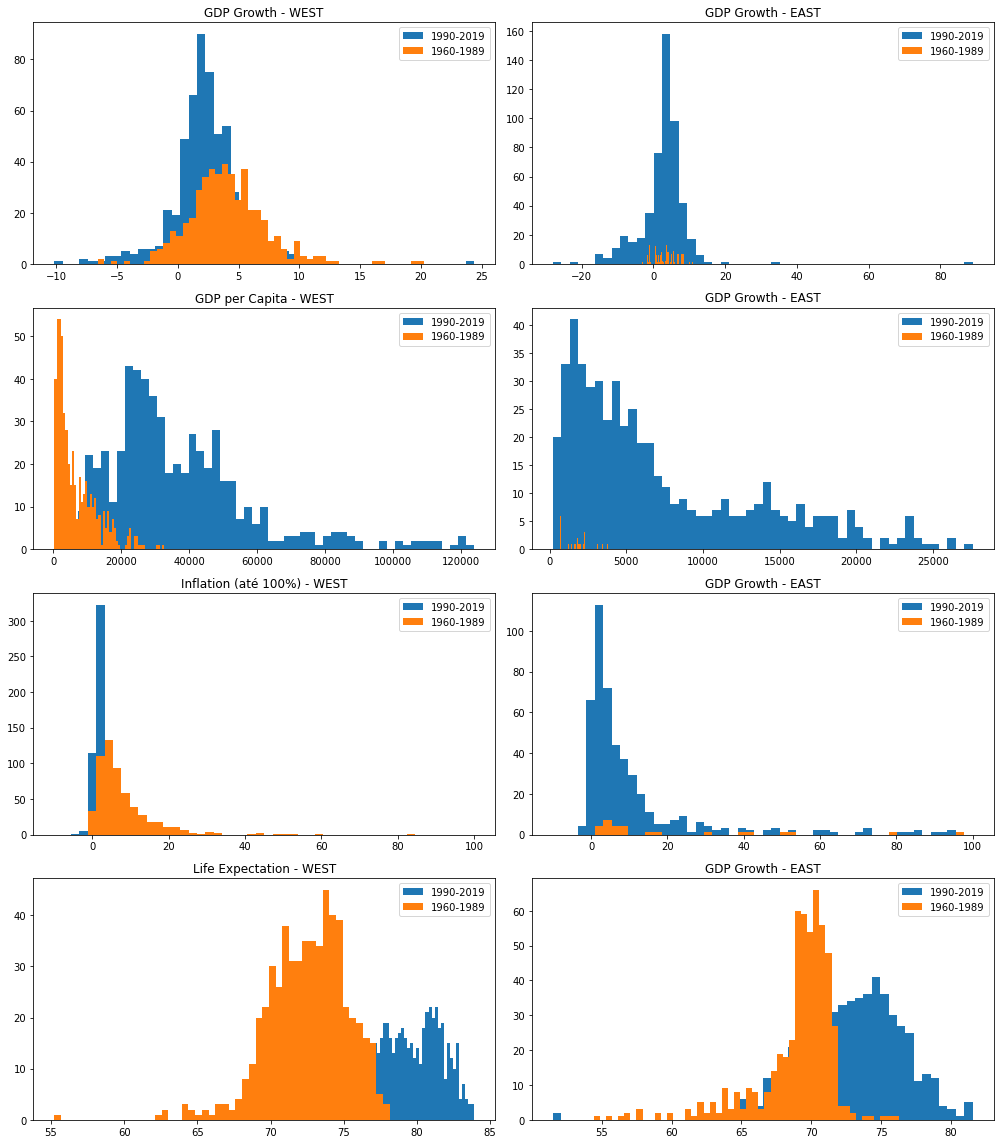

In [240]:
f,((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8)) = plt.subplots(4,2, figsize=(14,16), tight_layout=True)

ax1.set_title('GDP Growth - WEST')
ax1.hist(pax_amer_w[pax_amer_w.indicator=='gdp_growth'].value, bins=50, label='1990-2019')
ax1.hist(cold_war_w[cold_war_w.indicator=='gdp_growth'].value, bins=50, label='1960-1989')
ax1.legend()

ax2.set_title('GDP Growth - EAST')
ax2.hist(pax_amer_e[pax_amer_e.indicator=='gdp_growth'].value, bins=50, label='1990-2019')
ax2.hist(cold_war_e[cold_war_e.indicator=='gdp_growth'].value, bins=50, label='1960-1989')
ax2.legend()

ax3.set_title('GDP per Capita - WEST')
ax3.hist(pax_amer_w[pax_amer_w.indicator=='gdp_per_capita'].value, bins=50, label='1990-2019')
ax3.hist(cold_war_w[cold_war_w.indicator=='gdp_per_capita'].value, bins=50, label='1960-1989')
ax3.legend()

ax4.set_title('GDP Growth - EAST')
ax4.hist(pax_amer_e[pax_amer_e.indicator=='gdp_per_capita'].value, bins=50, label='1990-2019')
ax4.hist(cold_war_e[cold_war_e.indicator=='gdp_per_capita'].value, bins=50, label='1960-1989')
ax4.legend()

ax5.set_title('Inflation (até 100%) - WEST')
ax5.hist(pax_amer_w[pax_amer_w.indicator=='inflation'].value, bins=50, label='1990-2019', range=(-10,100))
ax5.hist(cold_war_w[cold_war_w.indicator=='inflation'].value, bins=50, label='1960-1989', range=(-10,100))
ax5.legend()

ax6.set_title('GDP Growth - EAST')
ax6.hist(pax_amer_e[pax_amer_e.indicator=='inflation'].value, bins=50, label='1990-2019', range=(-10,100))
ax6.hist(cold_war_e[cold_war_e.indicator=='inflation'].value, bins=50, label='1960-1989', range=(-10,100))
ax6.legend()

ax7.set_title('Life Expectation - WEST')
ax7.hist(pax_amer_w[pax_amer_w.indicator=='life_expectancy'].value, bins=50, label='1990-2019')
ax7.hist(cold_war_w[cold_war_w.indicator=='life_expectancy'].value, bins=50, label='1960-1989')
ax7.legend()

ax8.set_title('GDP Growth - EAST')
ax8.hist(pax_amer_e[pax_amer_e.indicator=='life_expectancy'].value, bins=50, label='1990-2019')
ax8.hist(cold_war_e[cold_war_e.indicator=='life_expectancy'].value, bins=50, label='1960-1989')
ax8.legend()

plt.show()

### **4. Exemplo de cálculo de impacto (Parte interativa)**

### 4.1. Apenas 1 país

#### Para GDP Growth

In [42]:
# Escolhendo as variáveis de interesse
event = 'Queda do Muro de Berlim'
country = 'Germany'
year = 1989
lag = 10

# Valor médio de GDP_GROWTH ANTES do evento
pre_gg = round(df_gdp_growth[df_gdp_growth.country==country][df_gdp_growth[df_gdp_growth.country==country].year >= year-lag][df_gdp_growth[df_gdp_growth.country==country][df_gdp_growth[df_gdp_growth.country==country].year >= year-lag].year < year].value.mean(),2)
# Valor médio de GDP GROWTH DEPOIS do evento
post_gg = round(df_gdp_growth[df_gdp_growth.country==country][df_gdp_growth[df_gdp_growth.country==country].year <= year+lag][df_gdp_growth[df_gdp_growth.country==country][df_gdp_growth[df_gdp_growth.country==country].year <= year+lag].year > year].value.mean(),2)

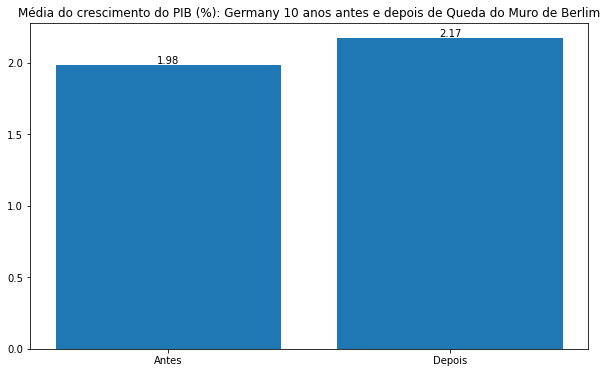

In [43]:
# Gráfico que compara ambos os valores ANTES e DEPOIS
fig, ax = plt.subplots(figsize=(10,6))

plt.title(f'Média do crescimento do PIB (%): {country} {lag} anos antes e depois de {event}')
plt.bar(['Antes','Depois'],[pre_gg,post_gg])
for i, v in enumerate([pre_gg,post_gg]):
    ax.annotate(str(v), xy=(i, v), ha='center', va='bottom')

plt.show()

#### Para GDP per Capita

In [44]:
# Escolhendo as variáveis de interesse
event = 'Queda do Muro de Berlim'
country = 'Germany'
year = 1989
lag = 10

# Valor médio de GDP_GROWTH ANTES do evento
pre_gpc = round(df_gdp_p_cap[df_gdp_p_cap.country==country][df_gdp_p_cap[df_gdp_p_cap.country==country].year >= year-lag][df_gdp_p_cap[df_gdp_p_cap.country==country][df_gdp_p_cap[df_gdp_p_cap.country==country].year >= year-lag].year < year].value.mean(),2)
# Valor médio de GDP GROWTH DEPOIS do evento
post_gpc = round(df_gdp_p_cap[df_gdp_p_cap.country==country][df_gdp_p_cap[df_gdp_p_cap.country==country].year <= year+lag][df_gdp_p_cap[df_gdp_p_cap.country==country][df_gdp_p_cap[df_gdp_p_cap.country==country].year <= year+lag].year > year].value.mean(),2)

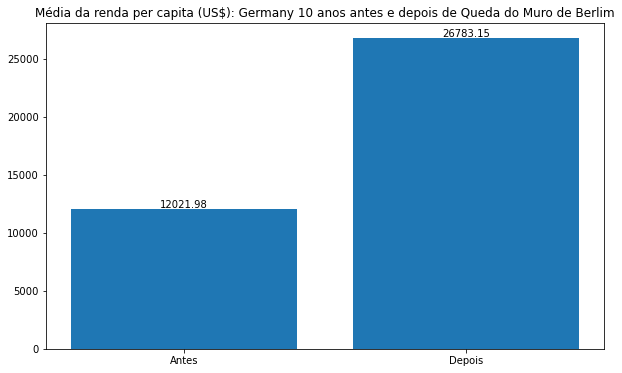

In [45]:
# Gráfico que compara ambos os valores ANTES e DEPOIS
fig, ax = plt.subplots(figsize=(10,6))

plt.title(f'Média da renda per capita (US$): {country} {lag} anos antes e depois de {event}')
plt.bar(['Antes','Depois'],[pre_gpc,post_gpc])
for i, v in enumerate([pre_gpc,post_gpc]):
    ax.annotate(str(v), xy=(i, v), ha='center', va='bottom')

plt.show()

#### Para Inflation

In [46]:
# Escolhendo as variáveis de interesse
event = 'Queda do Muro de Berlim'
country = 'Germany'
year = 1989
lag = 10

# Valor médio de GDP_GROWTH ANTES do evento
pre_i = round(df_inflation[df_inflation.country==country][df_inflation[df_inflation.country==country].year >= year-lag][df_inflation[df_inflation.country==country][df_inflation[df_inflation.country==country].year >= year-lag].year < year].value.mean(),2)
# Valor médio de GDP GROWTH DEPOIS do evento
post_i = round(df_inflation[df_inflation.country==country][df_inflation[df_inflation.country==country].year <= year+lag][df_inflation[df_inflation.country==country][df_inflation[df_inflation.country==country].year <= year+lag].year > year].value.mean(),2)

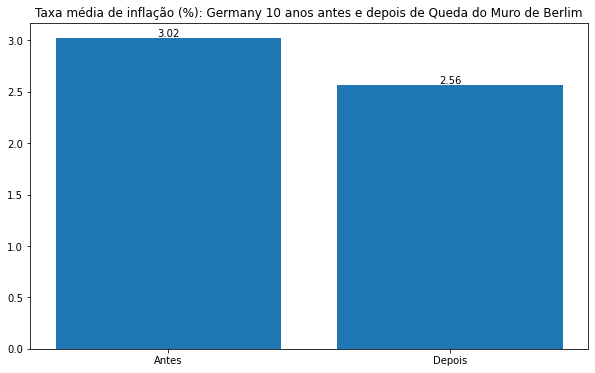

In [47]:
# Gráfico que compara ambos os valores ANTES e DEPOIS
fig, ax = plt.subplots(figsize=(10,6))

plt.title(f'Taxa média de inflação (%): {country} {lag} anos antes e depois de {event}')
plt.bar(['Antes','Depois'],[pre_i,post_i])
for i, v in enumerate([pre_i,post_i]):
    ax.annotate(str(v), xy=(i, v), ha='center', va='bottom')

plt.show()

#### Para Life Expectation

In [48]:
# Escolhendo as variáveis de interesse
event = 'Queda do Muro de Berlim'
country = 'Germany'
year = 1989
lag = 10

# Valor médio de GDP_GROWTH ANTES do evento
pre_le = round(df_life_exp[df_life_exp.country==country][df_life_exp[df_life_exp.country==country].year >= year-lag][df_life_exp[df_life_exp.country==country][df_life_exp[df_life_exp.country==country].year >= year-lag].year < year].value.mean(),2)
# Valor médio de GDP GROWTH DEPOIS do evento
post_le = round(df_life_exp[df_life_exp.country==country][df_life_exp[df_life_exp.country==country].year <= year+lag][df_life_exp[df_life_exp.country==country][df_life_exp[df_life_exp.country==country].year <= year+lag].year > year].value.mean(),2)

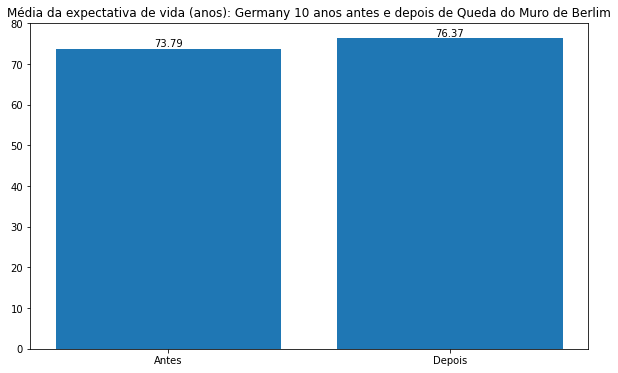

In [49]:
# Gráfico que compara ambos os valores ANTES e DEPOIS
fig, ax = plt.subplots(figsize=(10,6))

plt.title(f'Média da expectativa de vida (anos): {country} {lag} anos antes e depois de {event}')
plt.bar(['Antes','Depois'],[pre_le,post_le])
for i, v in enumerate([pre_le,post_le]):
    ax.annotate(str(v), xy=(i, v), ha='center', va='bottom')

plt.show()

### 4.2. Vários países

#### Para GDP Growth

In [50]:
# Repetindo, mas agora para mais países, tomando um deles como referência
event = 'Queda do Muro de Berlim'
country_ref = 'Germany'
year = 1989
country_2 = 'France'
country_3 = 'Italy'
lag = 10

# Valor médio de GDP_GROWTH ANTES do evento
pre_ref = round(df_gdp_growth[df_gdp_growth.country==country_ref][df_gdp_growth[df_gdp_growth.country==country_ref].year >= year-lag][df_gdp_growth[df_gdp_growth.country==country_ref][df_gdp_growth[df_gdp_growth.country==country_ref].year >= year-lag].year < year].value.mean(),2)
pre_2 = round(df_gdp_growth[df_gdp_growth.country==country_2][df_gdp_growth[df_gdp_growth.country==country_2].year >= year-lag][df_gdp_growth[df_gdp_growth.country==country_2][df_gdp_growth[df_gdp_growth.country==country_2].year >= year-lag].year < year].value.mean(),2)
pre_3 = round(df_gdp_growth[df_gdp_growth.country==country_3][df_gdp_growth[df_gdp_growth.country==country_3].year >= year-lag][df_gdp_growth[df_gdp_growth.country==country_3][df_gdp_growth[df_gdp_growth.country==country_3].year >= year-lag].year < year].value.mean(),2)
# Valor médio de GDP GROWTH DEPOIS do evento
post_ref = round(df_gdp_growth[df_gdp_growth.country==country_ref][df_gdp_growth[df_gdp_growth.country==country_ref].year <= year+lag][df_gdp_growth[df_gdp_growth.country==country_ref][df_gdp_growth[df_gdp_growth.country==country_ref].year <= year+lag].year > year].value.mean(),2)
post_2 = round(df_gdp_growth[df_gdp_growth.country==country_2][df_gdp_growth[df_gdp_growth.country==country_2].year <= year+lag][df_gdp_growth[df_gdp_growth.country==country_2][df_gdp_growth[df_gdp_growth.country==country_2].year <= year+lag].year > year].value.mean(),2)
post_3 = round(df_gdp_growth[df_gdp_growth.country==country_3][df_gdp_growth[df_gdp_growth.country==country_3].year <= year+lag][df_gdp_growth[df_gdp_growth.country==country_3][df_gdp_growth[df_gdp_growth.country==country_3].year <= year+lag].year > year].value.mean(),2)

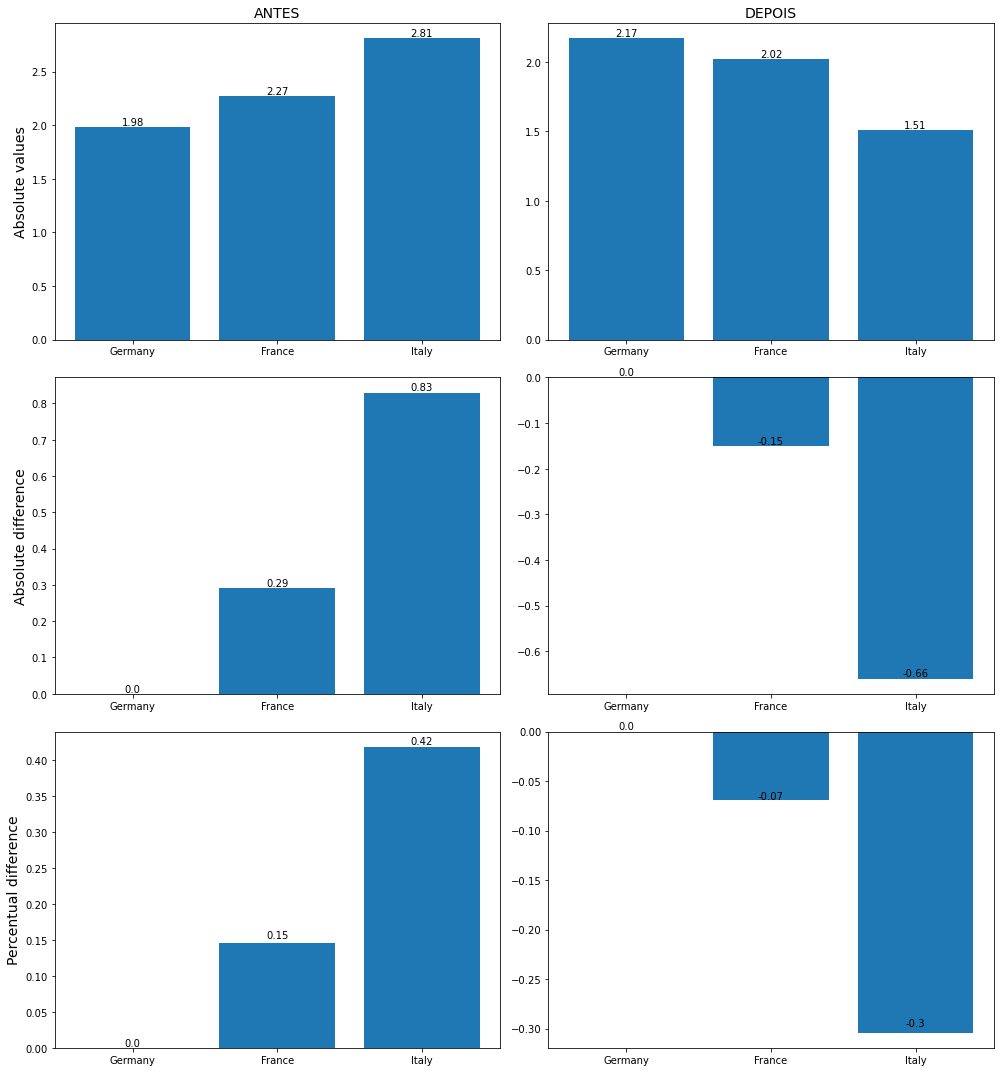

In [51]:
# Gráfico da comparação dos países em relação ao país-referência
f,((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2, figsize=(14,15), tight_layout=True)

x1 = [country_ref, country_2, country_3]
## Absolute values
y1 = [[pre_ref,pre_2,pre_3], [post_ref,post_2,post_3]]
## Absolute difference
y2 = [[pre_ref-pre_ref, pre_2-pre_ref, pre_3-pre_ref], [post_ref-post_ref, post_2-post_ref, post_3-post_ref]]
## Percentual difference
y3 = [[pre_ref/pre_ref-1, pre_2/pre_ref-1, pre_3/pre_ref-1], [post_ref/post_ref-1, post_2/post_ref-1, post_3/post_ref-1]]

# Gráficos
ax1.set_title('ANTES', fontsize = 14)
ax1.set_ylabel("Absolute values", fontsize = 14)
ax1.bar(x1,y1[0])
ax2.set_title('DEPOIS', fontsize = 14)
ax2.bar(x1,y1[1])
ax3.set_ylabel("Absolute difference", fontsize = 14)
ax3.bar(x1,y2[0])
ax4.bar(x1,y2[1])
ax5.set_ylabel("Percentual difference", fontsize = 14)
ax5.bar(x1,y3[0])
ax6.bar(x1,y3[1])

## Adding value to the bars
for i, v in enumerate([pre_ref,pre_2,pre_3]):
    ax1.annotate(str(v), xy=(i, v), ha='center', va='bottom')
for i, v in enumerate([post_ref,post_2,post_3]):
    ax2.annotate(str(v), xy=(i, v), ha='center', va='bottom')
for i, v in enumerate([round(pre_ref-pre_ref,2),round(pre_2-pre_ref,2),round(pre_3-pre_ref,2)]):
    ax3.annotate(str(v), xy=(i, v), ha='center', va='bottom')
for i, v in enumerate([round(post_ref-post_ref,2),round(post_2-post_ref,2),round(post_3-post_ref,2)]):
    ax4.annotate(str(v), xy=(i, v), ha='center', va='bottom')
for i, v in enumerate([round(pre_ref/pre_ref-1,2),round(pre_2/pre_ref-1,2),round(pre_3/pre_ref-1,2)]):
    ax5.annotate(str(v), xy=(i, v), ha='center', va='bottom')
for i, v in enumerate([round(post_ref/post_ref-1,2),round(post_2/post_ref-1,2),round(post_3/post_ref-1,2)]):
    ax6.annotate(str(v), xy=(i, v), ha='center', va='bottom')

plt.show()

#### Para GDP per Capita

In [52]:
# Repetindo, mas agora para mais países, tomando um deles como referência
event = 'Queda do Muro de Berlim'
country_ref = 'Germany'
year = 1989
country_2 = 'France'
country_3 = 'Italy'
lag = 10

# Valor médio de GDP_GROWTH ANTES do evento
pre_ref = round(df_gdp_p_cap[df_gdp_p_cap.country==country_ref][df_gdp_p_cap[df_gdp_p_cap.country==country_ref].year >= year-lag][df_gdp_p_cap[df_gdp_p_cap.country==country_ref][df_gdp_p_cap[df_gdp_p_cap.country==country_ref].year >= year-lag].year < year].value.mean(),2)
pre_2 = round(df_gdp_p_cap[df_gdp_p_cap.country==country_2][df_gdp_p_cap[df_gdp_p_cap.country==country_2].year >= year-lag][df_gdp_p_cap[df_gdp_p_cap.country==country_2][df_gdp_p_cap[df_gdp_p_cap.country==country_2].year >= year-lag].year < year].value.mean(),2)
pre_3 = round(df_gdp_p_cap[df_gdp_p_cap.country==country_3][df_gdp_p_cap[df_gdp_p_cap.country==country_3].year >= year-lag][df_gdp_p_cap[df_gdp_p_cap.country==country_3][df_gdp_p_cap[df_gdp_p_cap.country==country_3].year >= year-lag].year < year].value.mean(),2)
# Valor médio de GDP GROWTH DEPOIS do evento
post_ref = round(df_gdp_p_cap[df_gdp_p_cap.country==country_ref][df_gdp_p_cap[df_gdp_p_cap.country==country_ref].year <= year+lag][df_gdp_p_cap[df_gdp_p_cap.country==country_ref][df_gdp_p_cap[df_gdp_p_cap.country==country_ref].year <= year+lag].year > year].value.mean(),2)
post_2 = round(df_gdp_p_cap[df_gdp_p_cap.country==country_2][df_gdp_p_cap[df_gdp_p_cap.country==country_2].year <= year+lag][df_gdp_p_cap[df_gdp_p_cap.country==country_2][df_gdp_p_cap[df_gdp_p_cap.country==country_2].year <= year+lag].year > year].value.mean(),2)
post_3 = round(df_gdp_p_cap[df_gdp_p_cap.country==country_3][df_gdp_p_cap[df_gdp_p_cap.country==country_3].year <= year+lag][df_gdp_p_cap[df_gdp_p_cap.country==country_3][df_gdp_p_cap[df_gdp_p_cap.country==country_3].year <= year+lag].year > year].value.mean(),2)

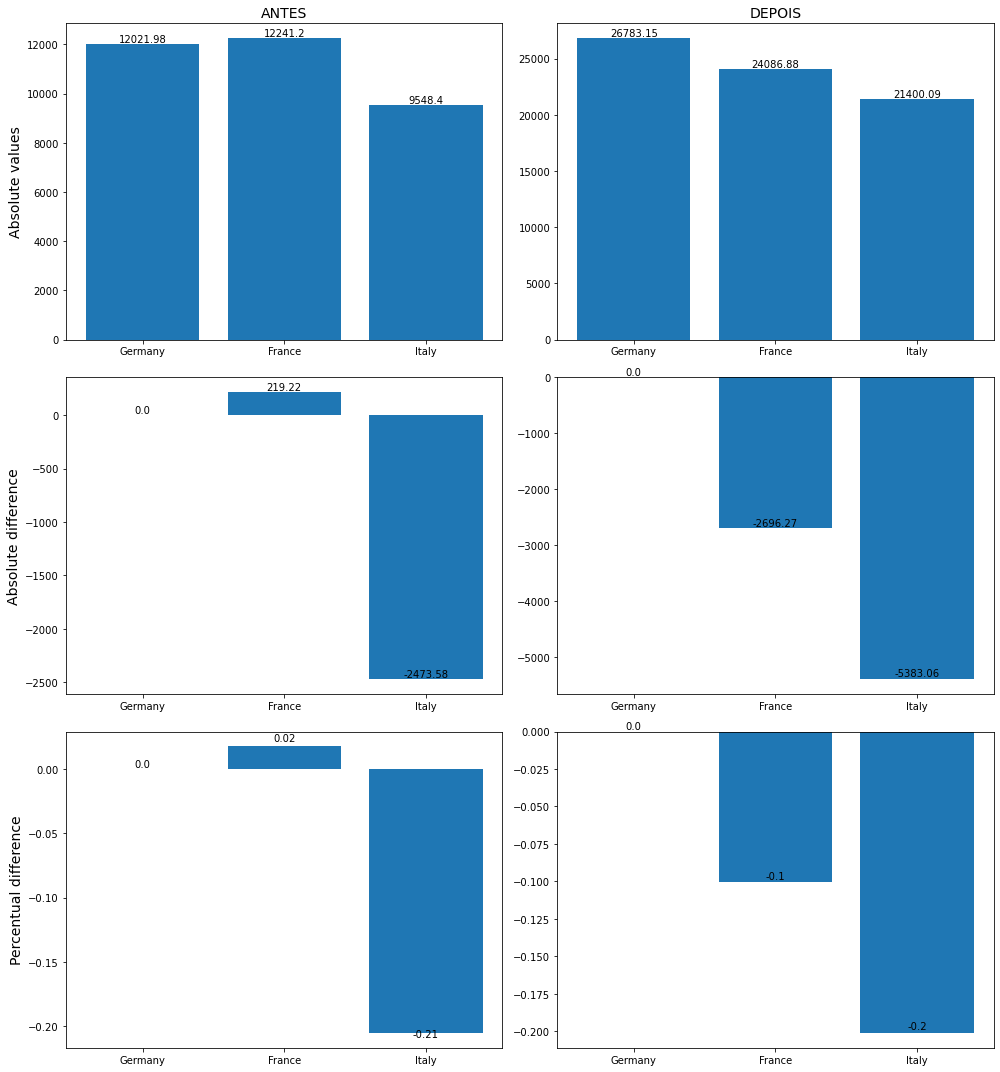

In [53]:
# Gráfico da comparação dos países em relação ao país-referência
f,((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2, figsize=(14,15), tight_layout=True)

x1 = [country_ref, country_2, country_3]
## Absolute values
y1 = [[pre_ref,pre_2,pre_3], [post_ref,post_2,post_3]]
## Absolute difference
y2 = [[pre_ref-pre_ref, pre_2-pre_ref, pre_3-pre_ref], [post_ref-post_ref, post_2-post_ref, post_3-post_ref]]
## Percentual difference
y3 = [[pre_ref/pre_ref-1, pre_2/pre_ref-1, pre_3/pre_ref-1], [post_ref/post_ref-1, post_2/post_ref-1, post_3/post_ref-1]]

# Gráficos
ax1.set_title('ANTES', fontsize = 14)
ax1.set_ylabel("Absolute values", fontsize = 14)
ax1.bar(x1,y1[0])
ax2.set_title('DEPOIS', fontsize = 14)
ax2.bar(x1,y1[1])
ax3.set_ylabel("Absolute difference", fontsize = 14)
ax3.bar(x1,y2[0])
ax4.bar(x1,y2[1])
ax5.set_ylabel("Percentual difference", fontsize = 14)
ax5.bar(x1,y3[0])
ax6.bar(x1,y3[1])

## Adding value to the bars
for i, v in enumerate([pre_ref,pre_2,pre_3]):
    ax1.annotate(str(v), xy=(i, v), ha='center', va='bottom')
for i, v in enumerate([post_ref,post_2,post_3]):
    ax2.annotate(str(v), xy=(i, v), ha='center', va='bottom')
for i, v in enumerate([round(pre_ref-pre_ref,2),round(pre_2-pre_ref,2),round(pre_3-pre_ref,2)]):
    ax3.annotate(str(v), xy=(i, v), ha='center', va='bottom')
for i, v in enumerate([round(post_ref-post_ref,2),round(post_2-post_ref,2),round(post_3-post_ref,2)]):
    ax4.annotate(str(v), xy=(i, v), ha='center', va='bottom')
for i, v in enumerate([round(pre_ref/pre_ref-1,2),round(pre_2/pre_ref-1,2),round(pre_3/pre_ref-1,2)]):
    ax5.annotate(str(v), xy=(i, v), ha='center', va='bottom')
for i, v in enumerate([round(post_ref/post_ref-1,2),round(post_2/post_ref-1,2),round(post_3/post_ref-1,2)]):
    ax6.annotate(str(v), xy=(i, v), ha='center', va='bottom')

plt.show()

#### Para Inflation

In [54]:
# Repetindo, mas agora para mais países, tomando um deles como referência
event = 'Queda do Muro de Berlim'
country_ref = 'Germany'
year = 1989
country_2 = 'France'
country_3 = 'Italy'
lag = 10

# Valor médio de GDP_GROWTH ANTES do evento
pre_ref = round(df_inflation[df_inflation.country==country_ref][df_inflation[df_inflation.country==country_ref].year >= year-lag][df_inflation[df_inflation.country==country_ref][df_inflation[df_inflation.country==country_ref].year >= year-lag].year < year].value.mean(),2)
pre_2 = round(df_inflation[df_inflation.country==country_2][df_inflation[df_inflation.country==country_2].year >= year-lag][df_inflation[df_inflation.country==country_2][df_inflation[df_inflation.country==country_2].year >= year-lag].year < year].value.mean(),2)
pre_3 = round(df_inflation[df_inflation.country==country_3][df_inflation[df_inflation.country==country_3].year >= year-lag][df_inflation[df_inflation.country==country_3][df_inflation[df_inflation.country==country_3].year >= year-lag].year < year].value.mean(),2)
# Valor médio de GDP GROWTH DEPOIS do evento
post_ref = round(df_inflation[df_inflation.country==country_ref][df_inflation[df_inflation.country==country_ref].year <= year+lag][df_inflation[df_inflation.country==country_ref][df_inflation[df_inflation.country==country_ref].year <= year+lag].year > year].value.mean(),2)
post_2 = round(df_inflation[df_inflation.country==country_2][df_inflation[df_inflation.country==country_2].year <= year+lag][df_inflation[df_inflation.country==country_2][df_inflation[df_inflation.country==country_2].year <= year+lag].year > year].value.mean(),2)
post_3 = round(df_inflation[df_inflation.country==country_3][df_inflation[df_inflation.country==country_3].year <= year+lag][df_inflation[df_inflation.country==country_3][df_inflation[df_inflation.country==country_3].year <= year+lag].year > year].value.mean(),2)

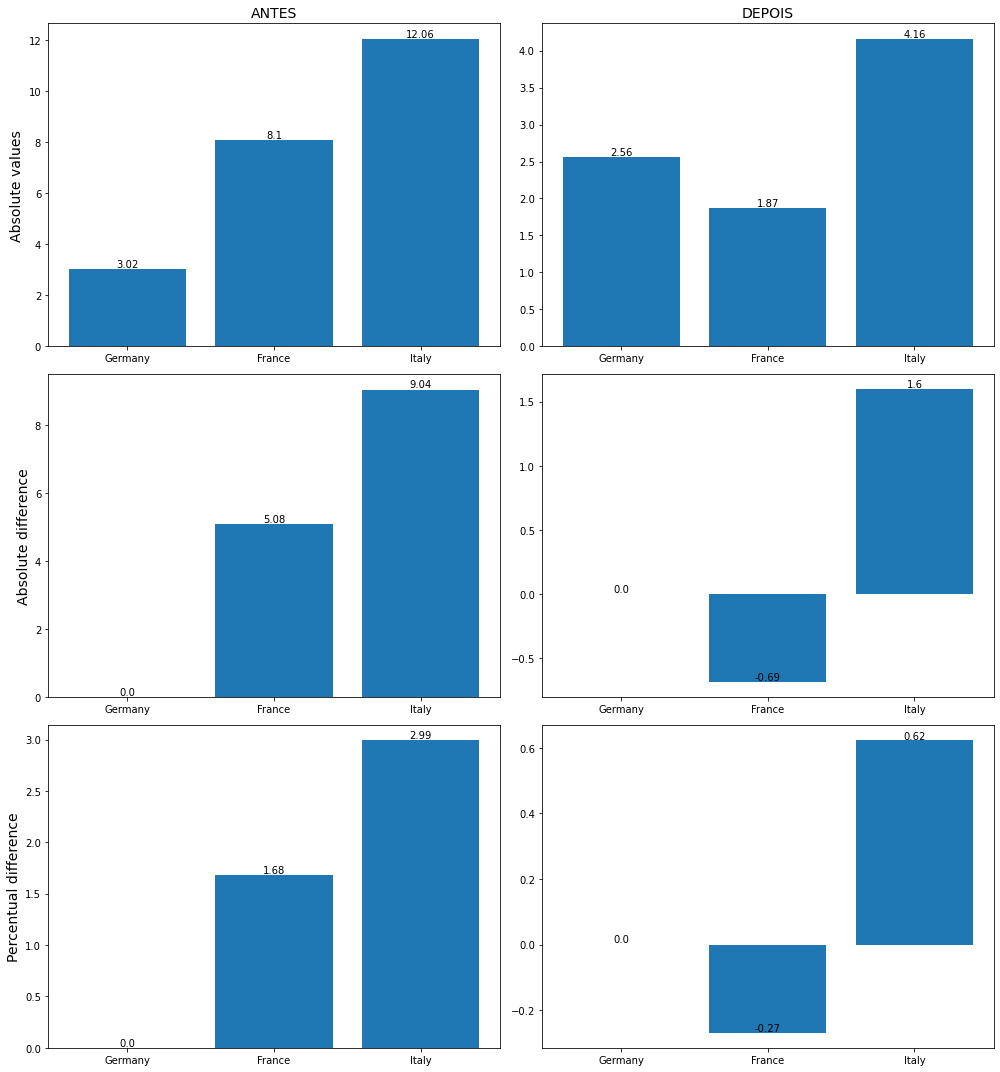

In [55]:
# Gráfico da comparação dos países em relação ao país-referência
f,((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2, figsize=(14,15), tight_layout=True)

x1 = [country_ref, country_2, country_3]
## Absolute values
y1 = [[pre_ref,pre_2,pre_3], [post_ref,post_2,post_3]]
## Absolute difference
y2 = [[pre_ref-pre_ref, pre_2-pre_ref, pre_3-pre_ref], [post_ref-post_ref, post_2-post_ref, post_3-post_ref]]
## Percentual difference
y3 = [[pre_ref/pre_ref-1, pre_2/pre_ref-1, pre_3/pre_ref-1], [post_ref/post_ref-1, post_2/post_ref-1, post_3/post_ref-1]]

# Gráficos
ax1.set_title('ANTES', fontsize = 14)
ax1.set_ylabel("Absolute values", fontsize = 14)
ax1.bar(x1,y1[0])
ax2.set_title('DEPOIS', fontsize = 14)
ax2.bar(x1,y1[1])
ax3.set_ylabel("Absolute difference", fontsize = 14)
ax3.bar(x1,y2[0])
ax4.bar(x1,y2[1])
ax5.set_ylabel("Percentual difference", fontsize = 14)
ax5.bar(x1,y3[0])
ax6.bar(x1,y3[1])

## Adding value to the bars
for i, v in enumerate([pre_ref,pre_2,pre_3]):
    ax1.annotate(str(v), xy=(i, v), ha='center', va='bottom')
for i, v in enumerate([post_ref,post_2,post_3]):
    ax2.annotate(str(v), xy=(i, v), ha='center', va='bottom')
for i, v in enumerate([round(pre_ref-pre_ref,2),round(pre_2-pre_ref,2),round(pre_3-pre_ref,2)]):
    ax3.annotate(str(v), xy=(i, v), ha='center', va='bottom')
for i, v in enumerate([round(post_ref-post_ref,2),round(post_2-post_ref,2),round(post_3-post_ref,2)]):
    ax4.annotate(str(v), xy=(i, v), ha='center', va='bottom')
for i, v in enumerate([round(pre_ref/pre_ref-1,2),round(pre_2/pre_ref-1,2),round(pre_3/pre_ref-1,2)]):
    ax5.annotate(str(v), xy=(i, v), ha='center', va='bottom')
for i, v in enumerate([round(post_ref/post_ref-1,2),round(post_2/post_ref-1,2),round(post_3/post_ref-1,2)]):
    ax6.annotate(str(v), xy=(i, v), ha='center', va='bottom')

plt.show()

#### Para Life Expectation

In [56]:
# Repetindo, mas agora para mais países, tomando um deles como referência
event = 'Queda do Muro de Berlim'
country_ref = 'Germany'
year = 1989
country_2 = 'France'
country_3 = 'Italy'
lag = 10

# Valor médio de GDP_GROWTH ANTES do evento
pre_ref = round(df_life_exp[df_life_exp.country==country_ref][df_life_exp[df_life_exp.country==country_ref].year >= year-lag][df_life_exp[df_life_exp.country==country_ref][df_life_exp[df_life_exp.country==country_ref].year >= year-lag].year < year].value.mean(),2)
pre_2 = round(df_life_exp[df_life_exp.country==country_2][df_life_exp[df_life_exp.country==country_2].year >= year-lag][df_life_exp[df_life_exp.country==country_2][df_life_exp[df_life_exp.country==country_2].year >= year-lag].year < year].value.mean(),2)
pre_3 = round(df_life_exp[df_life_exp.country==country_3][df_life_exp[df_life_exp.country==country_3].year >= year-lag][df_life_exp[df_life_exp.country==country_3][df_life_exp[df_life_exp.country==country_3].year >= year-lag].year < year].value.mean(),2)
# Valor médio de GDP GROWTH DEPOIS do evento
post_ref = round(df_life_exp[df_life_exp.country==country_ref][df_life_exp[df_life_exp.country==country_ref].year <= year+lag][df_life_exp[df_life_exp.country==country_ref][df_life_exp[df_life_exp.country==country_ref].year <= year+lag].year > year].value.mean(),2)
post_2 = round(df_life_exp[df_life_exp.country==country_2][df_life_exp[df_life_exp.country==country_2].year <= year+lag][df_life_exp[df_life_exp.country==country_2][df_life_exp[df_life_exp.country==country_2].year <= year+lag].year > year].value.mean(),2)
post_3 = round(df_life_exp[df_life_exp.country==country_3][df_life_exp[df_life_exp.country==country_3].year <= year+lag][df_life_exp[df_life_exp.country==country_3][df_life_exp[df_life_exp.country==country_3].year <= year+lag].year > year].value.mean(),2)

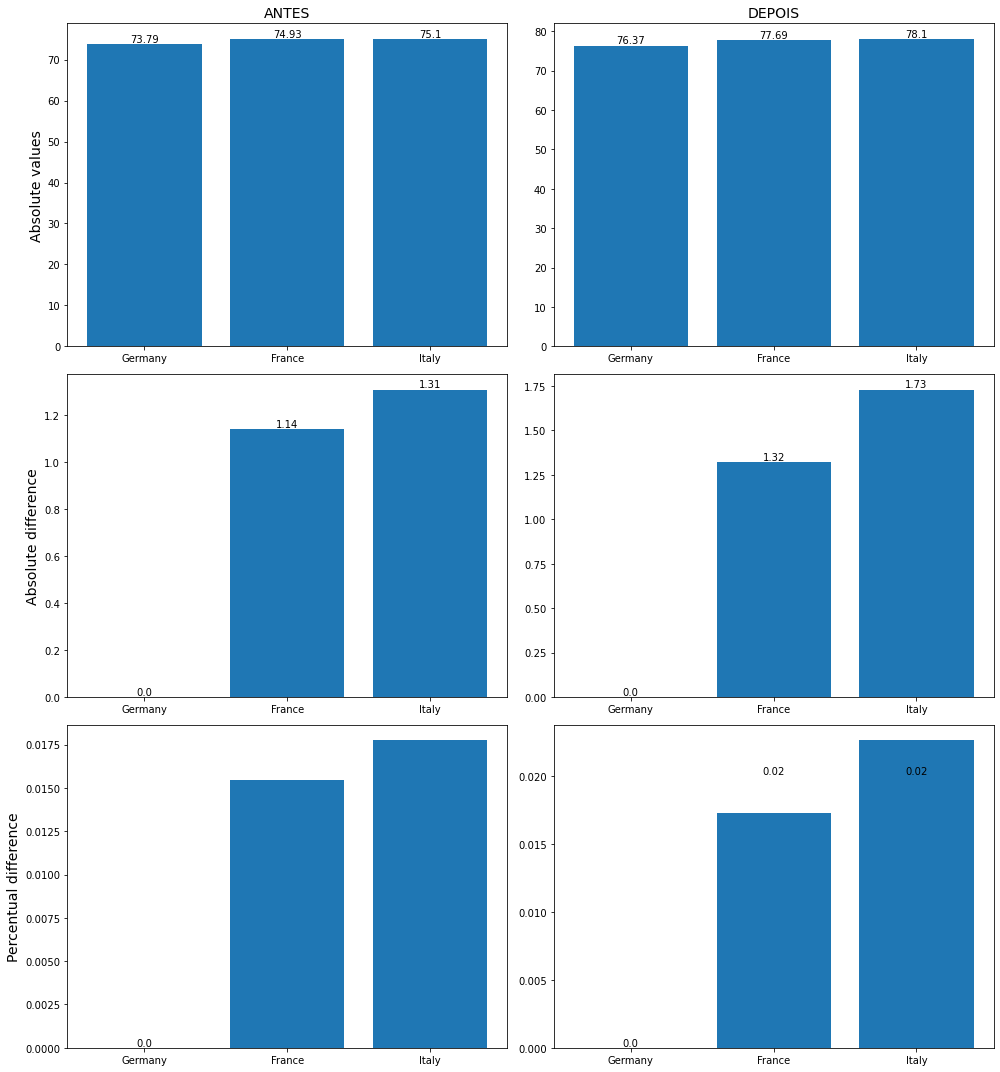

In [57]:
# Gráfico da comparação dos países em relação ao país-referência
f,((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2, figsize=(14,15), tight_layout=True)

x1 = [country_ref, country_2, country_3]
## Absolute values
y1 = [[pre_ref,pre_2,pre_3], [post_ref,post_2,post_3]]
## Absolute difference
y2 = [[pre_ref-pre_ref, pre_2-pre_ref, pre_3-pre_ref], [post_ref-post_ref, post_2-post_ref, post_3-post_ref]]
## Percentual difference
y3 = [[pre_ref/pre_ref-1, pre_2/pre_ref-1, pre_3/pre_ref-1], [post_ref/post_ref-1, post_2/post_ref-1, post_3/post_ref-1]]

# Gráficos
ax1.set_title('ANTES', fontsize = 14)
ax1.set_ylabel("Absolute values", fontsize = 14)
ax1.bar(x1,y1[0])
ax2.set_title('DEPOIS', fontsize = 14)
ax2.bar(x1,y1[1])
ax3.set_ylabel("Absolute difference", fontsize = 14)
ax3.bar(x1,y2[0])
ax4.bar(x1,y2[1])
ax5.set_ylabel("Percentual difference", fontsize = 14)
ax5.bar(x1,y3[0])
ax6.bar(x1,y3[1])

## Adding value to the bars
for i, v in enumerate([pre_ref,pre_2,pre_3]):
    ax1.annotate(str(v), xy=(i, v), ha='center', va='bottom')
for i, v in enumerate([post_ref,post_2,post_3]):
    ax2.annotate(str(v), xy=(i, v), ha='center', va='bottom')
for i, v in enumerate([round(pre_ref-pre_ref,2),round(pre_2-pre_ref,2),round(pre_3-pre_ref,2)]):
    ax3.annotate(str(v), xy=(i, v), ha='center', va='bottom')
for i, v in enumerate([round(post_ref-post_ref,2),round(post_2-post_ref,2),round(post_3-post_ref,2)]):
    ax4.annotate(str(v), xy=(i, v), ha='center', va='bottom')
for i, v in enumerate([round(pre_ref/pre_ref-1,2),round(pre_2/pre_ref-1,2),round(pre_3/pre_ref-1,2)]):
    ax5.annotate(str(v), xy=(i, v), ha='center', va='bottom')
for i, v in enumerate([round(post_ref/post_ref-1,2),round(post_2/post_ref-1,2),round(post_3/post_ref-1,2)]):
    ax6.annotate(str(v), xy=(i, v), ha='center', va='bottom')

plt.show()